In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 資料描述

In [2]:
data=pd.read_csv("NPHA-doctor-visits.csv")
data['Number of Doctors Visited'].value_counts()

Number of Doctors Visited
2    372
3    211
1    131
Name: count, dtype: int64

In [3]:
print("資料筆數:",len(data))
print("欄位數量",len(data.columns))

資料筆數: 714
欄位數量 15


In [4]:
data.head()

Number of Doctors Visited  Age  Phyiscal Health  Mental Health  \
0                          3    2                4              3   
1                          2    2                4              2   
2                          3    2                3              2   
3                          1    2                3              2   
4                          3    2                3              3   

   Dental Health  Employment  Stress Keeps Patient from Sleeping  \
0              3           3                                   0   
1              3           3                                   1   
2              3           3                                   0   
3              3           3                                   0   
4              3           3                                   1   

   Medication Keeps Patient from Sleeping  Pain Keeps Patient from Sleeping  \
0                                       0                                 0   
1                                       0                                 0   
2                                       0                                 0   
3                                       0                                 0   
4                                       0                                 0   

   Bathroom Needs Keeps Patient from Sleeping  \
0                                           0   
1                                           1   
2                                           0   
3                                           1   
4                                           0   

   Uknown Keeps Patient from Sleeping  Trouble Sleeping  \
0                                   1                 2   
1                                   0                 3   
2                                   1                 3   
3                                   0                 3   
4                                   0                 2   

   Prescription Sleep Medication  Race  Gender  
0                              3     1       2  
1                              3     1       1  
2                              3     4       1  
3                              3     4       2  
4                              3     1       2

In [5]:
# 查看資料欄位類型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Age                                         714 non-null    int64
 2   Phyiscal Health                             714 non-null    int64
 3   Mental Health                               714 non-null    int64
 4   Dental Health                               714 non-null    int64
 5   Employment                                  714 non-null    int64
 6   Stress Keeps Patient from Sleeping          714 non-null    int64
 7   Medication Keeps Patient from Sleeping      714 non-null    int64
 8   Pain Keeps Patient from Sleeping            714 non-null    int64
 9   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 10  Uknown Keeps Patient from Sleeping    

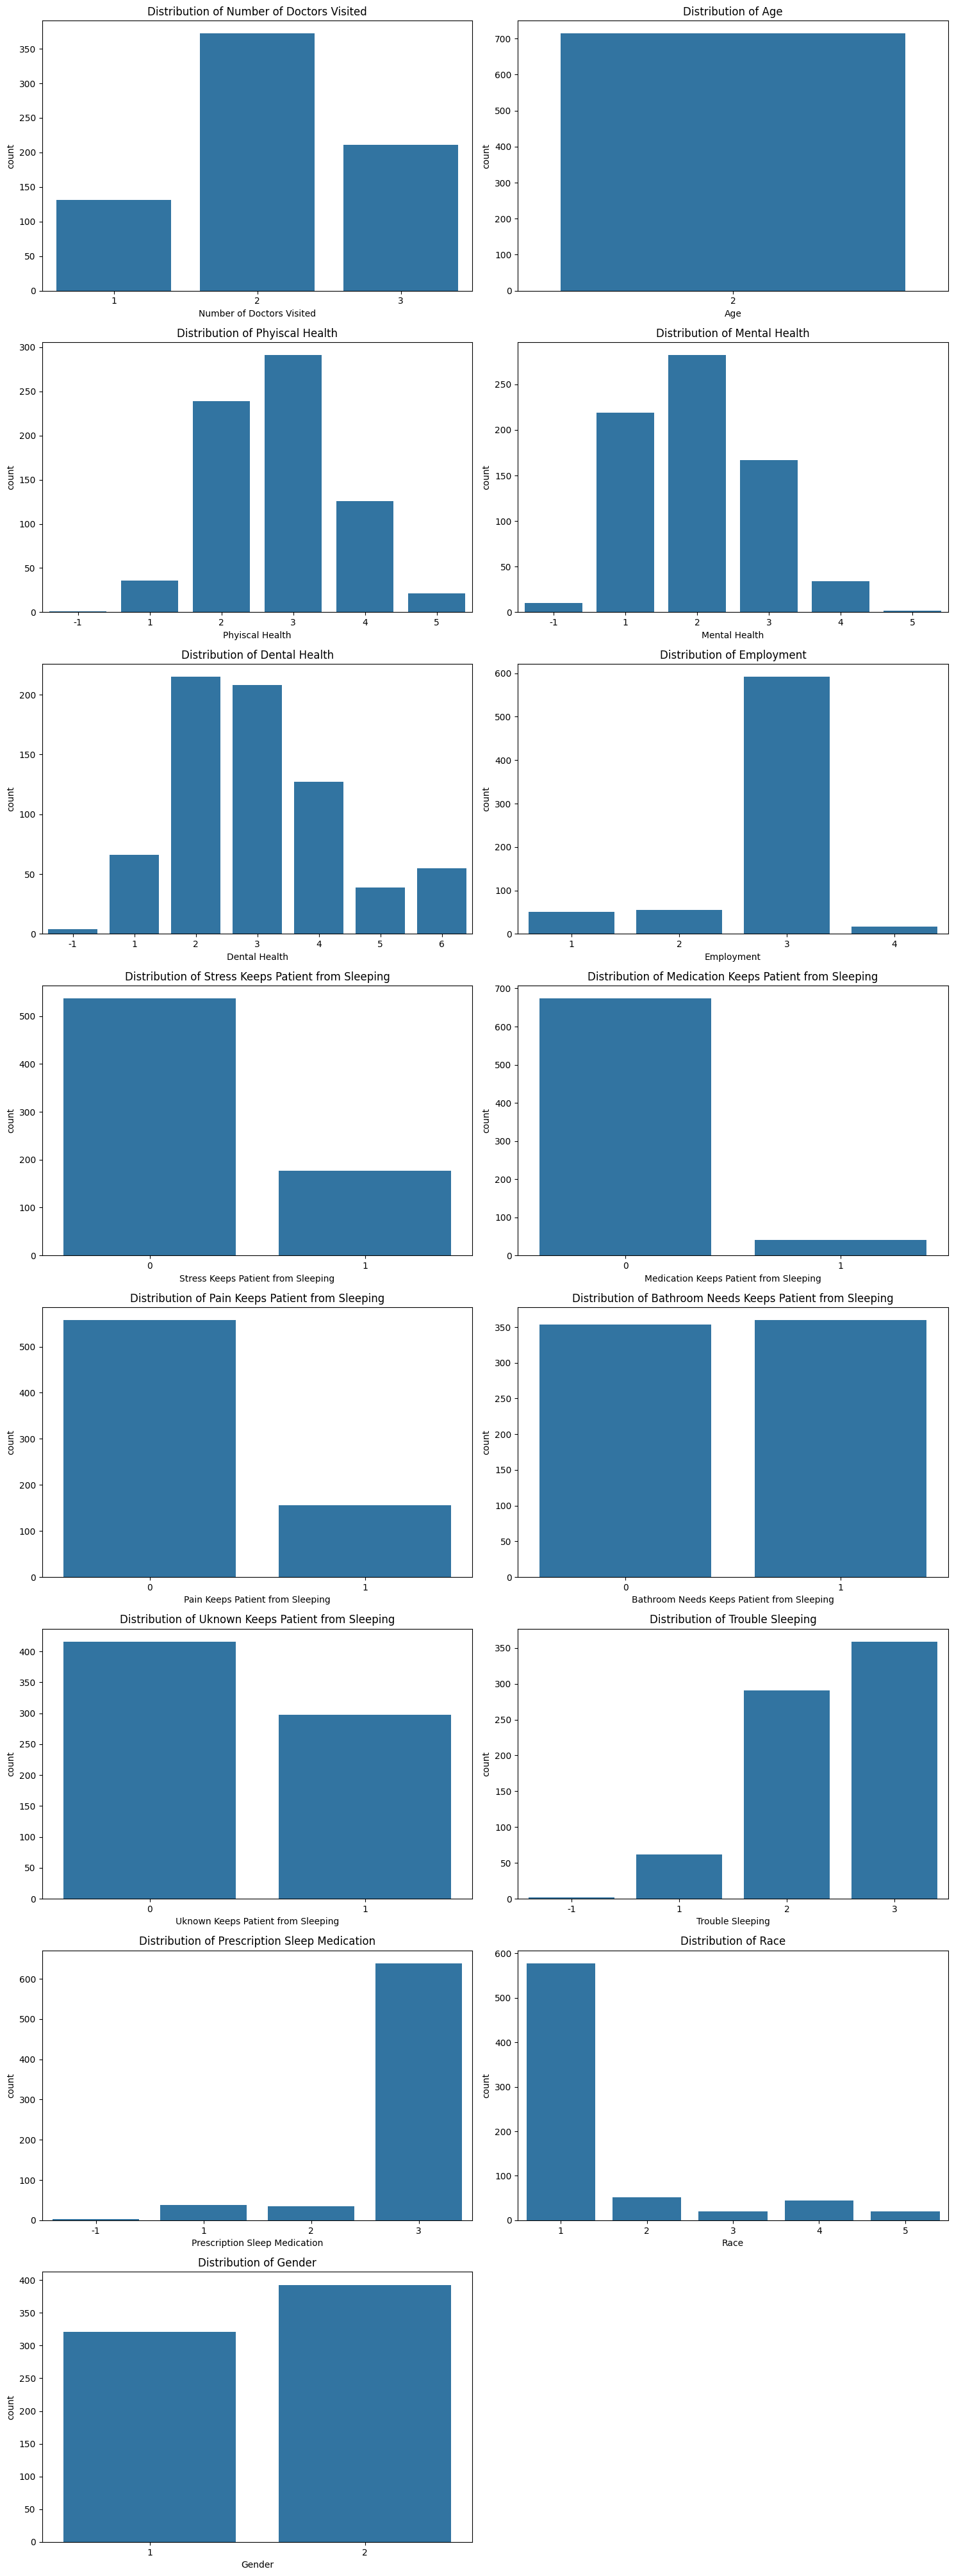

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 取得所有類別型欄位的名稱
data_col=data.columns.tolist()

# 設定子圖的行和列數，以便排列多個圖
rows = len(data_col)  # 行數等於類別型欄位數
cols = 2  # 每行顯示2個圖，根據需要調整

# 設定圖的大小
plt.figure(figsize=(15, 5 * rows))

# 使用迴圈繪製每個類別型欄位的分布情形
for i, column in enumerate(data_col):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(data=data, x=column)
    plt.title(f'Distribution of {column}')

# 調整子圖間的間距
plt.tight_layout()

# 顯示圖表
plt.show()

# 資料預處理

In [7]:
# 由上一個步驟(資料分布)可發現Age(年齡)欄位沒有意義(數值全部一樣)
# 因此移除此欄位分析
data = data.drop(columns=['Age'])

In [8]:
# 由於後續決策樹效果不佳

# 因此此部分先測試移除一些類別上有可以拒絕回答的問題
# del_col = ['Phyiscal Health','Mental Health','Dental Health','Employment','Prescription Sleep Medication','Race','Gender']
# data = data.drop(columns = del_col)

# 此部分刪除遺漏資料
## 拒絕回答
data = data[data['Phyiscal Health']!=-1]
data = data[data['Mental Health']!=-1]
data = data[data['Dental Health']!=-1]
data = data[data['Employment']!=-1]
data = data[data['Trouble Sleeping']!=-1]
data = data[data['Prescription Sleep Medication']!=-1]
data = data[data['Race']!=-1]
data = data[data['Gender']!=-1]
## 沒有問
data = data[data['Race']!=-2]
data = data[data['Gender']!=-2]

# 準備開始進行 K-means

In [9]:
# 定義自變數(X)
X = data.drop(columns=["Number of Doctors Visited"])
X.shape

(696, 13)

In [10]:
#提供多種scale的方式

#StandardScaler是最常見的標準化函數
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [11]:
full_scaled_data=SS.fit_transform(X)
scaled_data=SS.fit_transform(full_scaled_data)

In [12]:
from sklearn.cluster import KMeans

C:\Users\user\miniconda3\envs\week_08\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\miniconda3\envs\week_08\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\miniconda3\envs\week_08\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\miniconda3\envs\week_08\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

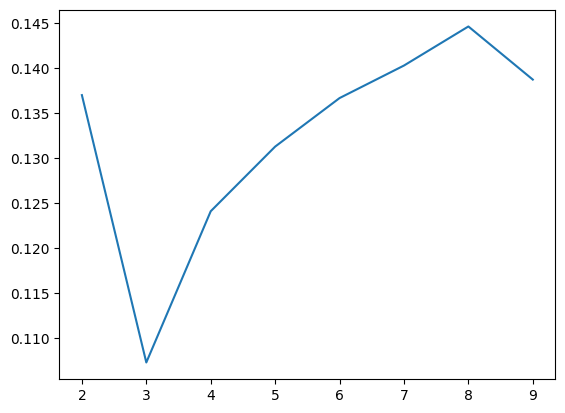

In [13]:
#透過輪廓係數(-1,1) 該值越大表示分群效果越好

from sklearn.metrics import silhouette_score

silhouette_avg = []

#由第2群找到第10群，觀察轉折點 (轉折點就是變化量最大的地方，不是看該值的大小)
for i in range(2,10):
    tmp = []
    for j in range(1,11):
        kmeans_fit = KMeans(n_clusters = i).fit(scaled_data)
        tmp.append(silhouette_score(scaled_data, kmeans_fit.labels_))
    silhouette_avg.append(np.mean(tmp))
    
plt.plot(range(2,10), silhouette_avg)

# print("轉折點目前發現{}可以試試看作為K值".format(10))

In [14]:
#選擇分群數量(K值為4)
n_clusters = 3

#建立Kmeans演算法
kmean = KMeans(n_clusters=n_clusters)

kmean.fit(scaled_data);
print("kmean: k={}".format(n_clusters))

#取得分群結果 (每筆資料都會一個分群代碼，由0開始)
labels = kmean.labels_

#取得分群的中心點(質心)
centers = kmean.cluster_centers_

kmean: k=3


C:\Users\user\miniconda3\envs\week_08\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
#將分群結果寫入dataframe，有利於分群分析
data['group']=labels

In [16]:
#查看個群數量，由第0群開始排序
data['group'].value_counts().sort_index()

group
0    161
1    249
2    286
Name: count, dtype: int64

In [17]:
#質心
print(centers.shape)

#將質心存起來，下次Re-fresh的時候還可以用
from numpy import savetxt, loadtxt
savetxt('dv_centers.csv', centers, delimiter=',')

#讀取質心的檔案
load_centers = loadtxt('dv_centers.csv', delimiter=',')

#再次執行kmeans程式
kmean_test_centers = KMeans(n_clusters=n_clusters,init=load_centers)
kmean_test_centers.fit(scaled_data)
labels_test_centers = kmean_test_centers.labels_

#將分群結果寫入dataframe，有利於分群分析
data['group_test_centers']=labels_test_centers

(3, 13)


C:\Users\user\miniconda3\envs\week_08\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\miniconda3\envs\week_08\lib\site-packages\sklearn\cluster\_kmeans.py:1416: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


# 繪圖

## 分類結果

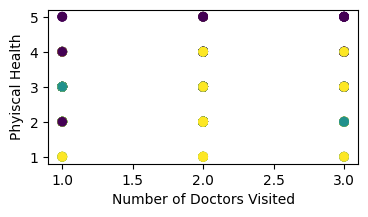

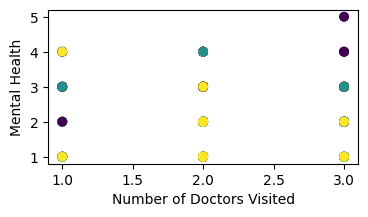

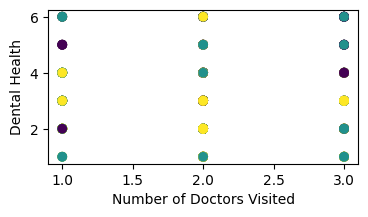

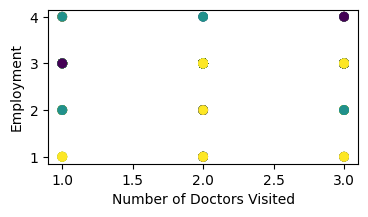

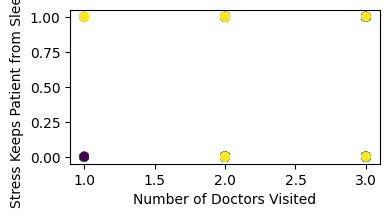

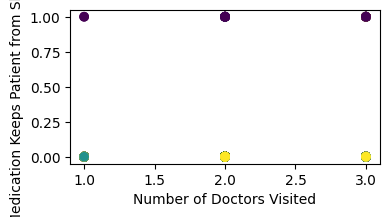

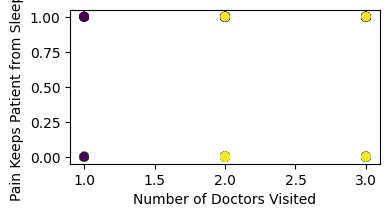

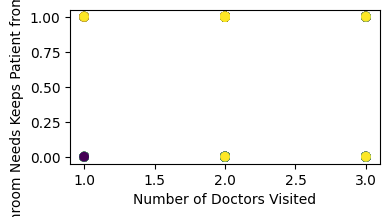

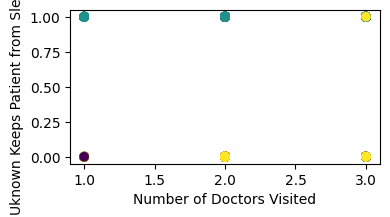

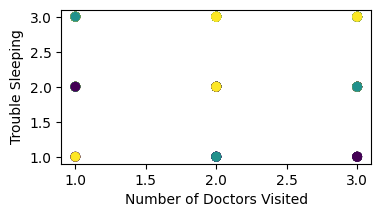

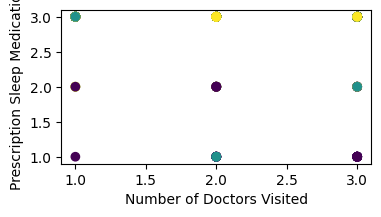

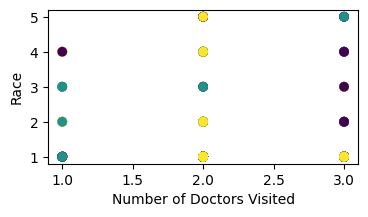

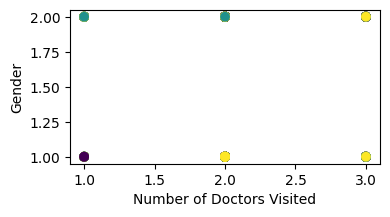

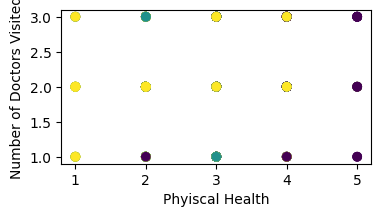

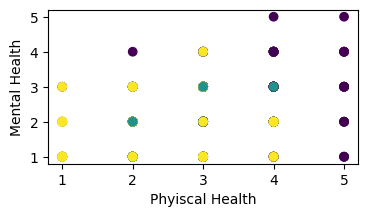

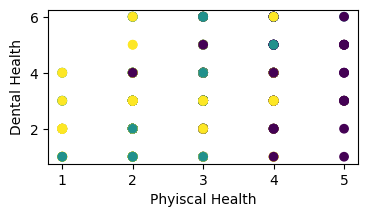

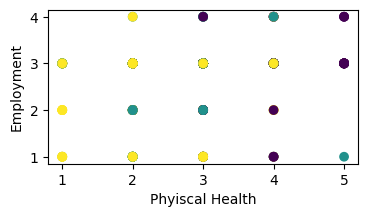

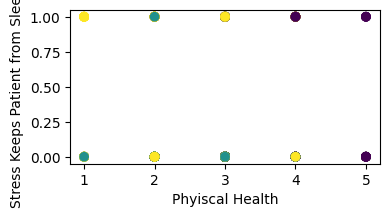

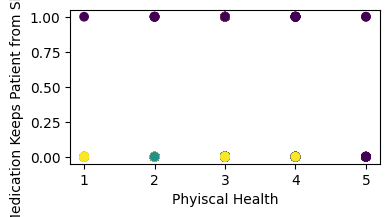

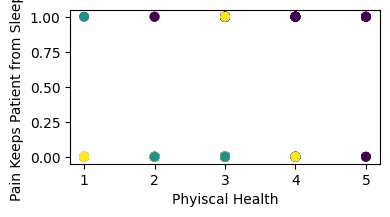

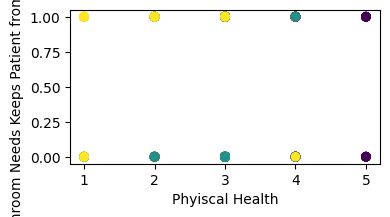

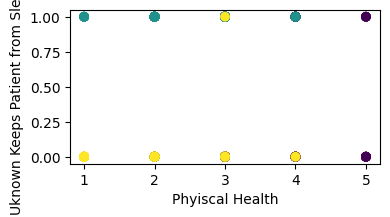

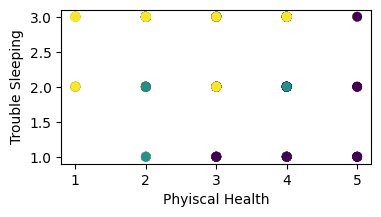

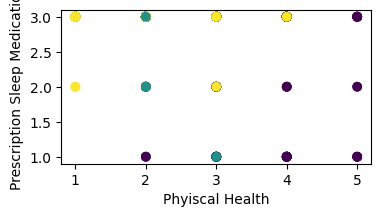

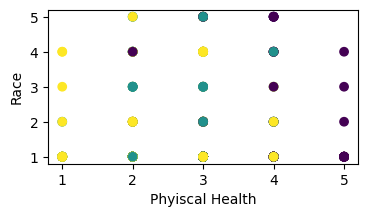

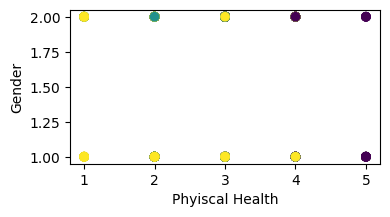

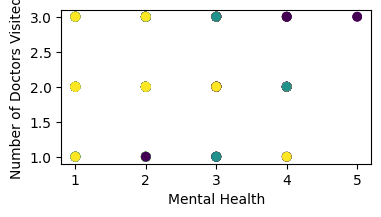

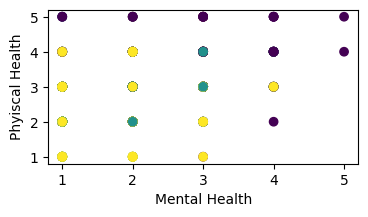

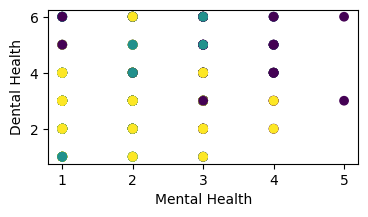

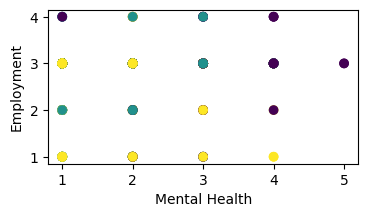

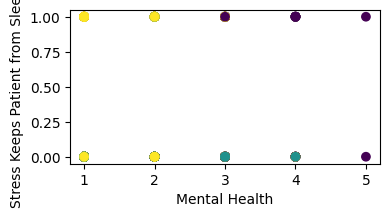

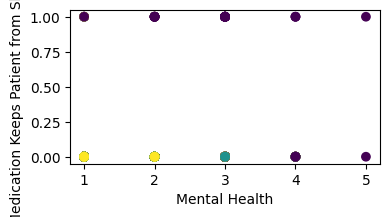

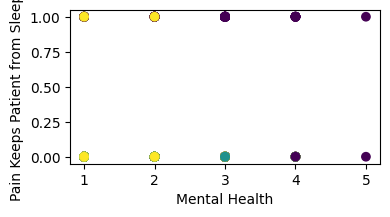

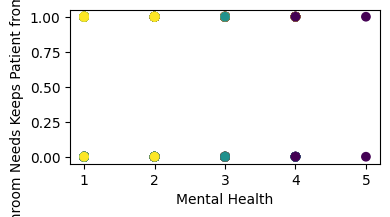

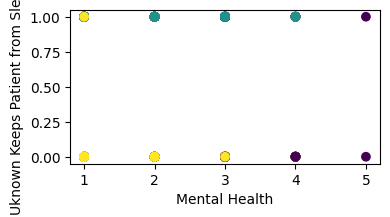

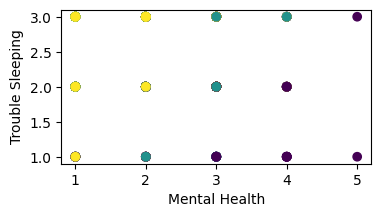

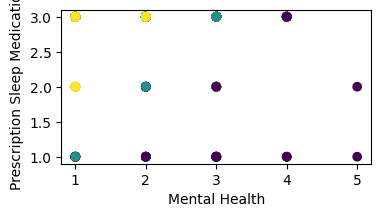

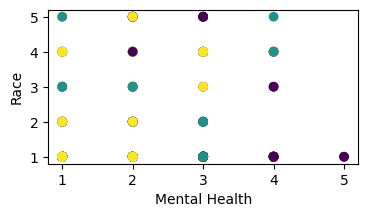

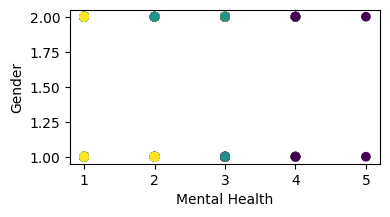

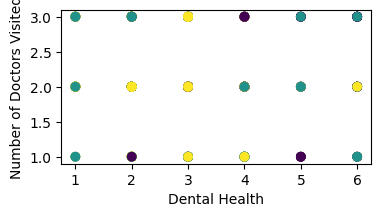

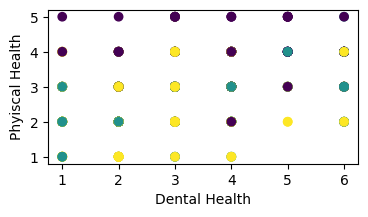

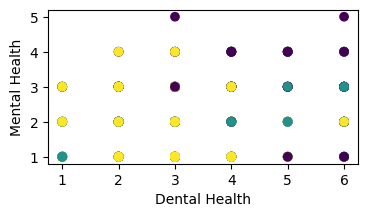

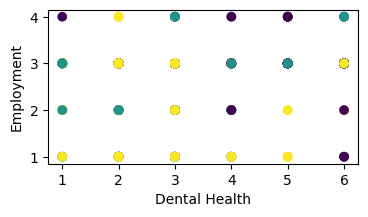

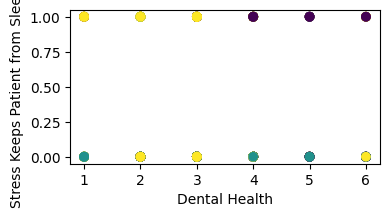

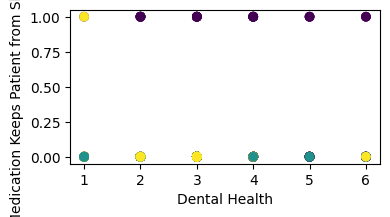

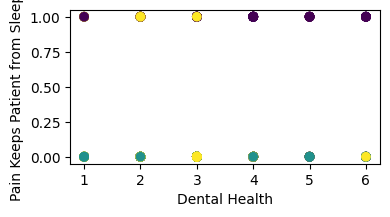

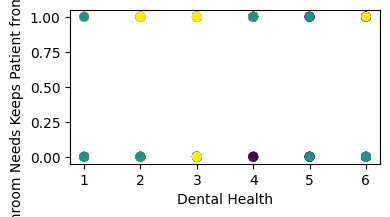

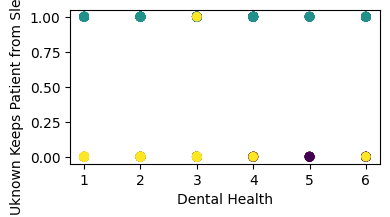

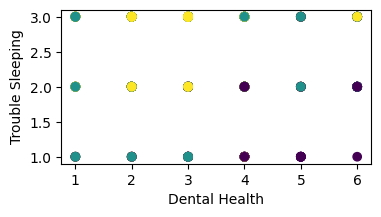

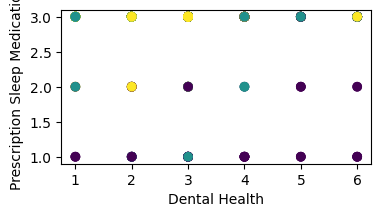

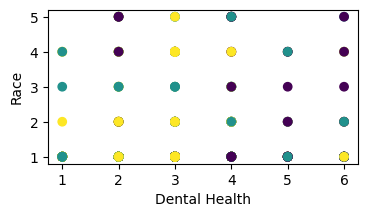

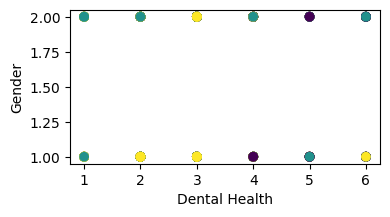

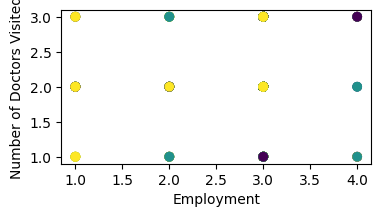

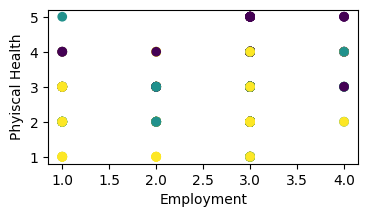

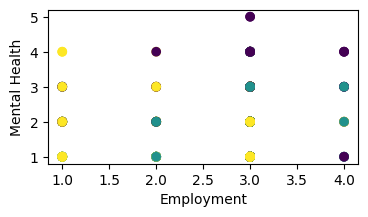

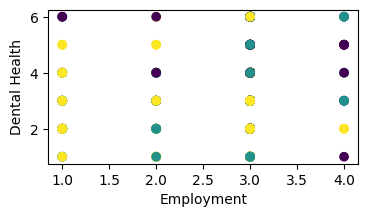

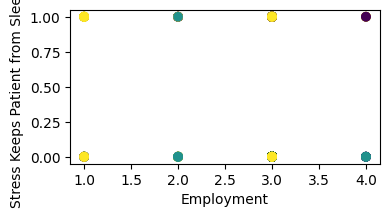

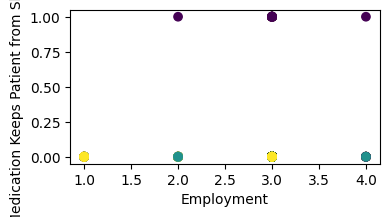

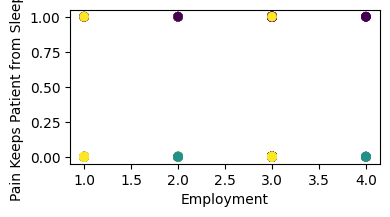

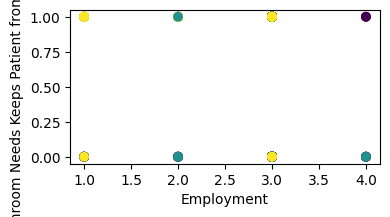

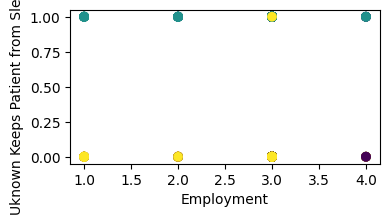

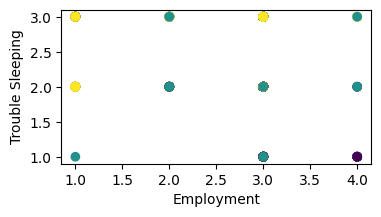

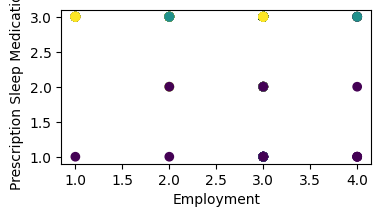

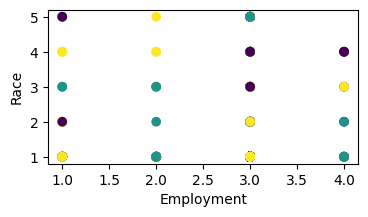

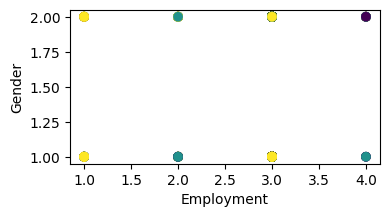

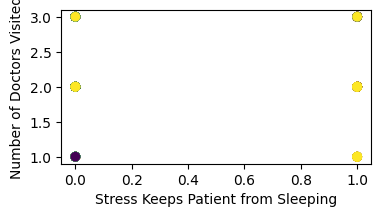

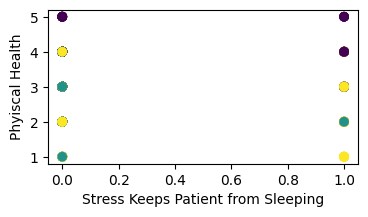

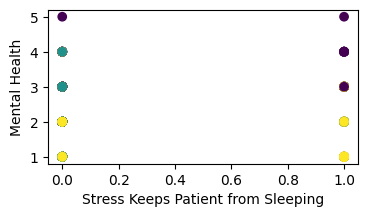

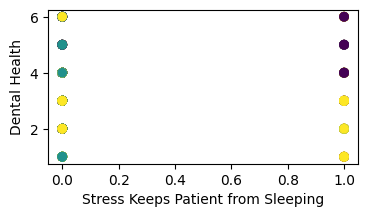

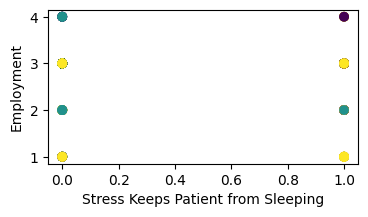

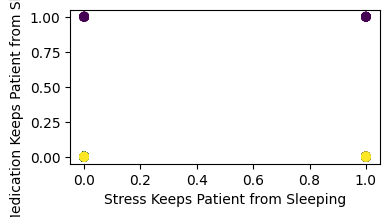

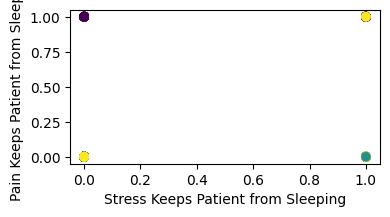

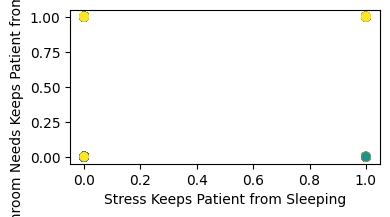

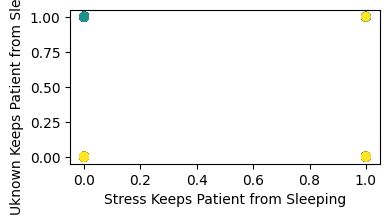

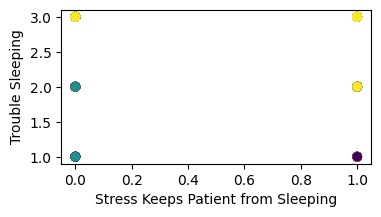

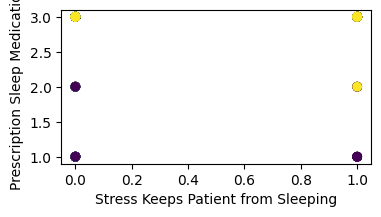

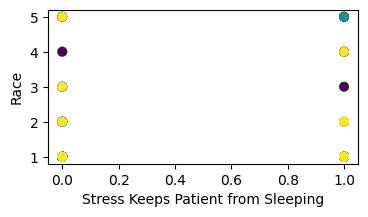

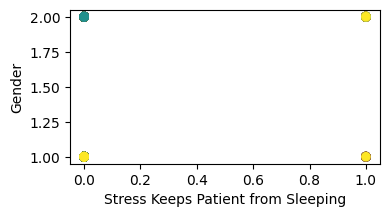

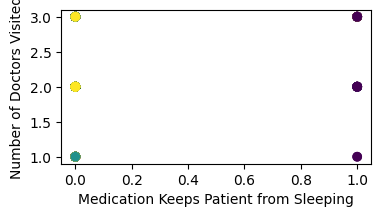

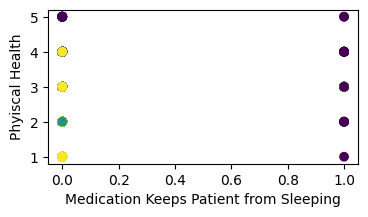

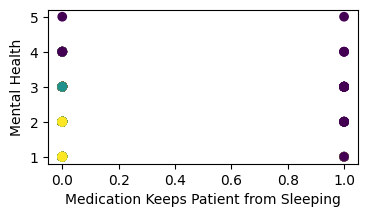

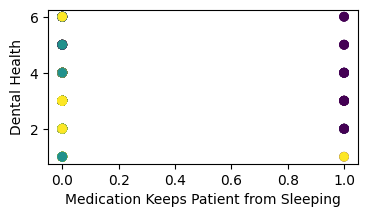

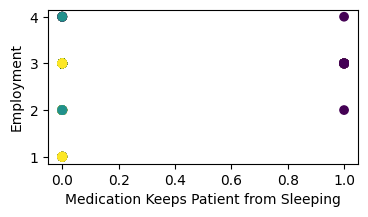

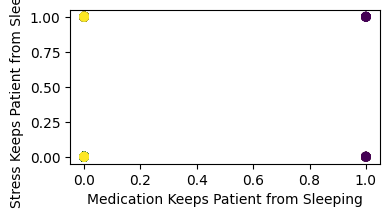

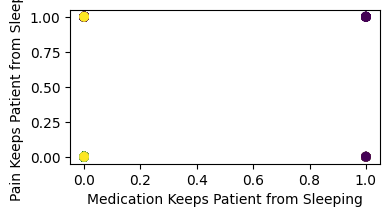

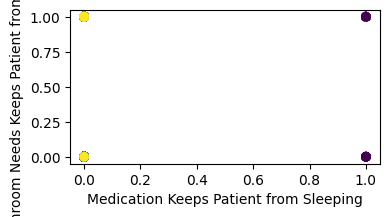

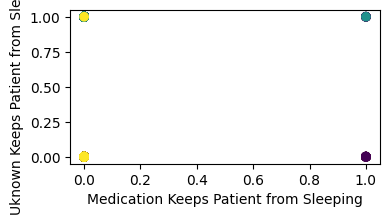

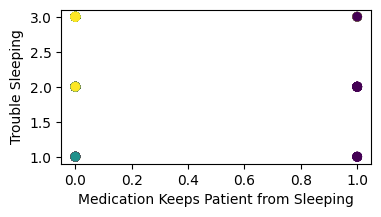

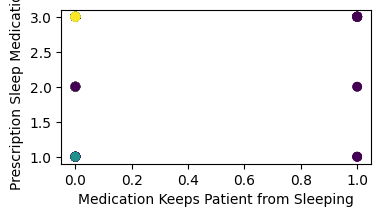

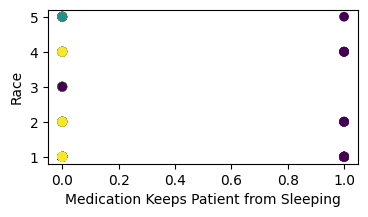

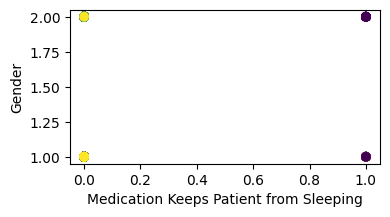

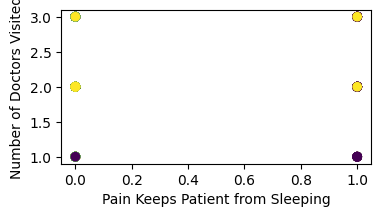

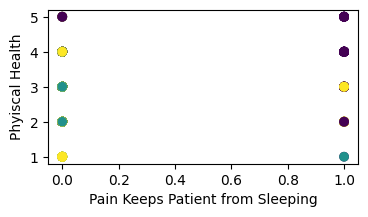

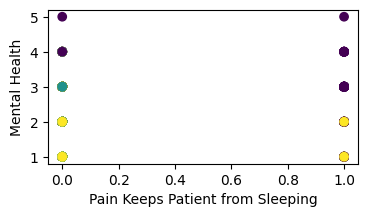

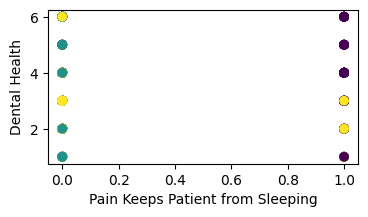

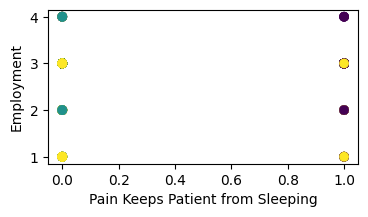

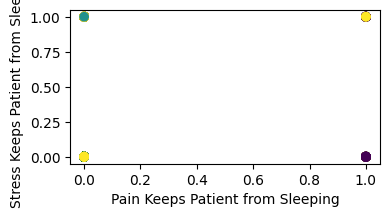

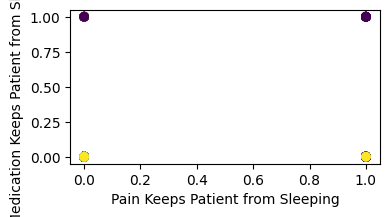

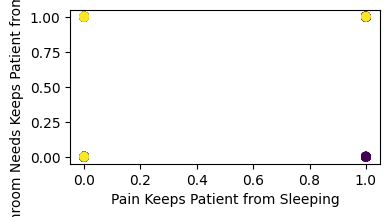

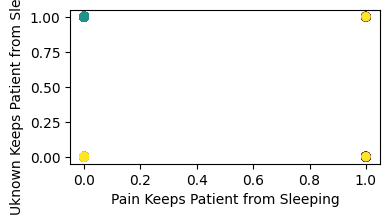

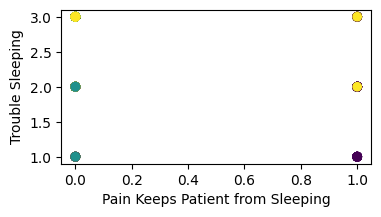

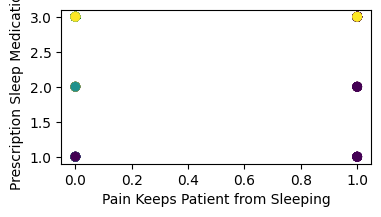

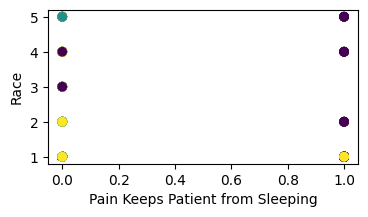

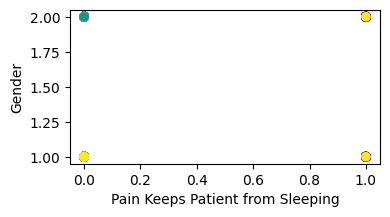

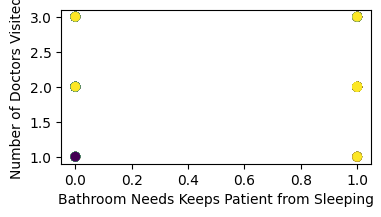

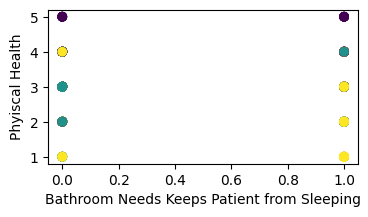

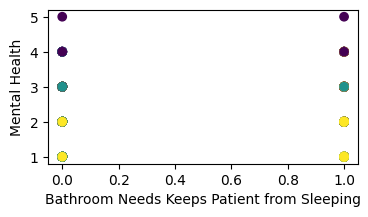

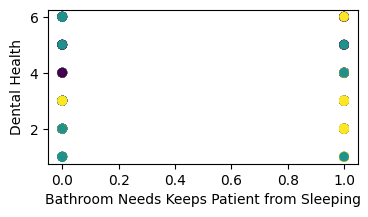

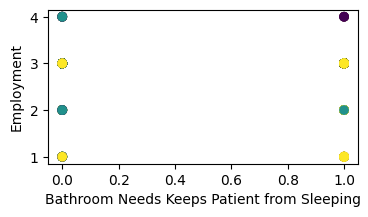

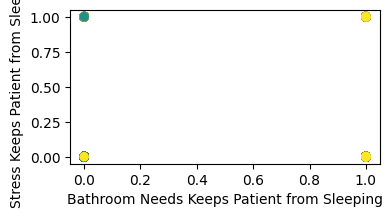

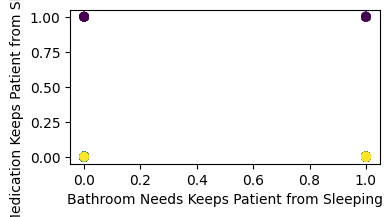

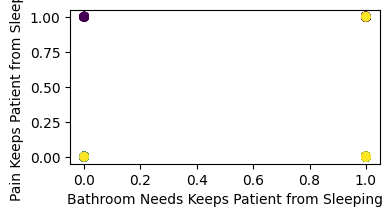

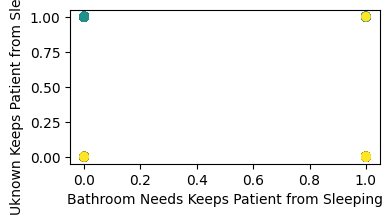

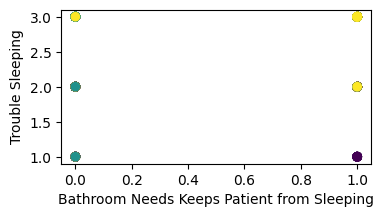

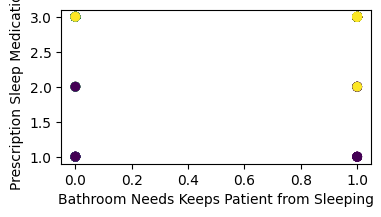

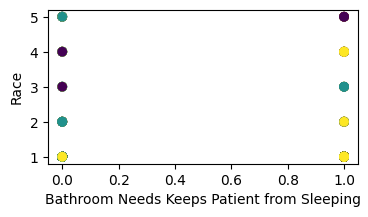

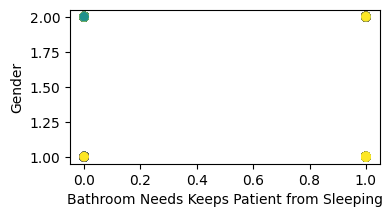

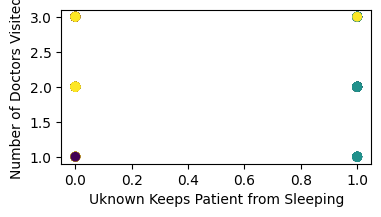

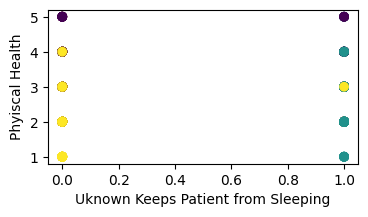

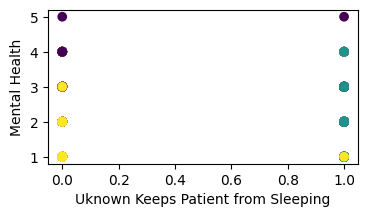

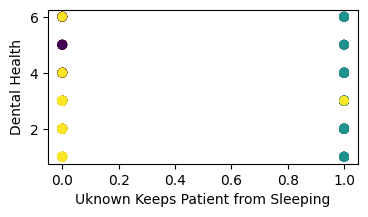

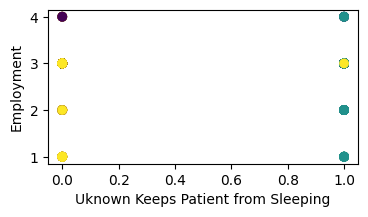

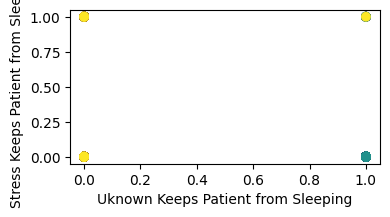

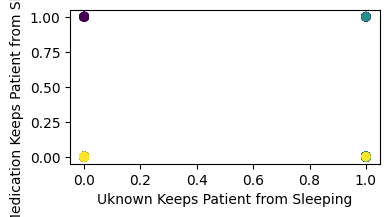

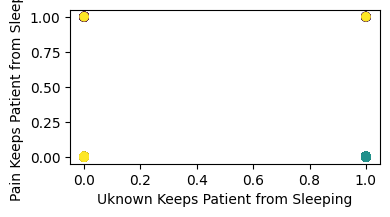

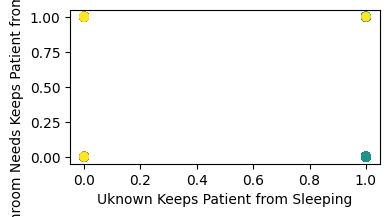

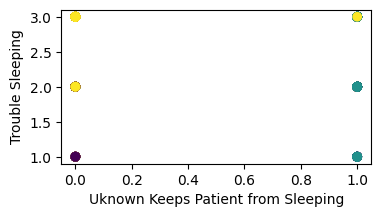

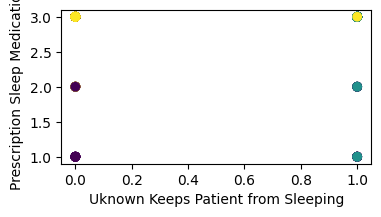

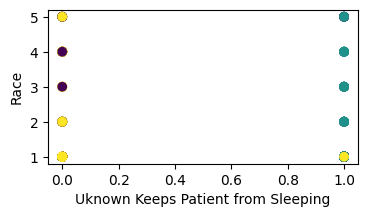

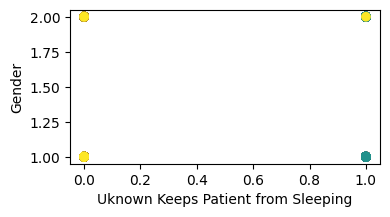

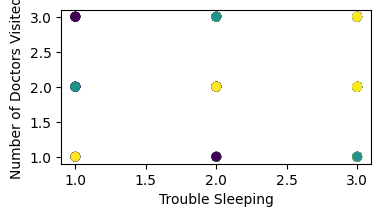

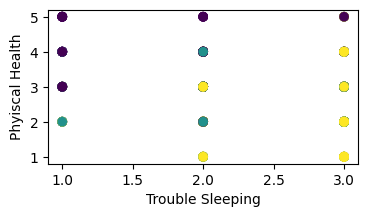

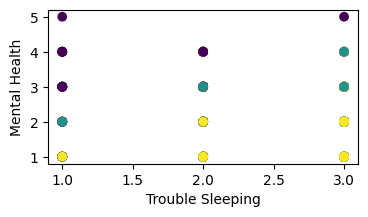

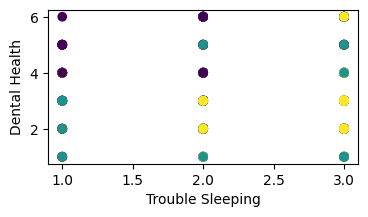

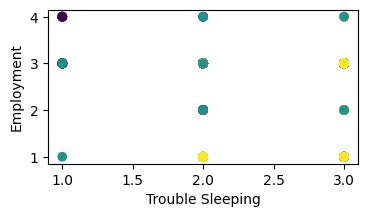

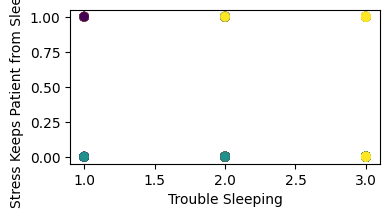

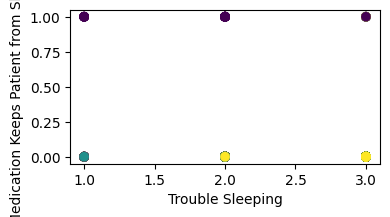

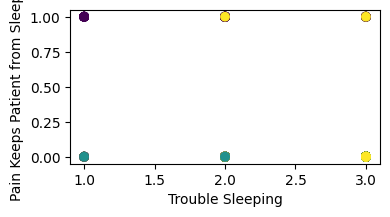

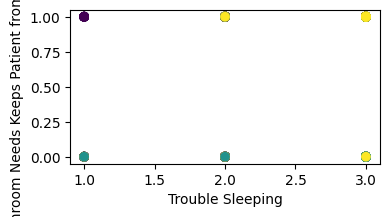

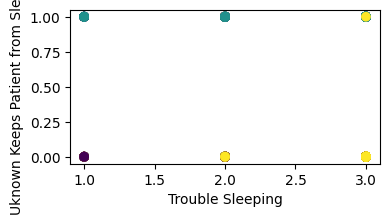

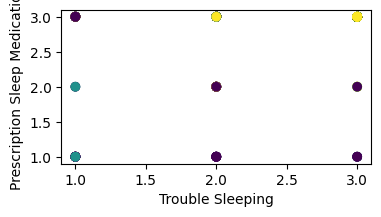

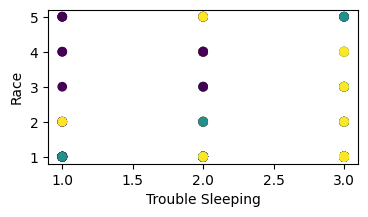

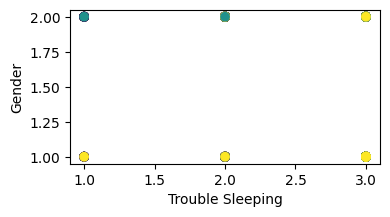

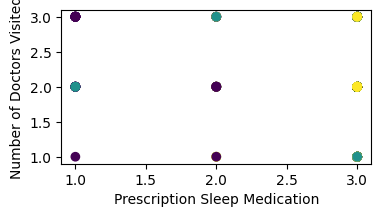

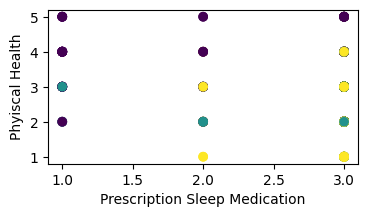

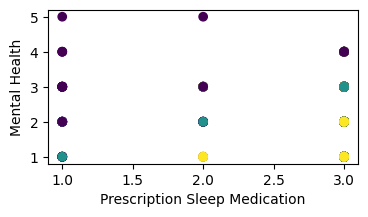

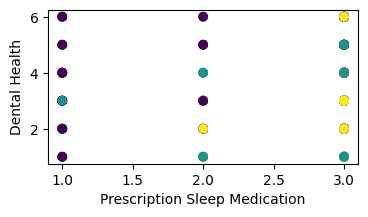

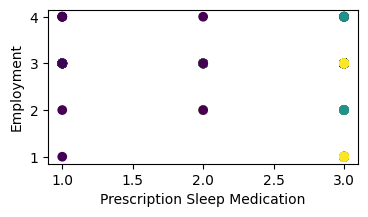

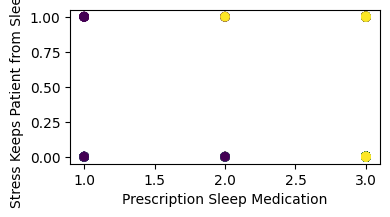

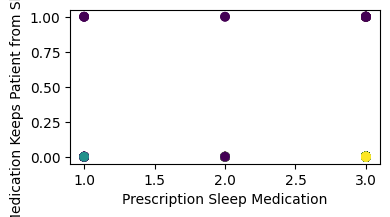

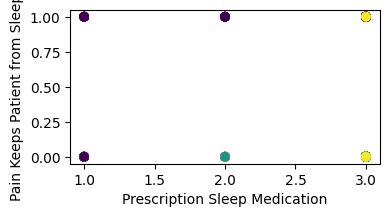

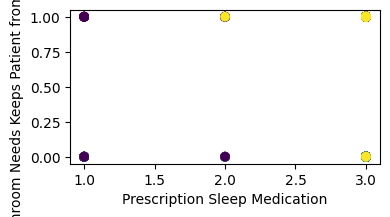

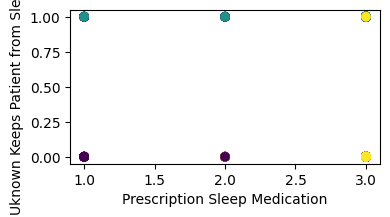

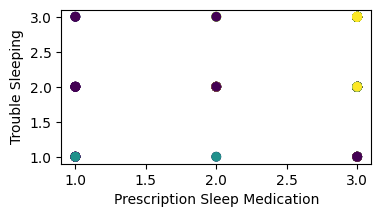

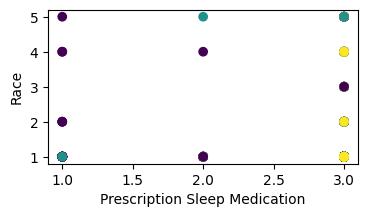

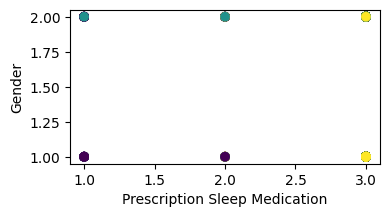

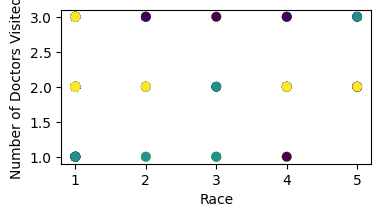

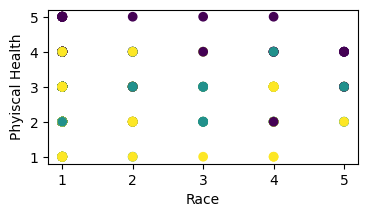

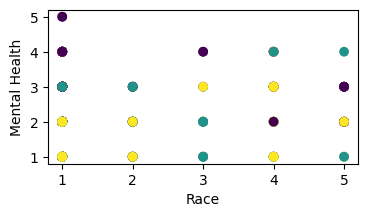

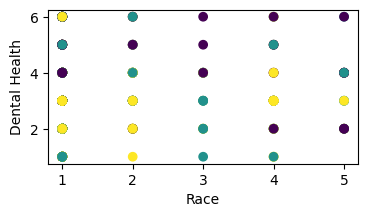

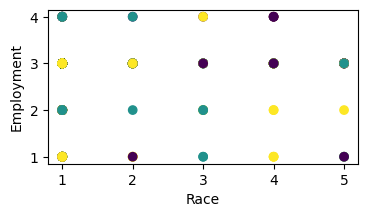

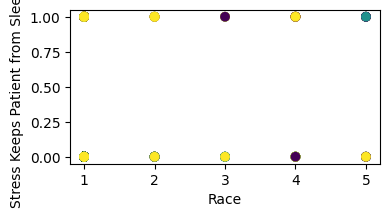

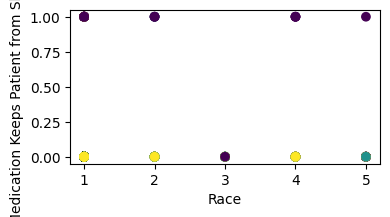

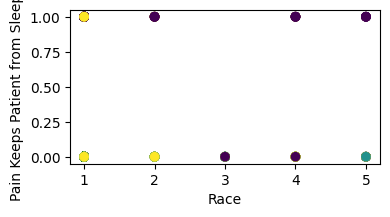

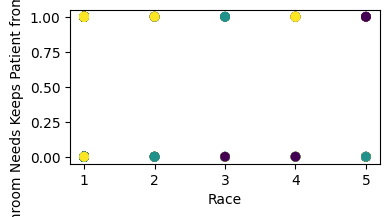

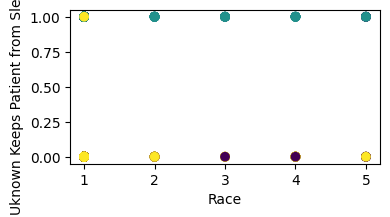

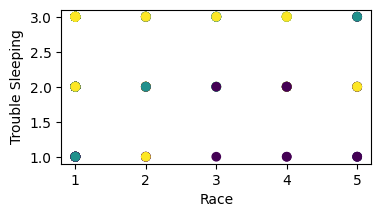

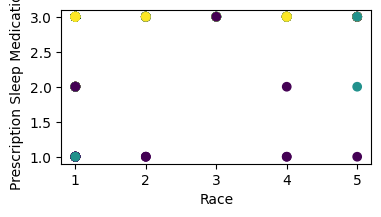

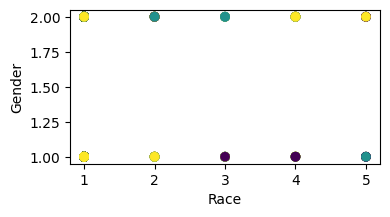

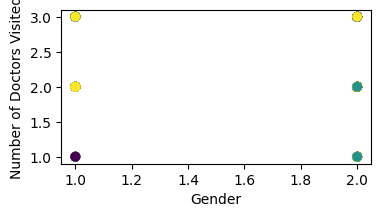

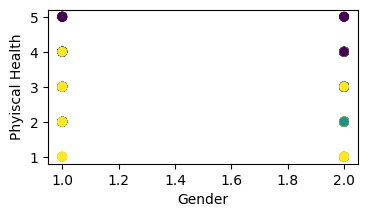

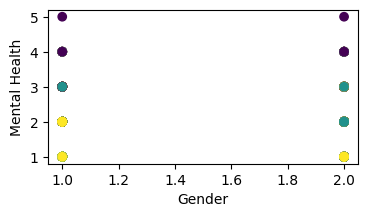

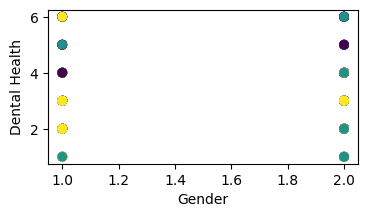

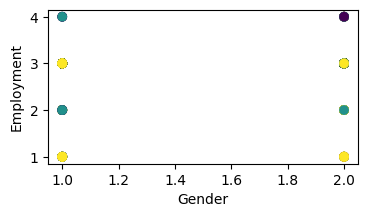

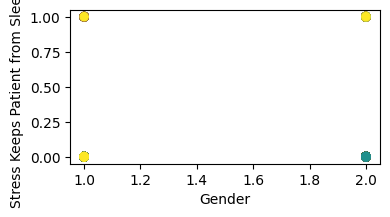

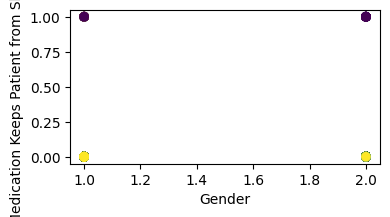

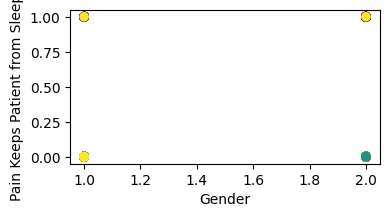

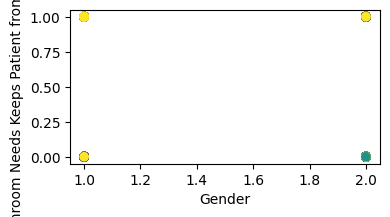

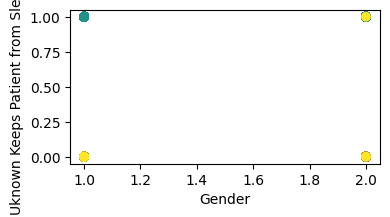

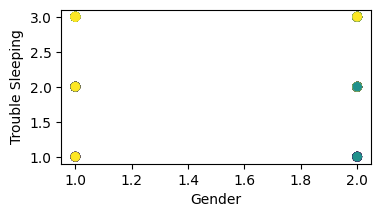

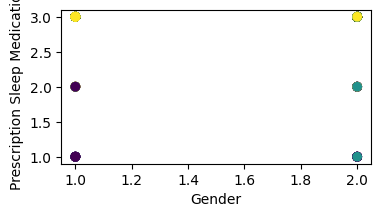

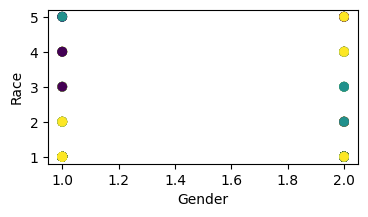

In [18]:
import seaborn as sns
#用散佈圖方式顯示資料
column_names = data.columns.tolist()
# column_names.remove('Number of Doctors Visited')
column_names.remove('group')
column_names.remove('group_test_centers')


for i, column_i in enumerate(column_names):
    for j, column_j in enumerate(column_names):
        if column_i==column_j:
            continue;
        plt.figure(figsize=(4,2))
        plt.scatter(x=data[column_i], y=data[column_j],c=data['group'])
        plt.xlabel(column_i)
        plt.ylabel(column_j)
        plt.show()
        # sns.relplot(ax=axes[i,j], x=data[column_i], y=data[column_j],data=data,hue="group")

C:\Users\user\miniconda3\envs\week_08\lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


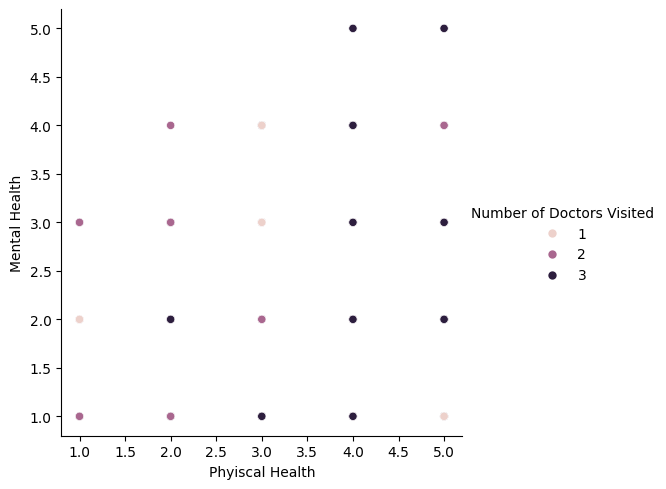

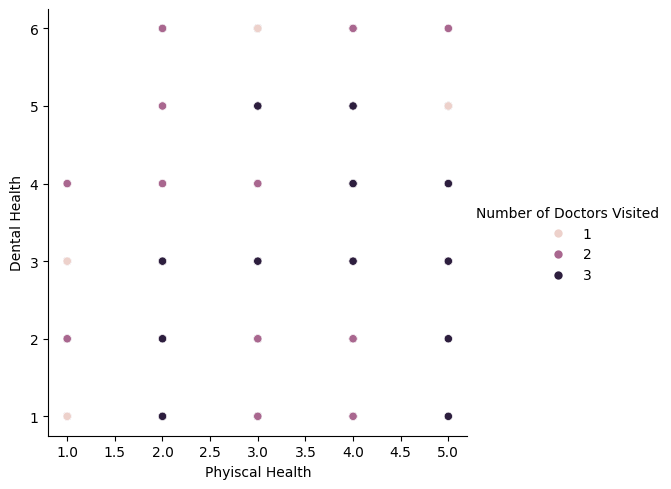

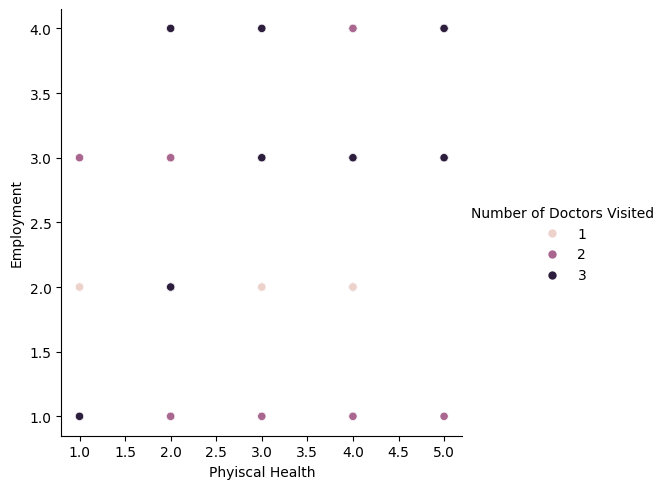

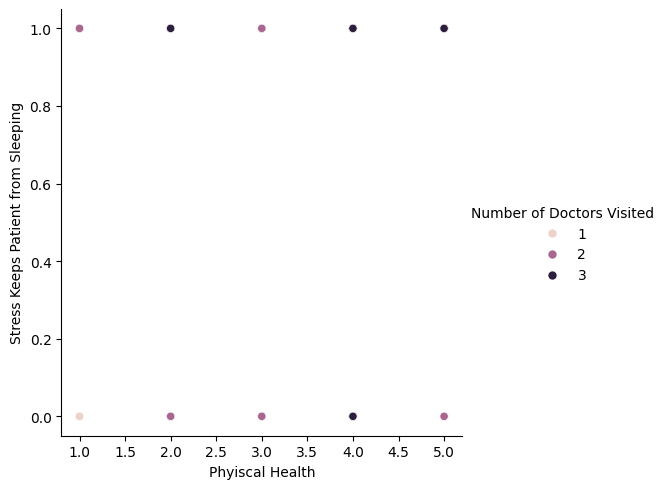

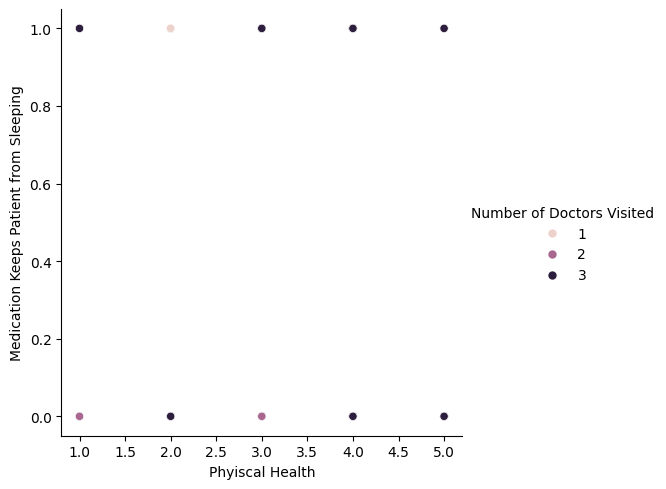

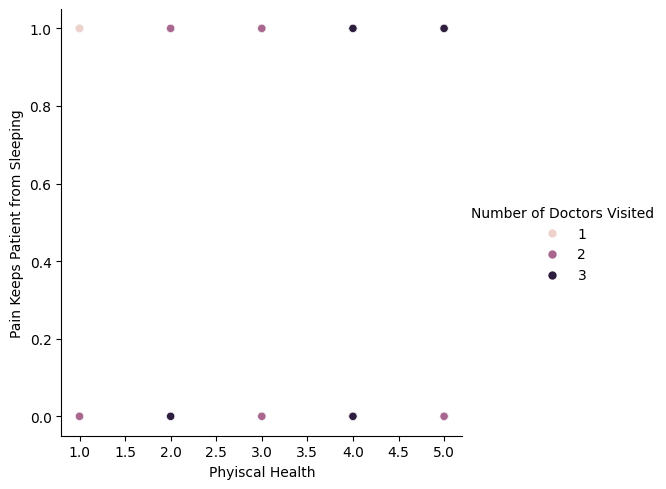

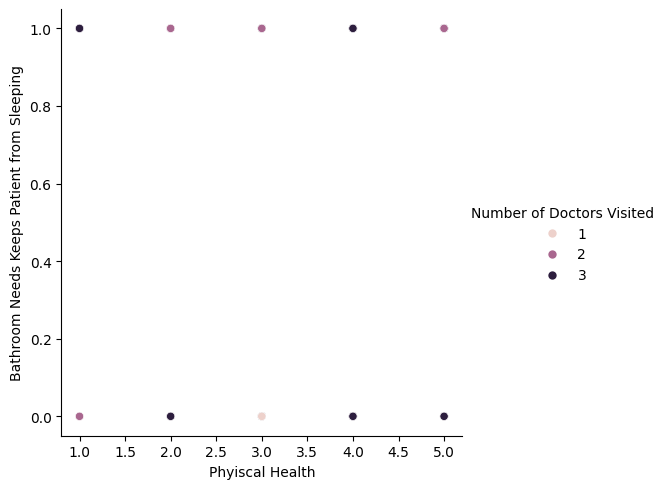

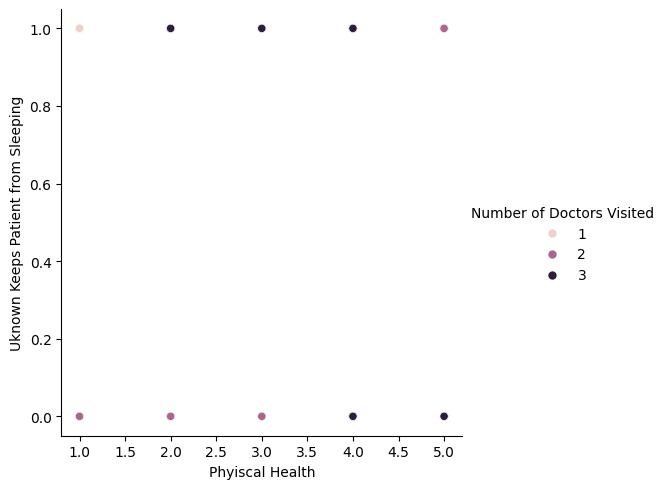

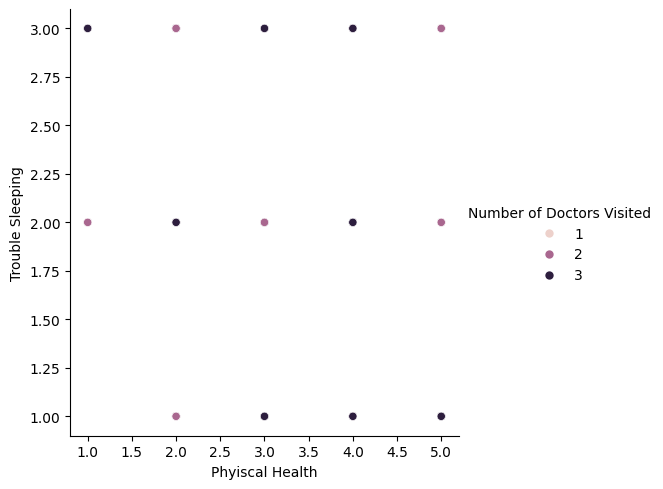

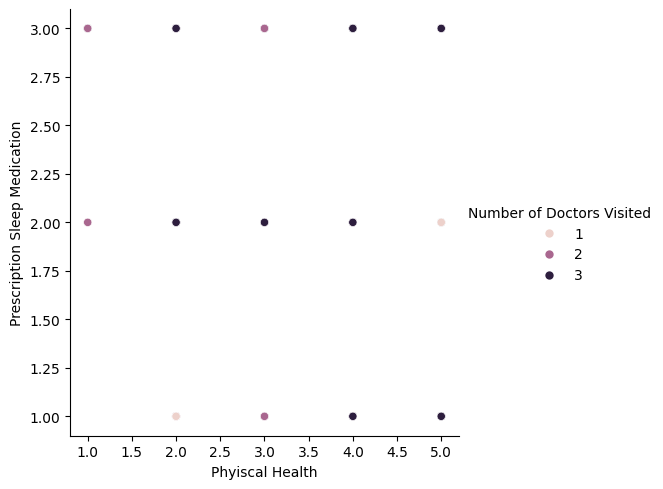

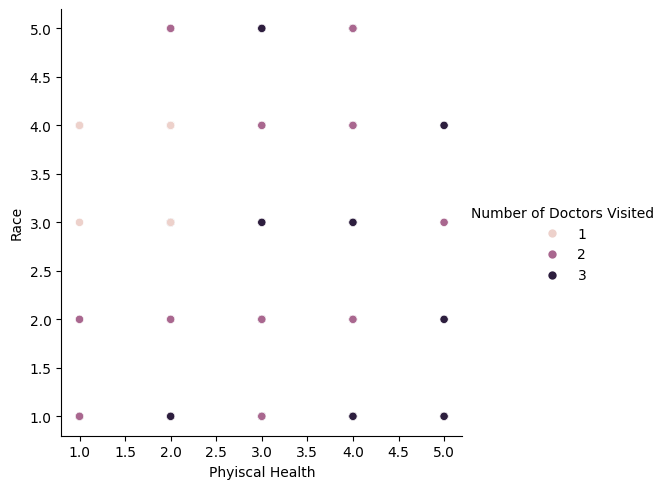

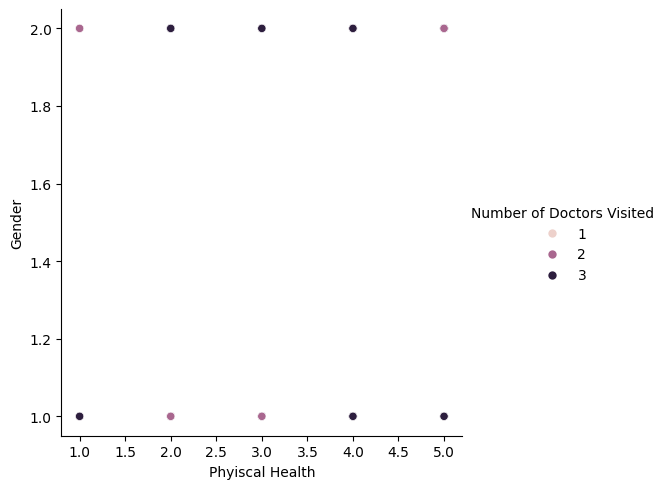

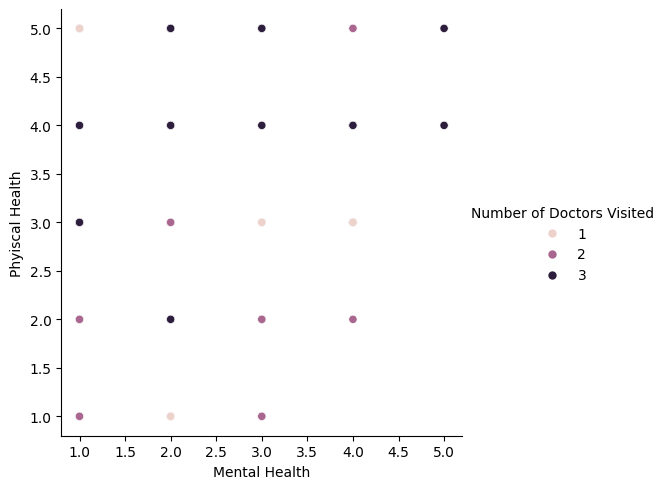

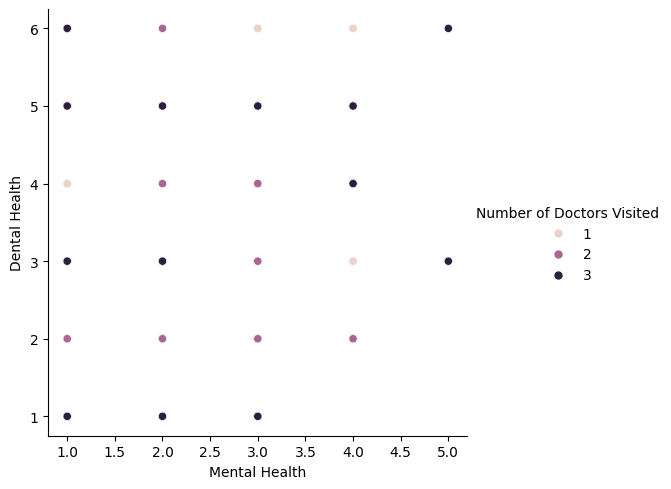

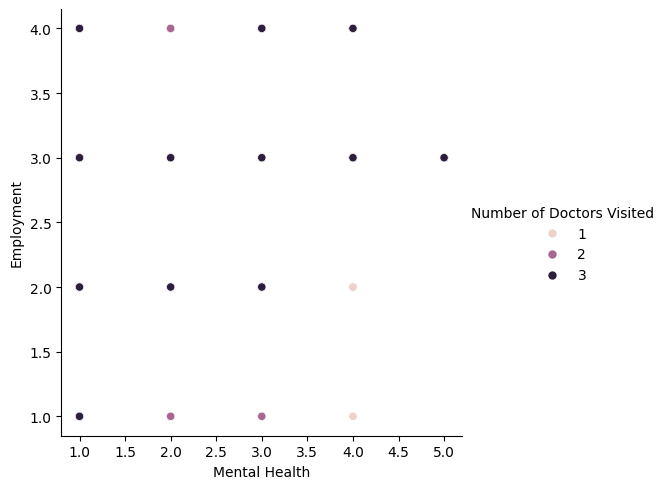

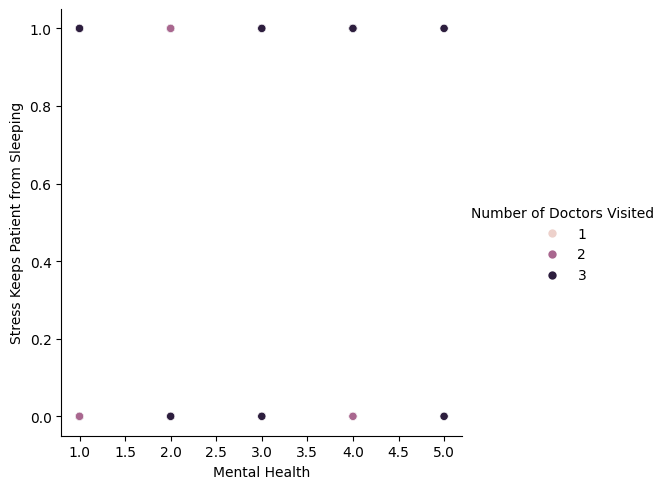

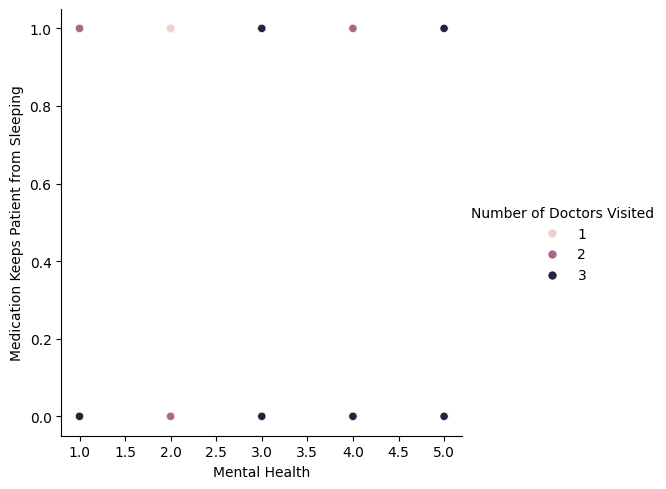

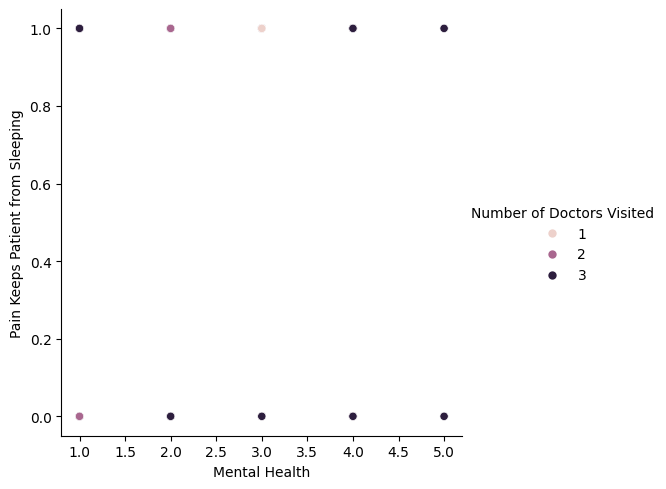

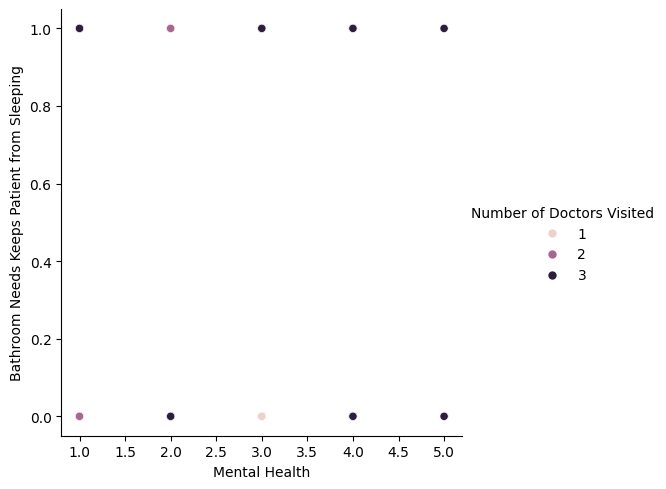

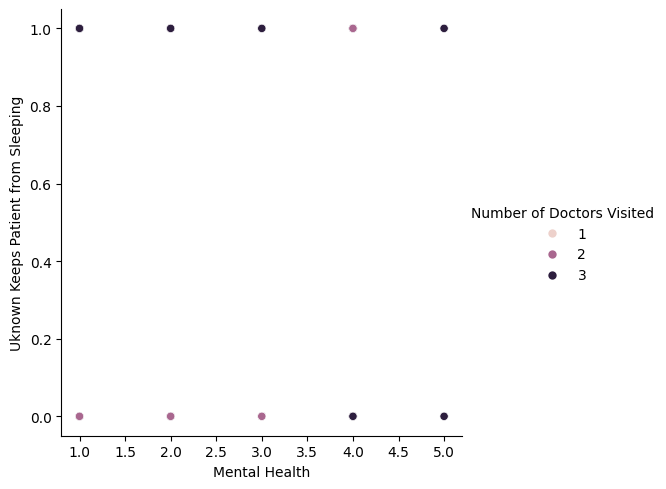

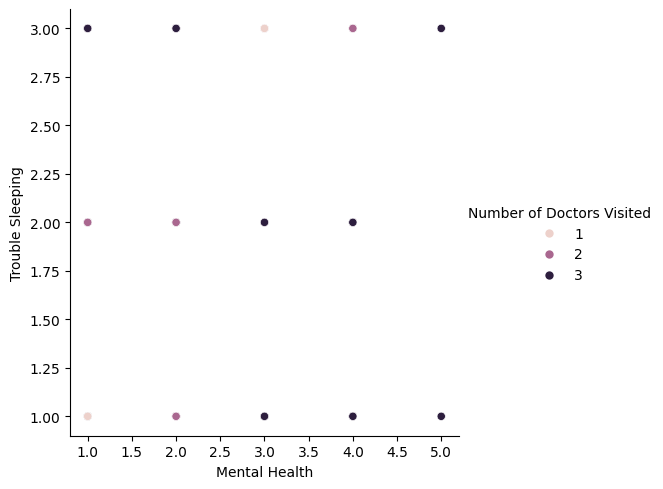

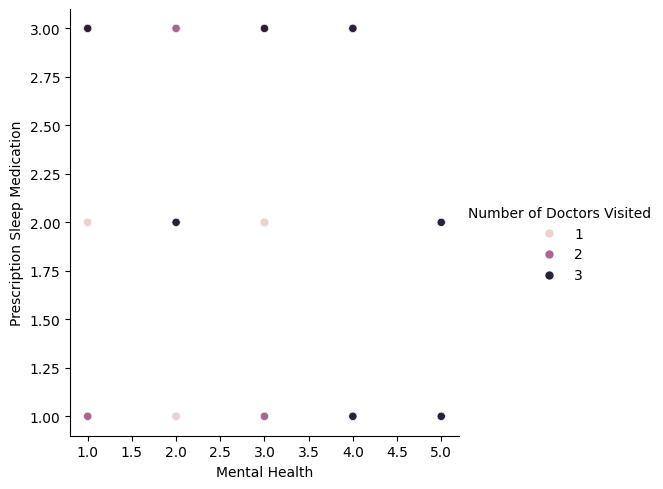

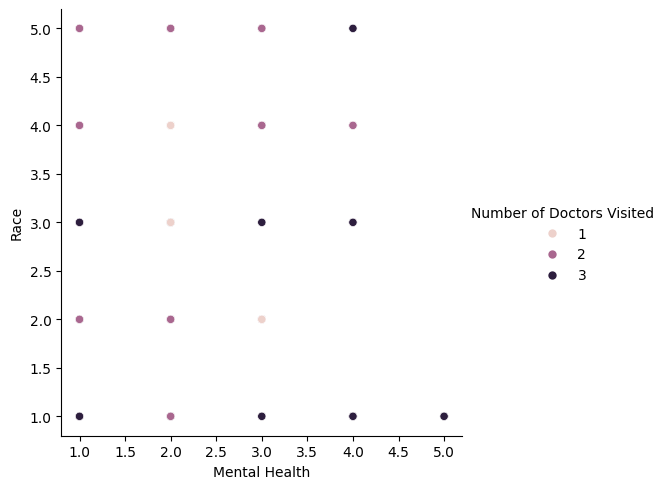

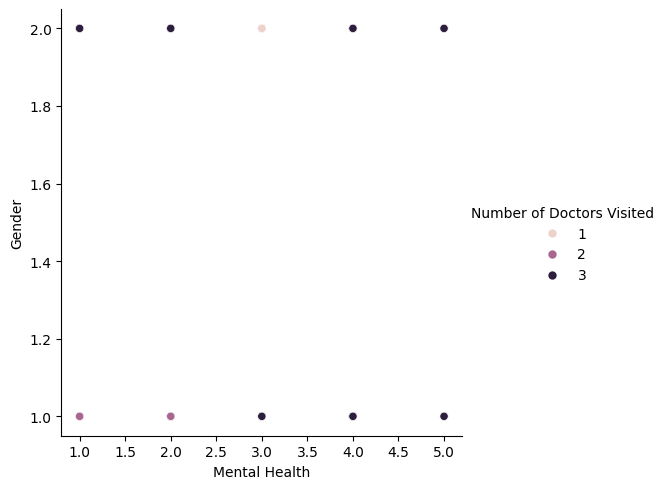

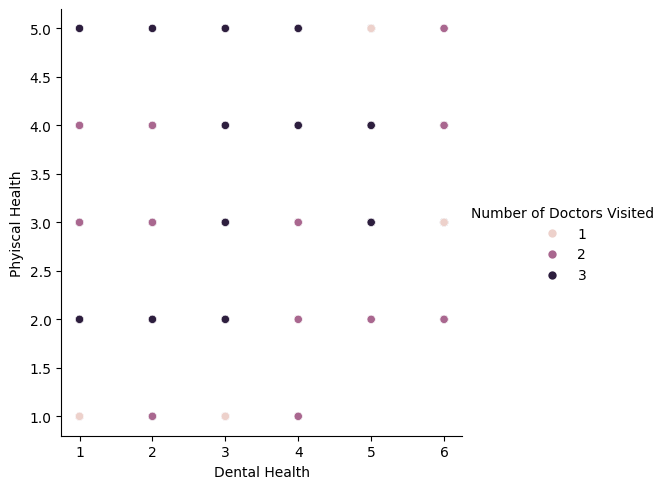

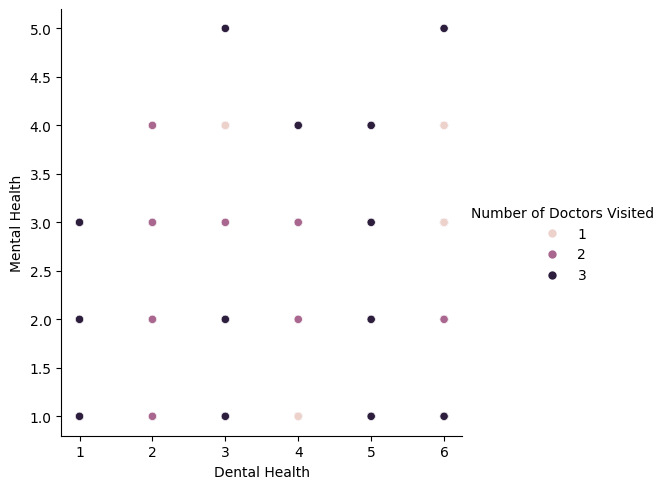

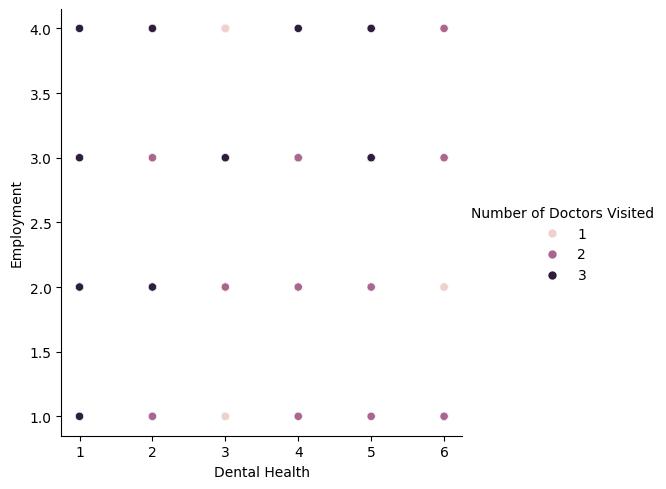

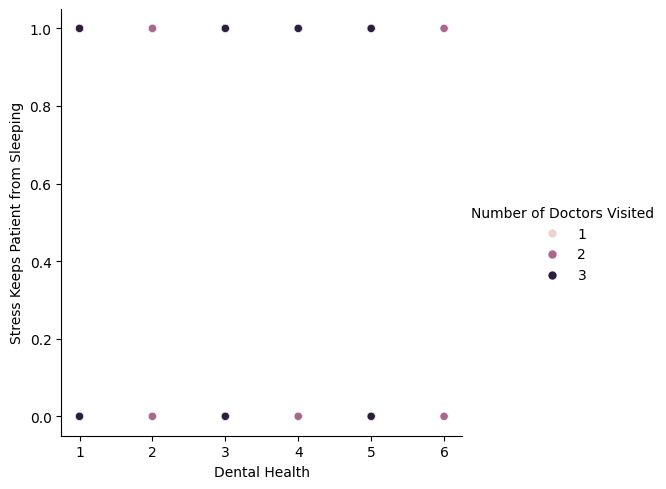

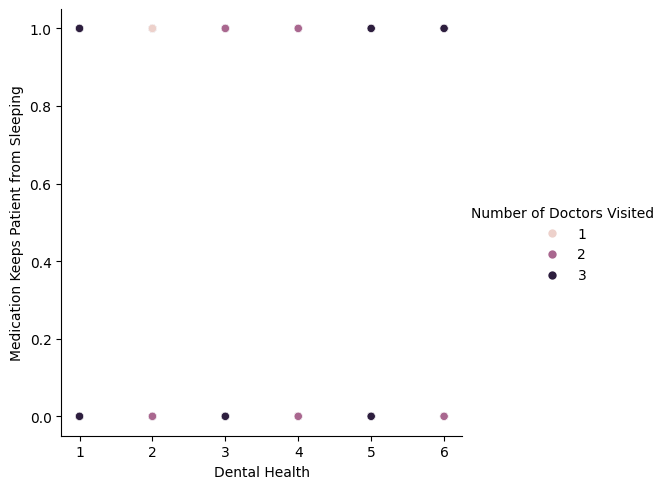

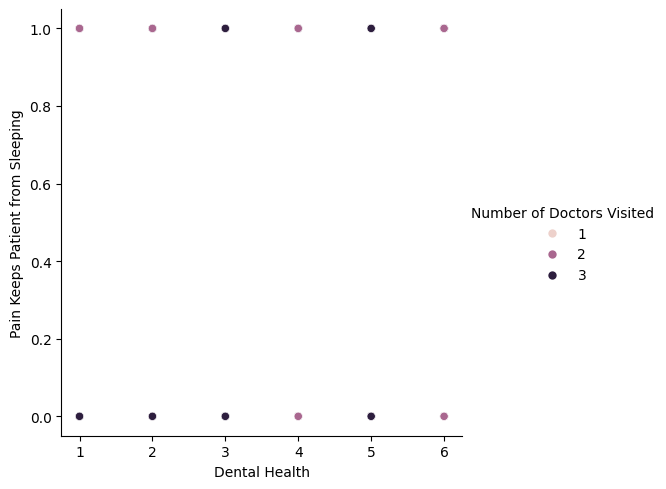

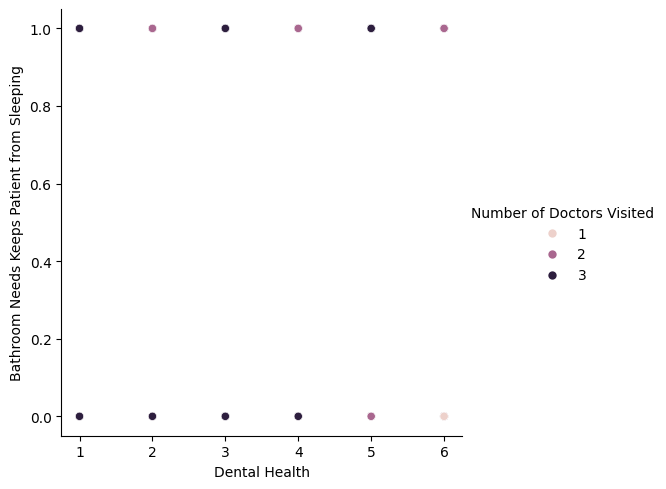

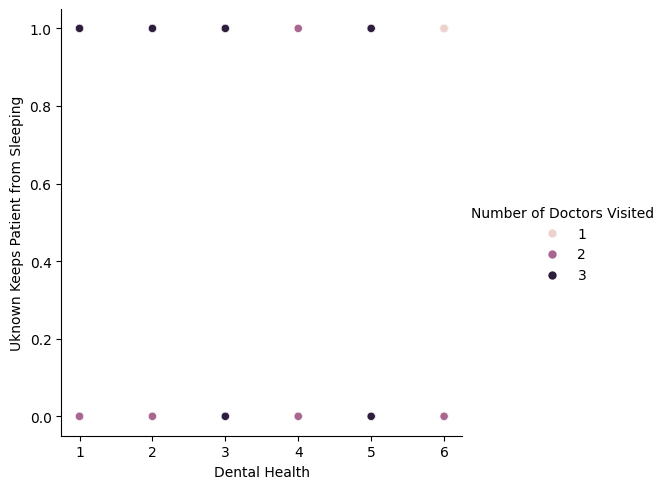

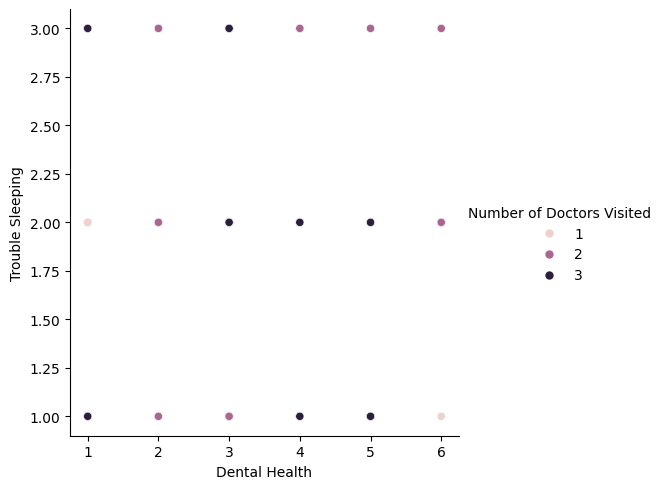

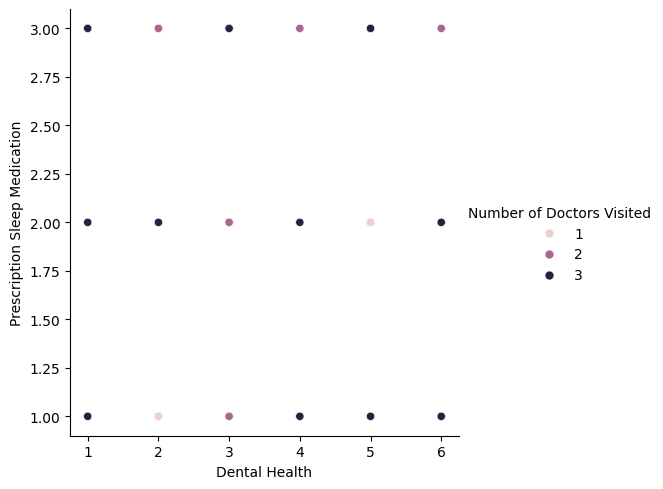

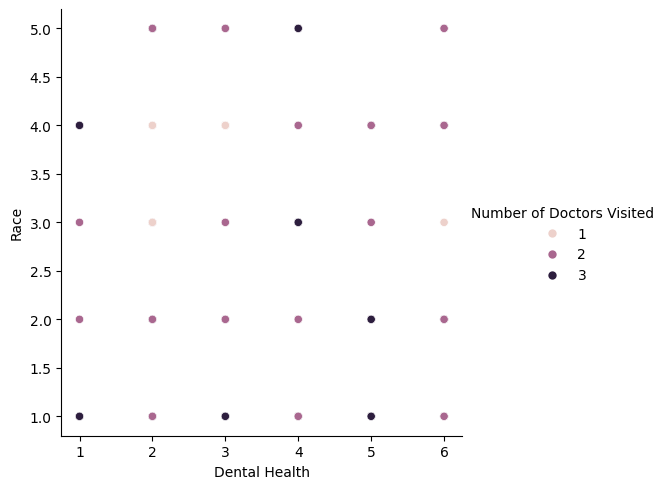

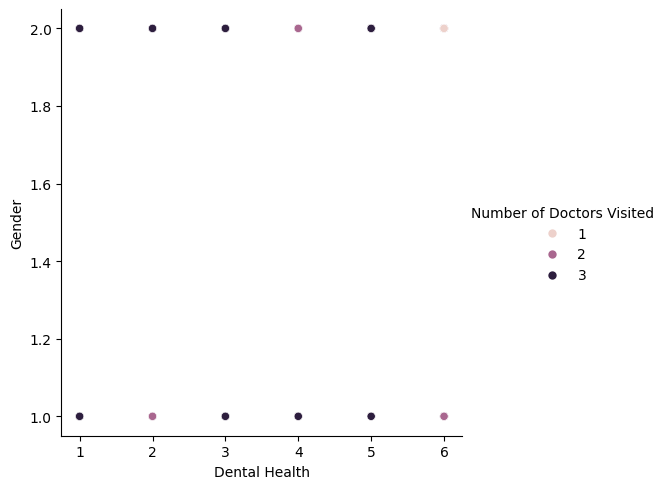

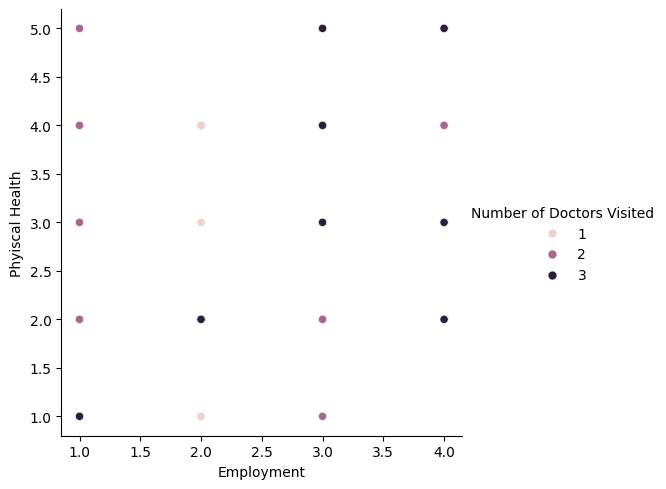

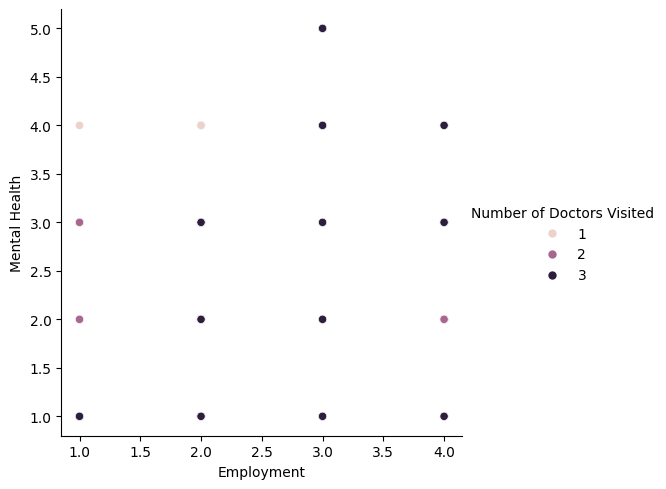

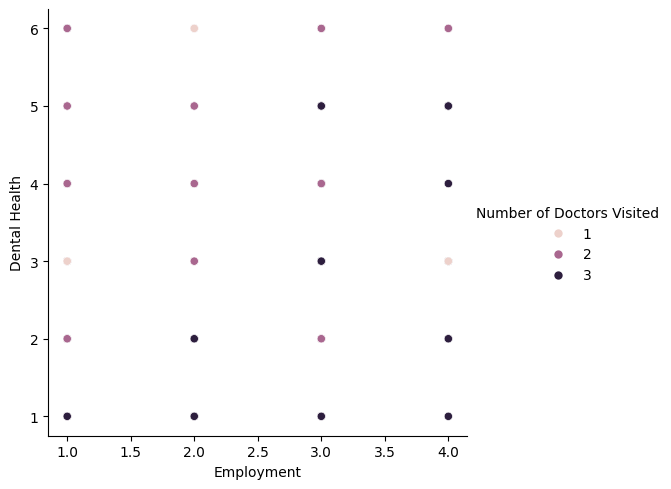

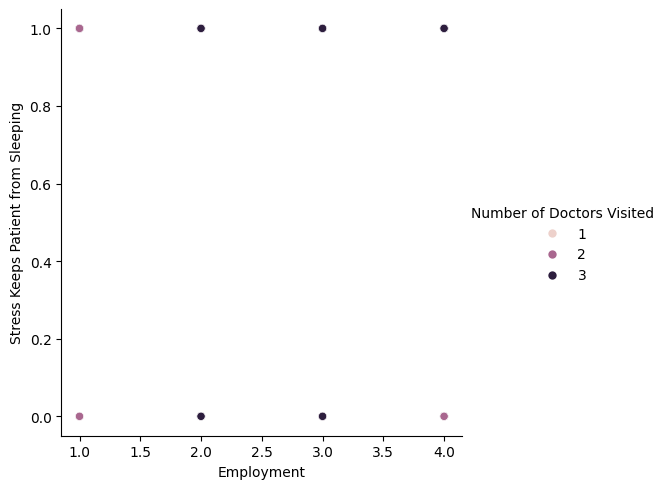

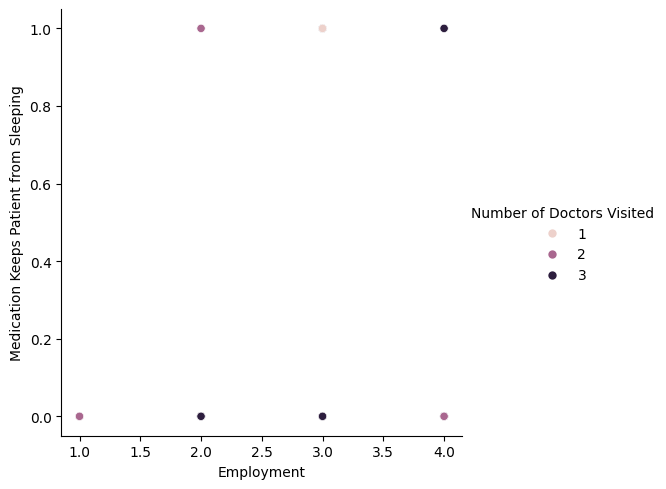

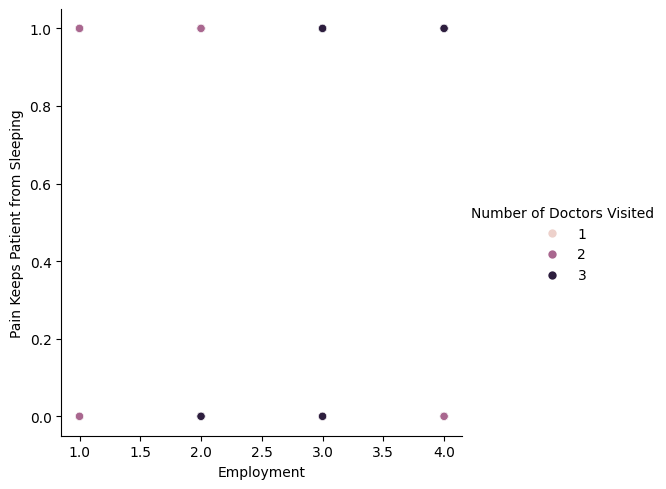

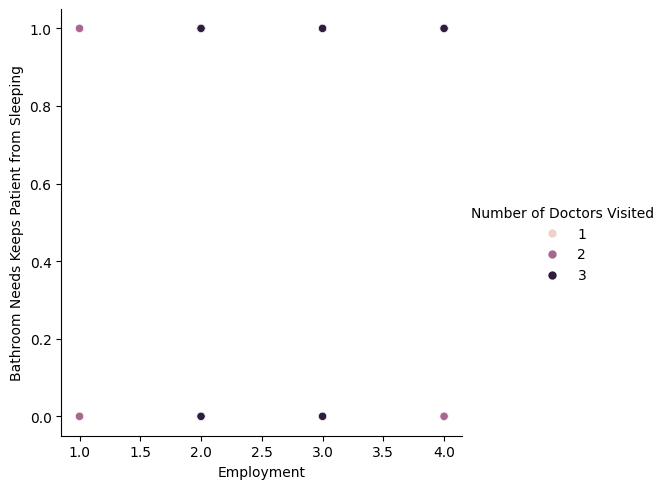

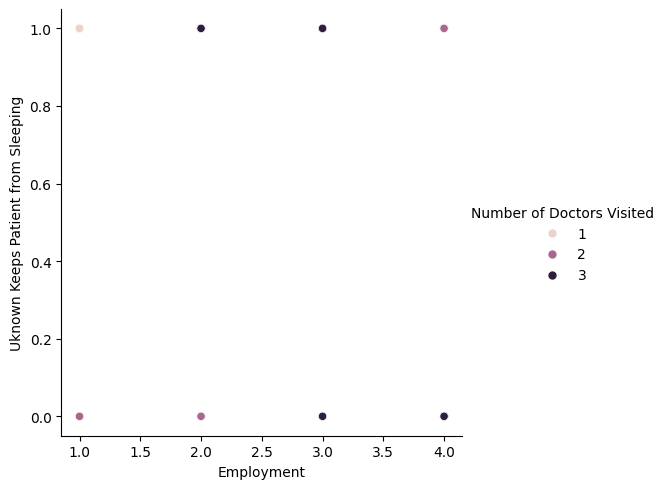

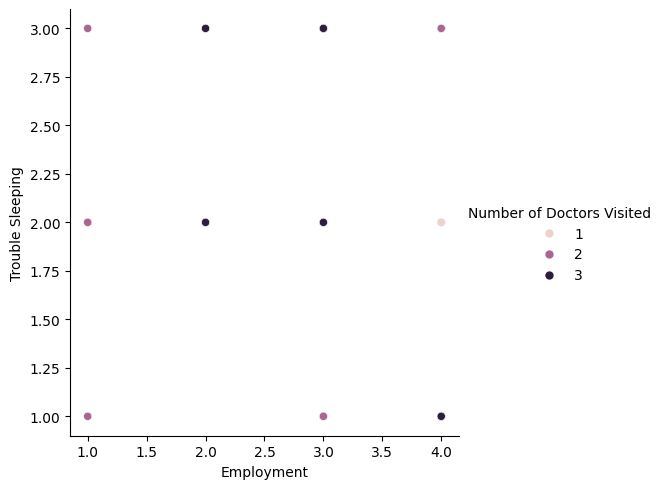

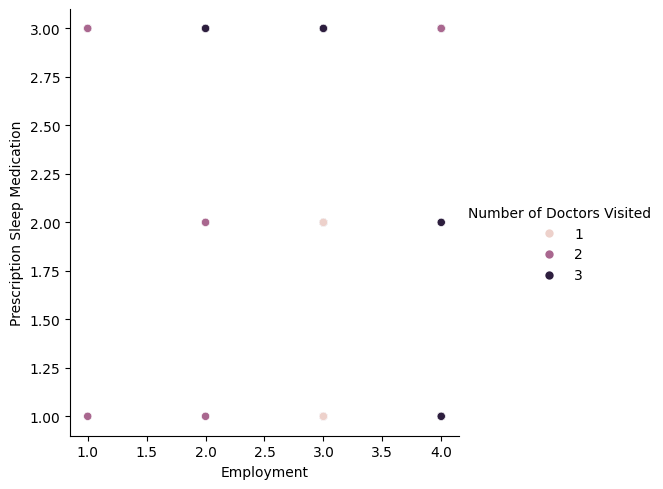

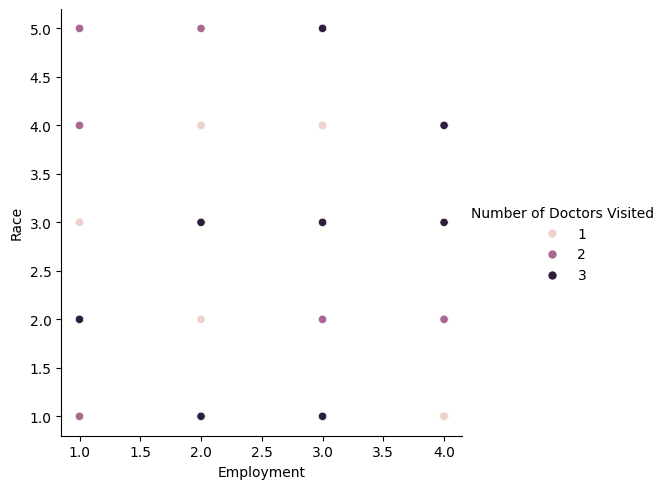

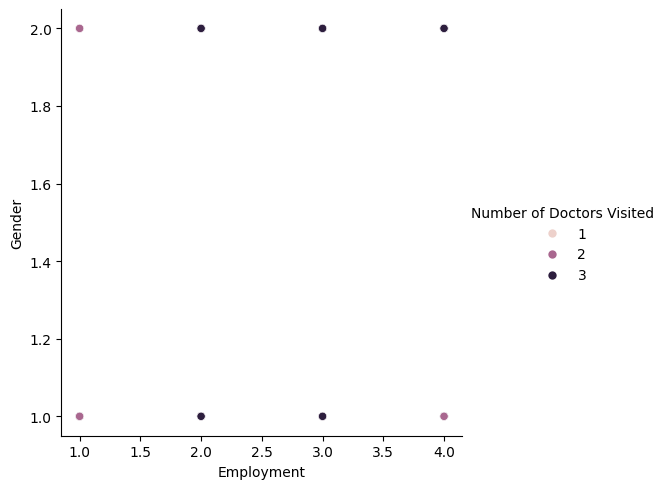

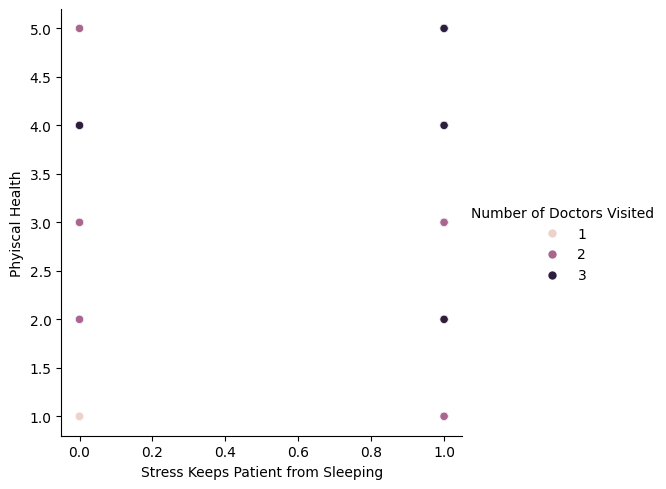

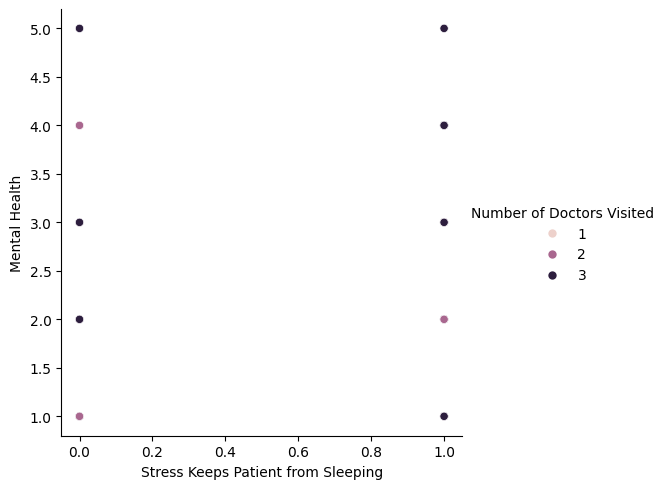

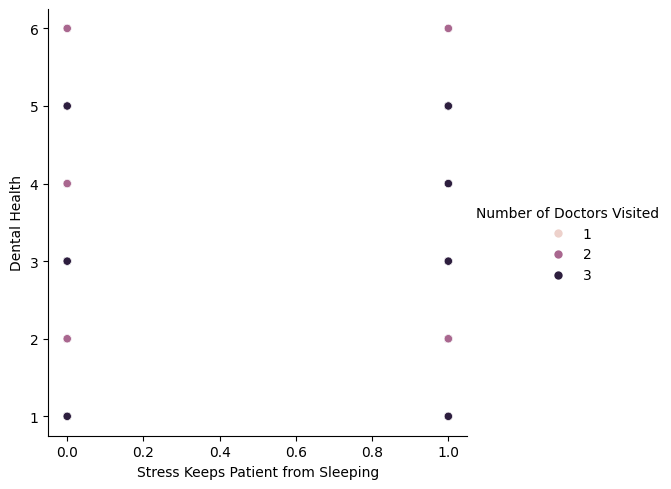

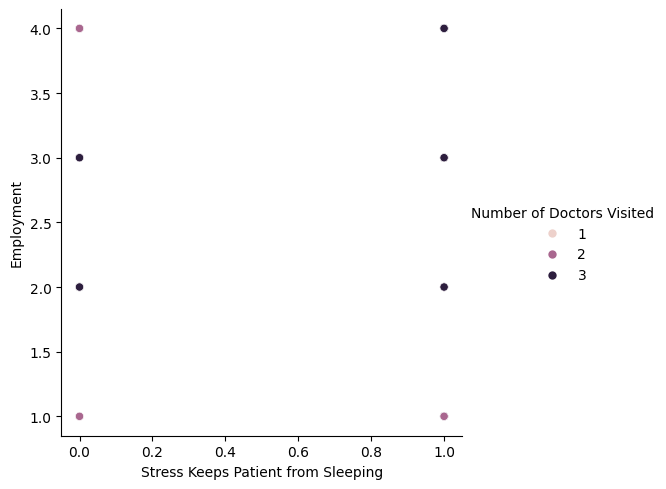

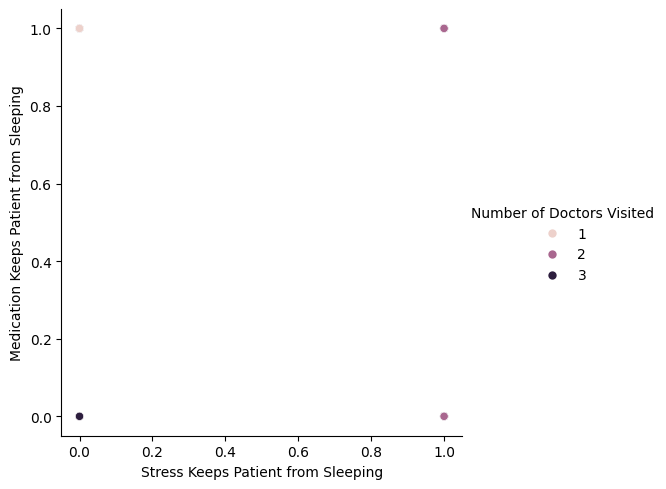

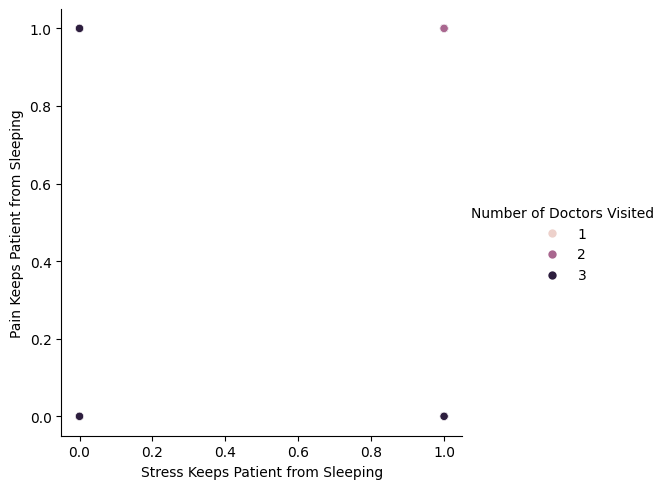

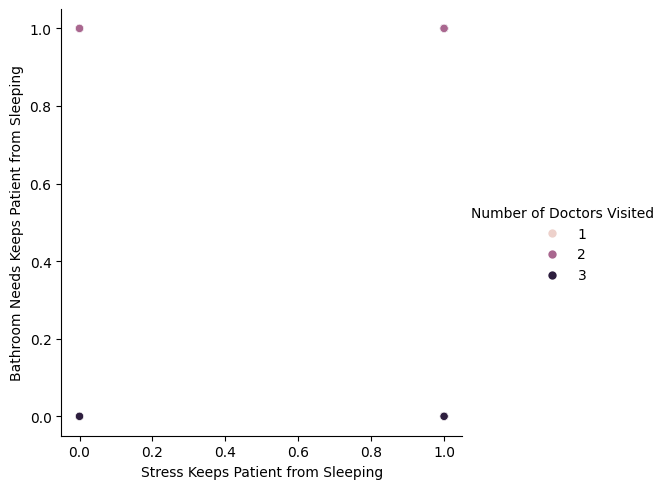

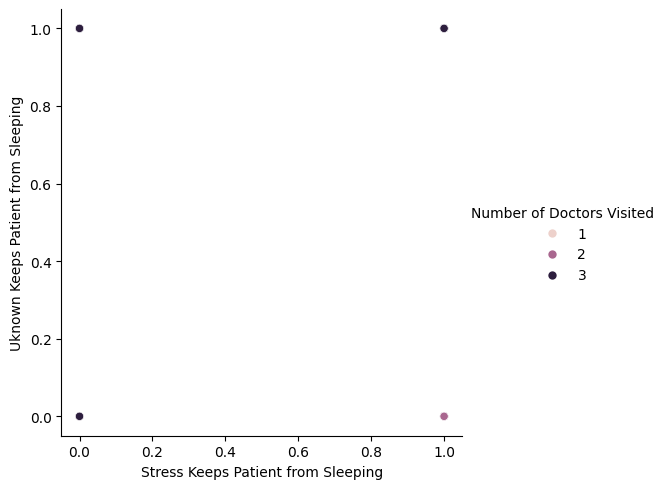

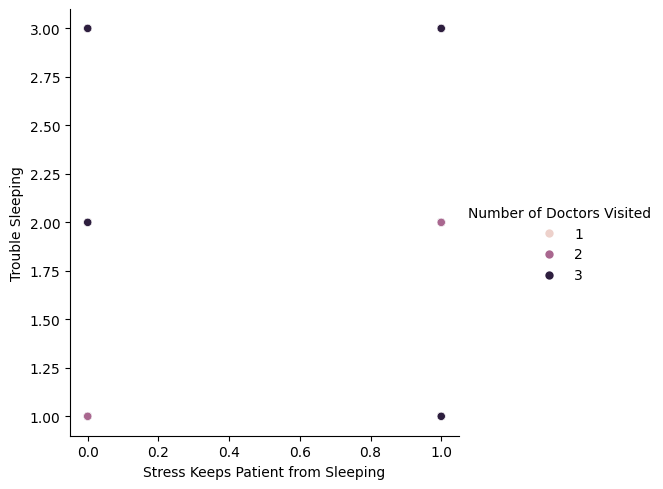

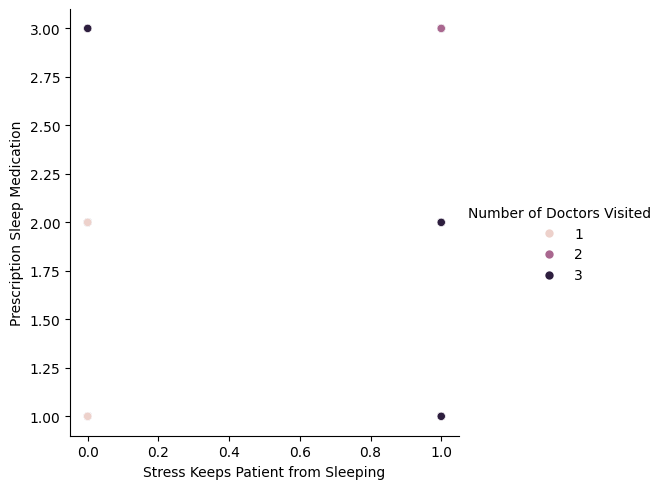

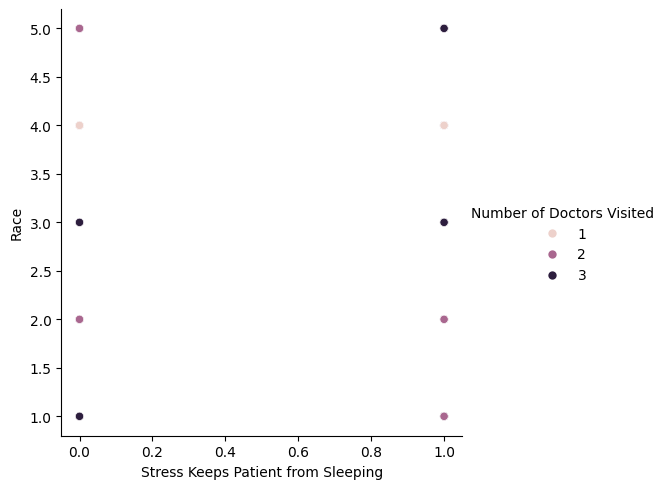

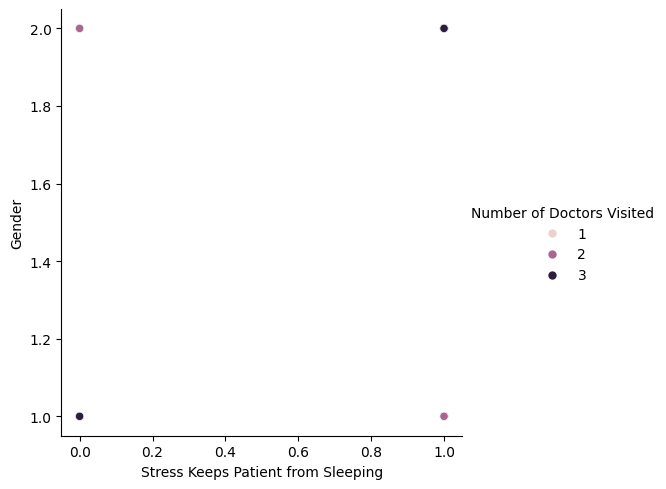

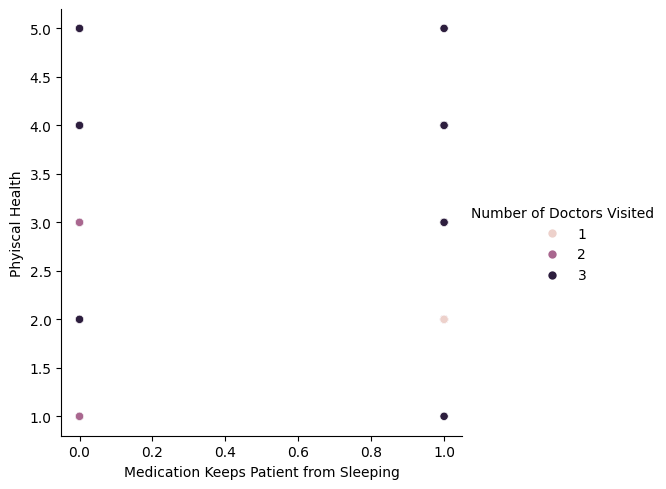

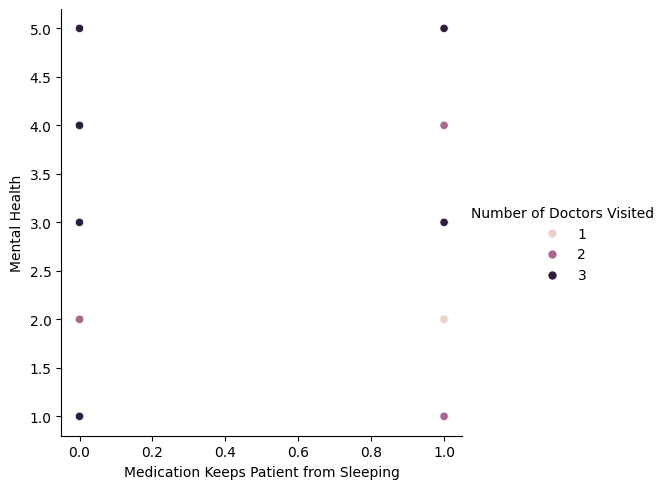

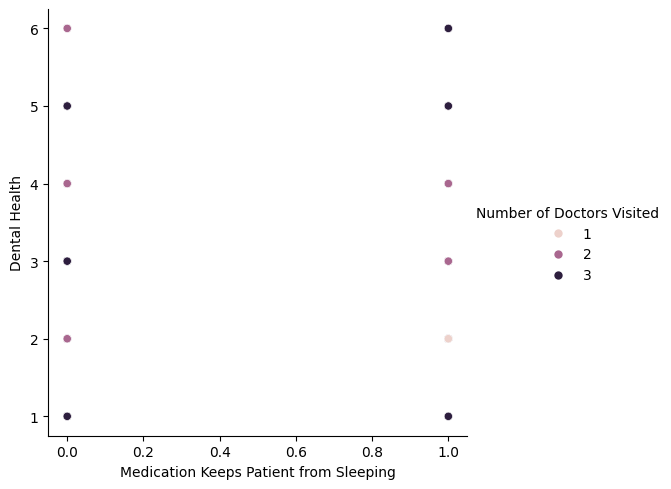

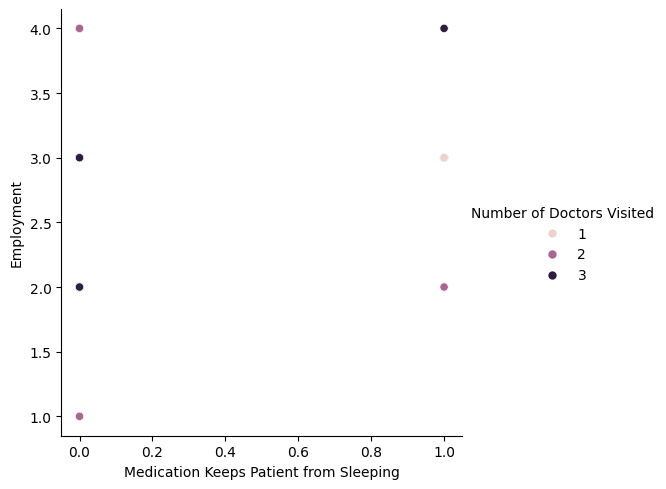

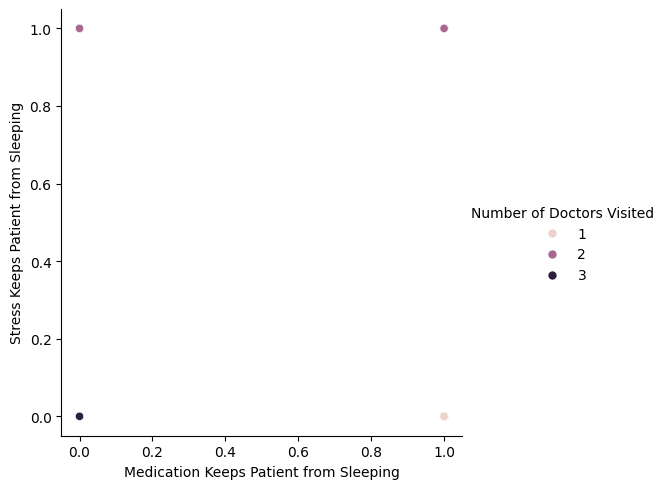

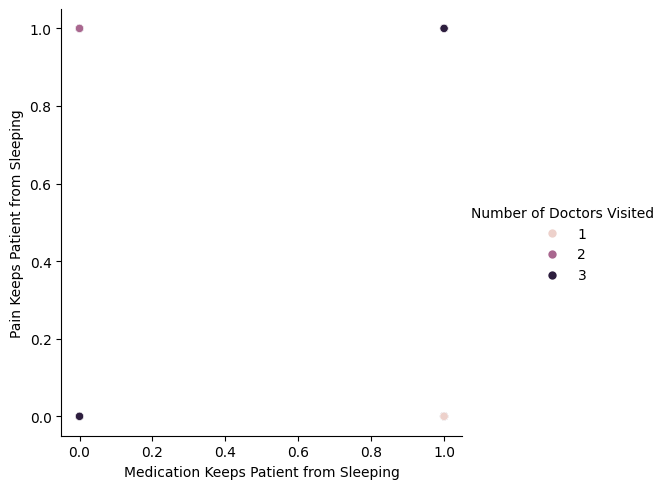

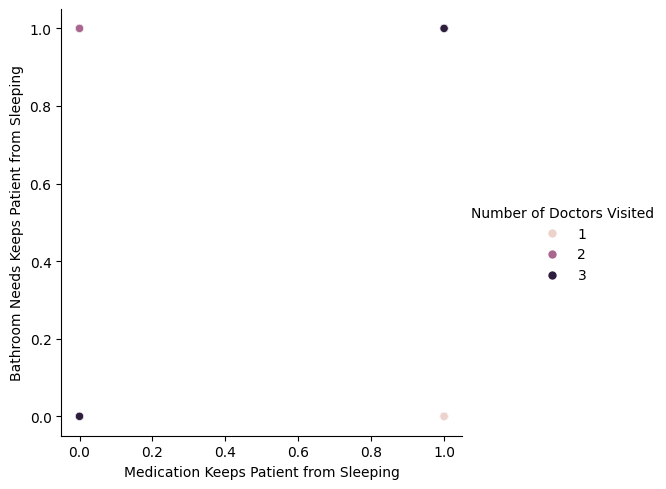

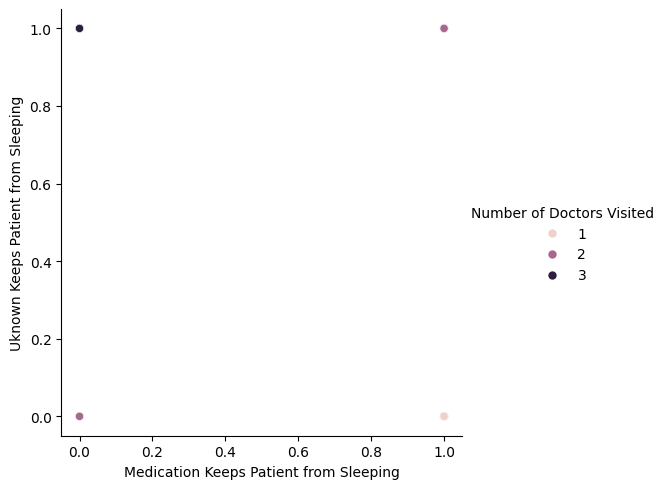

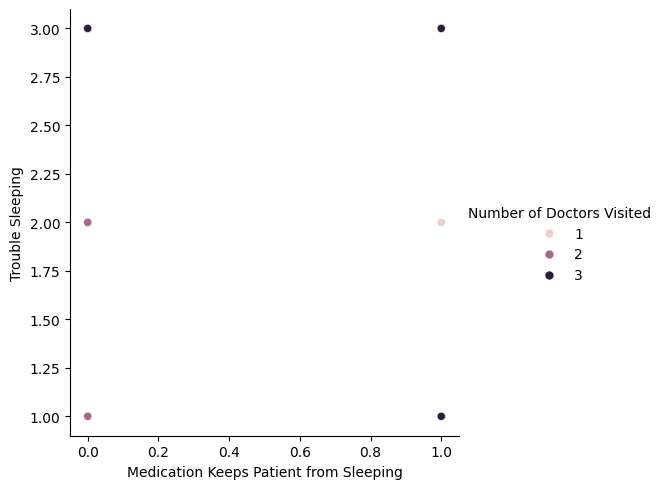

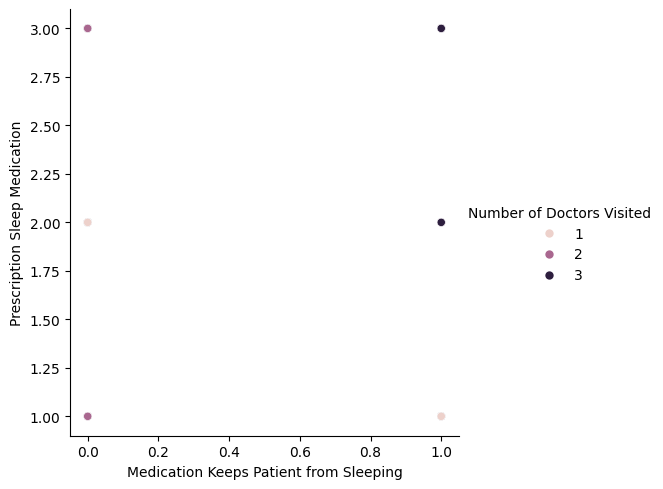

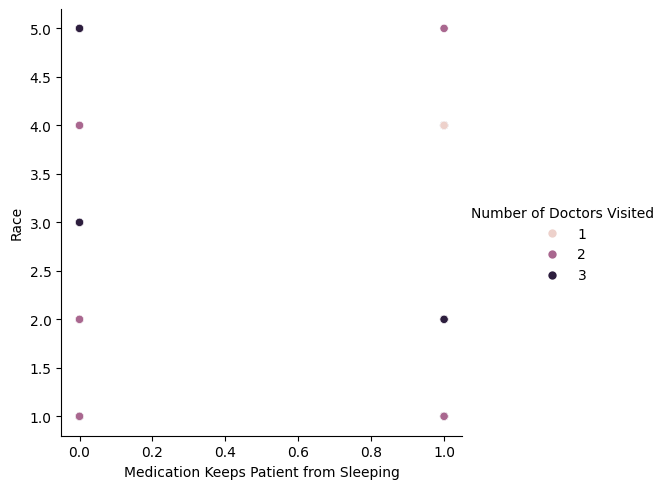

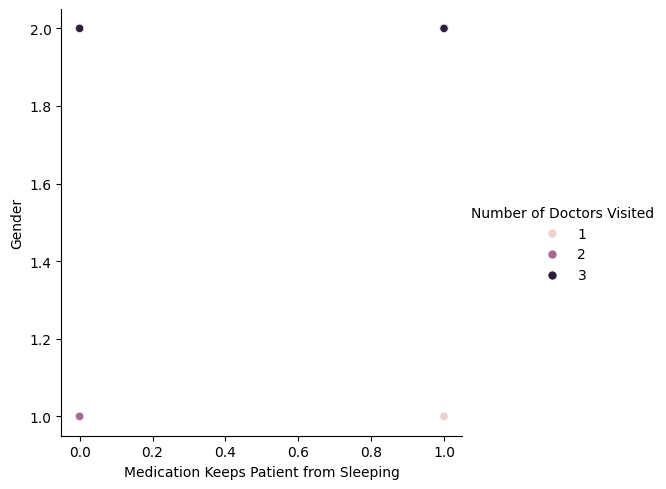

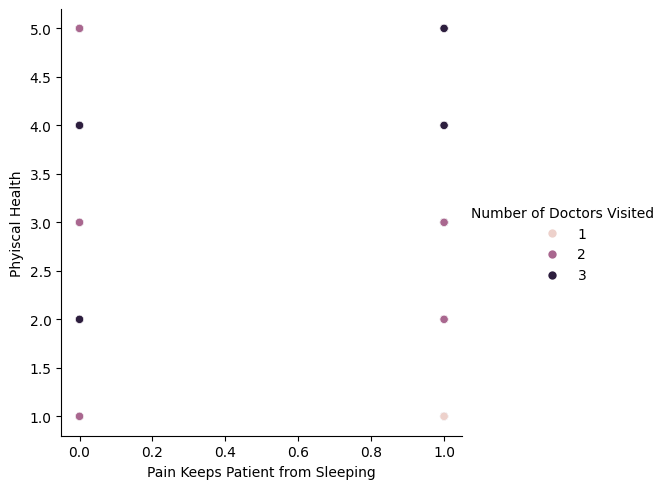

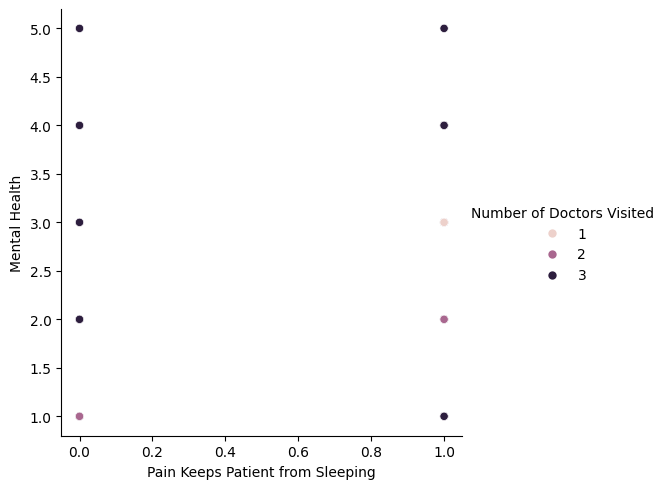

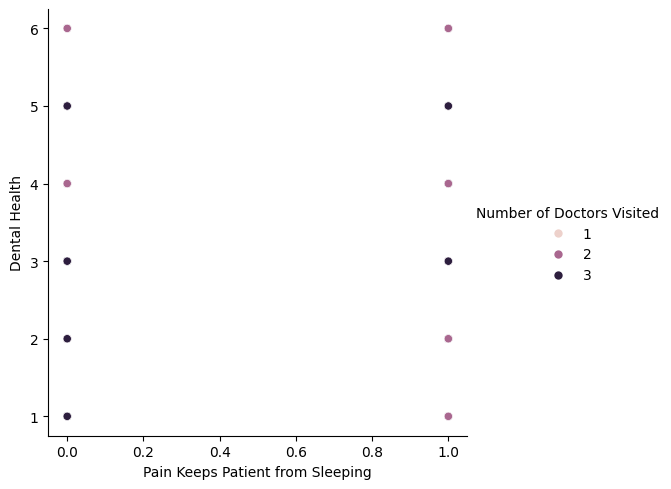

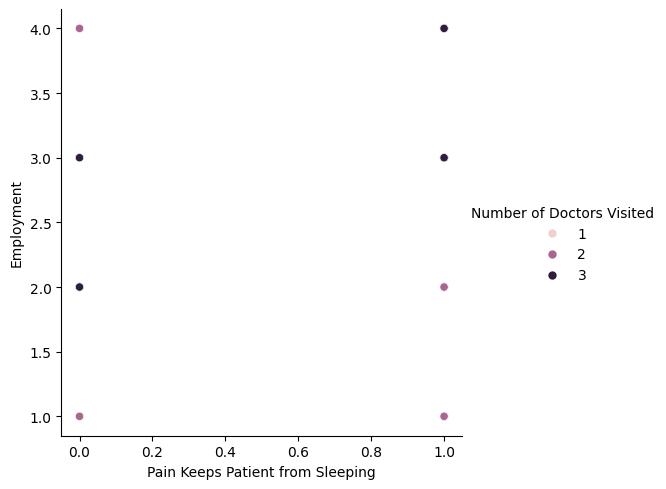

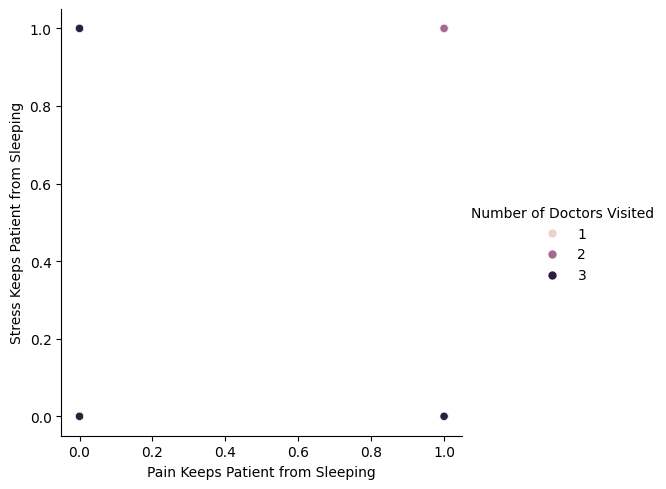

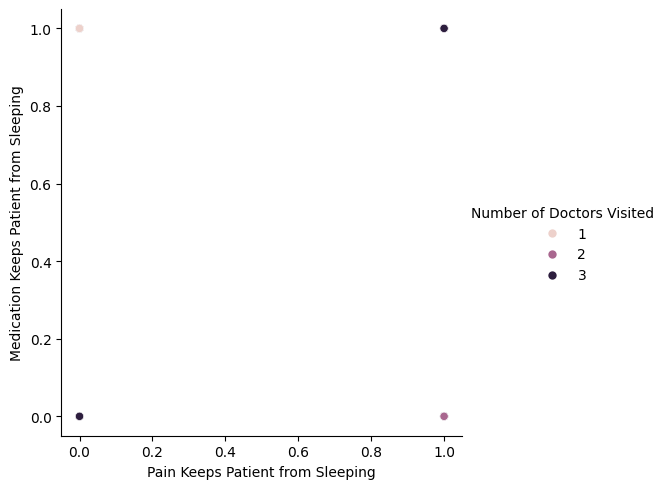

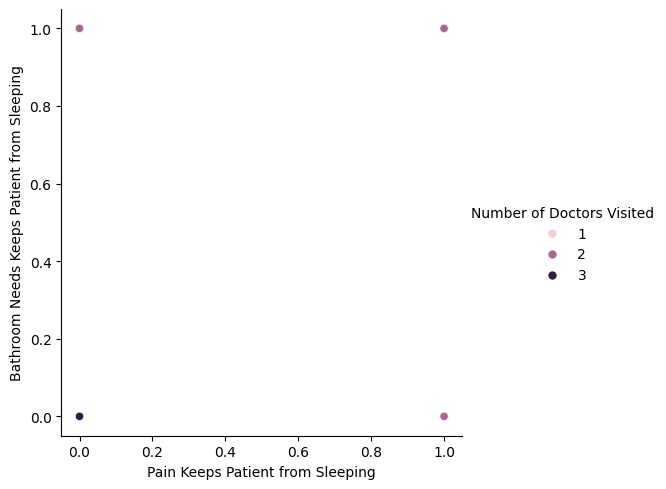

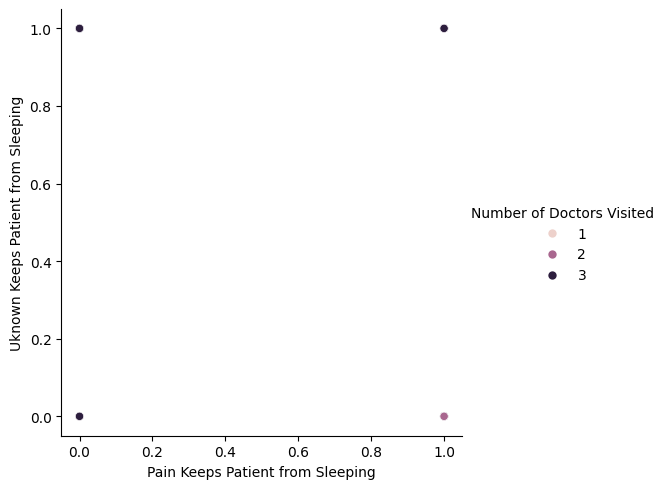

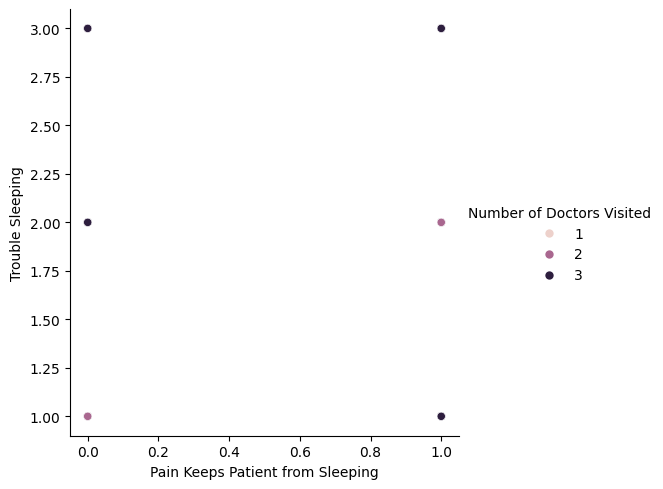

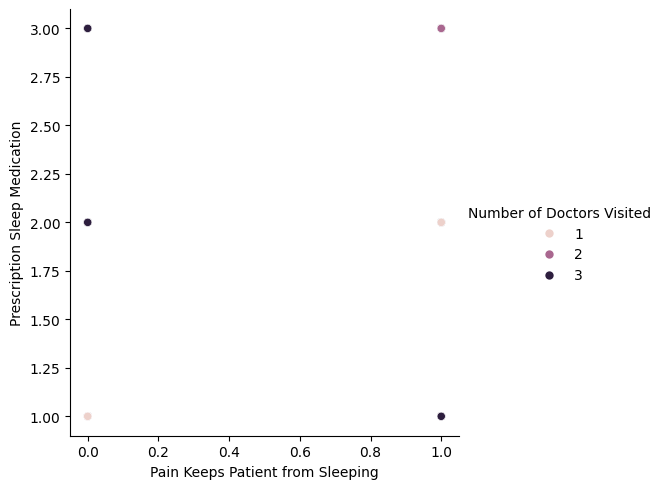

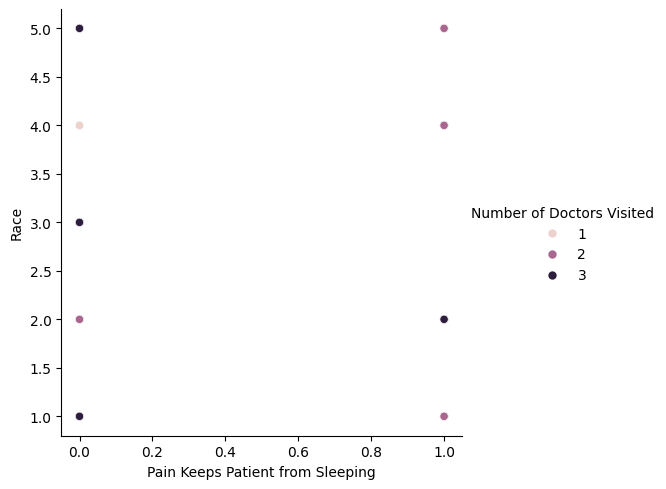

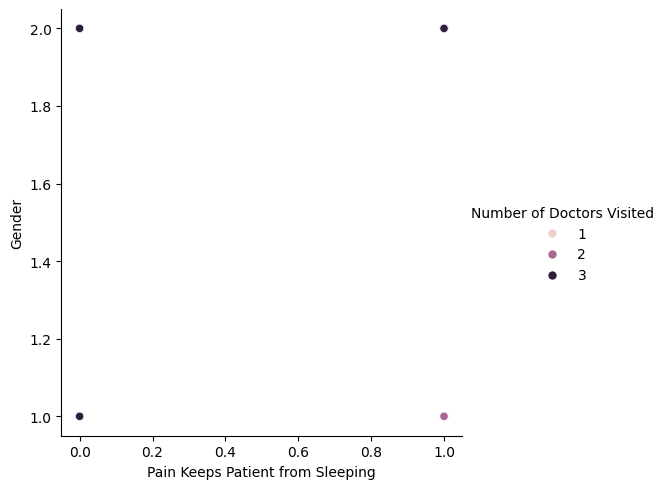

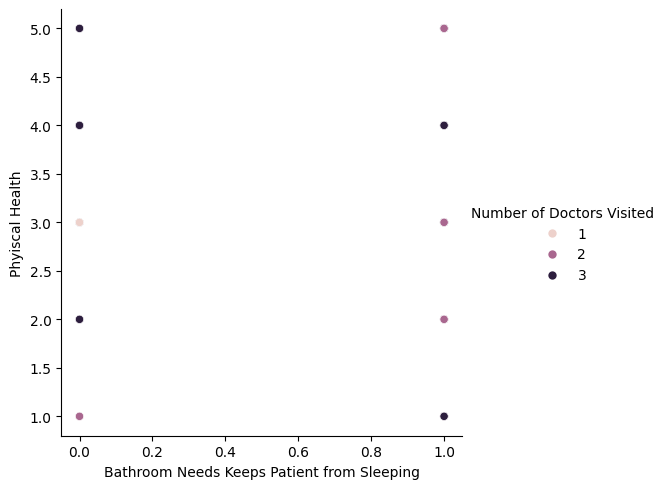

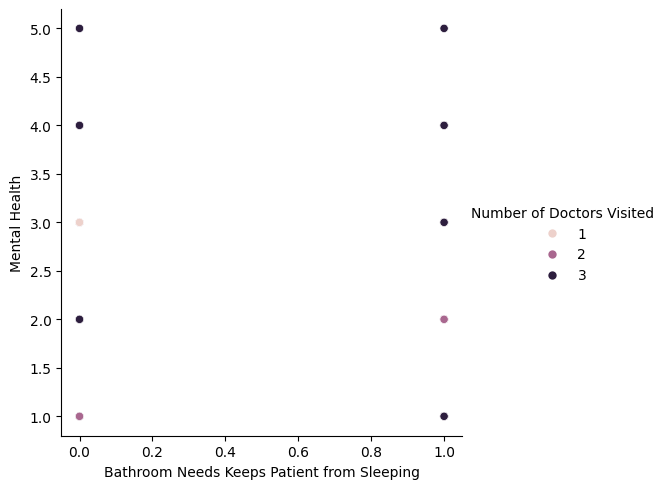

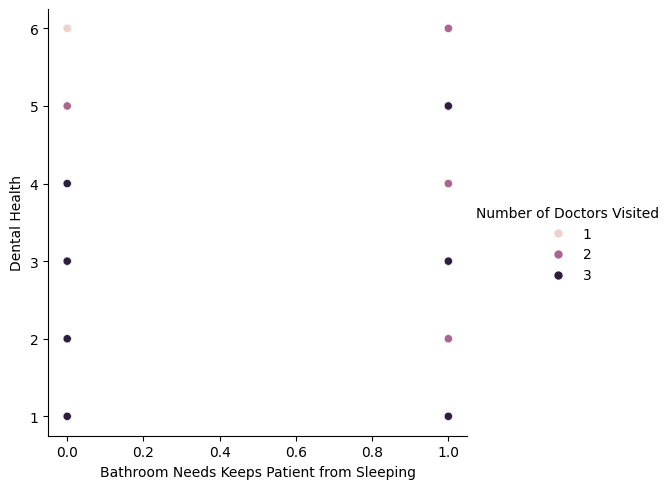

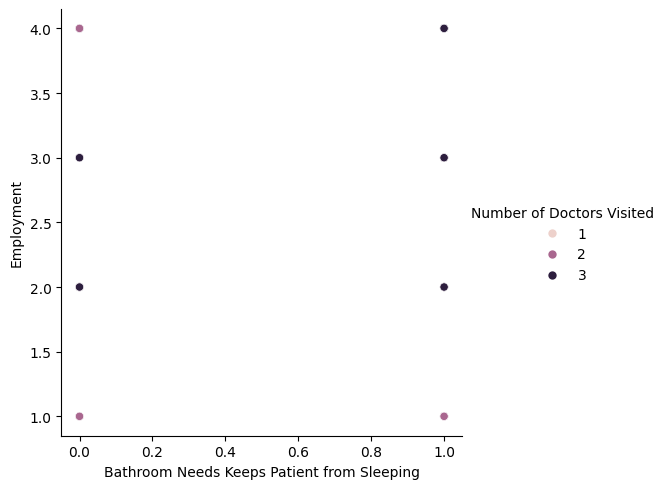

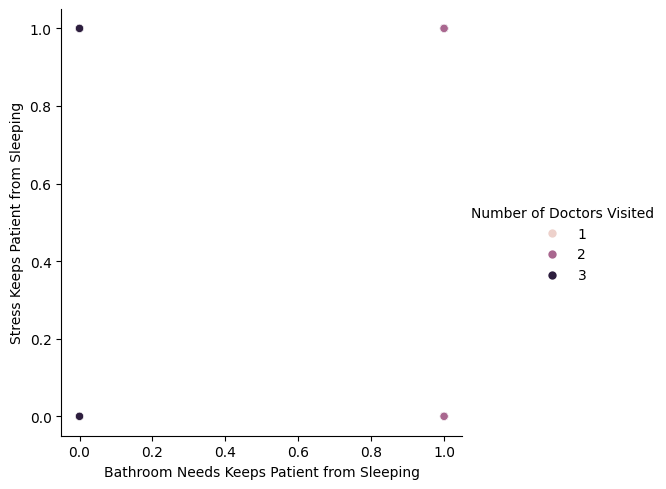

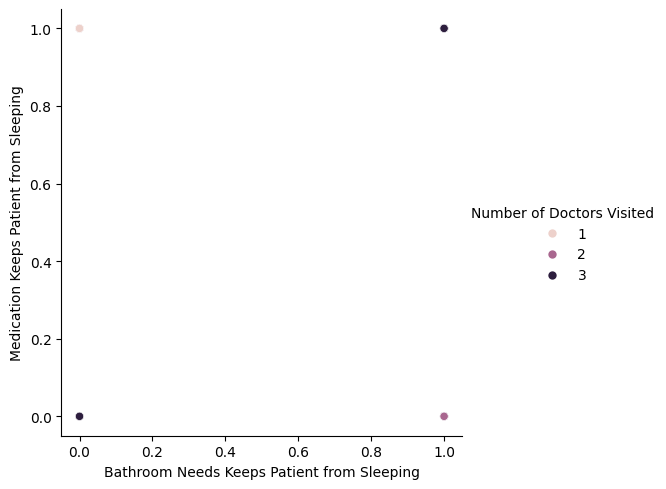

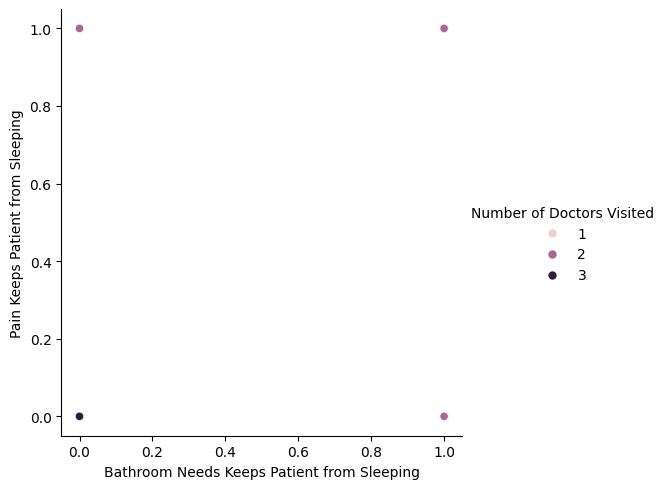

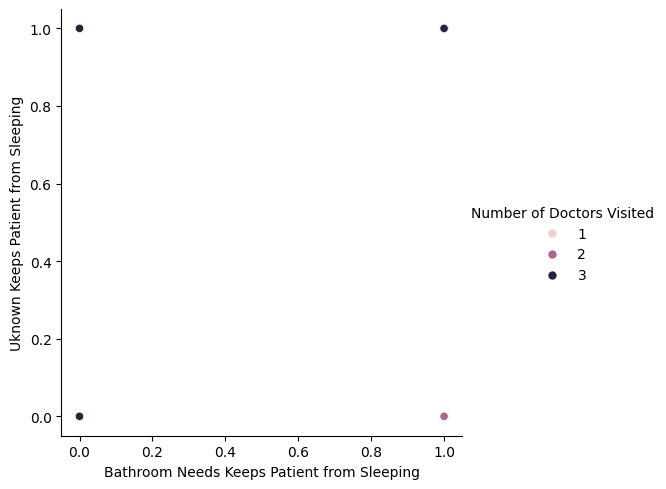

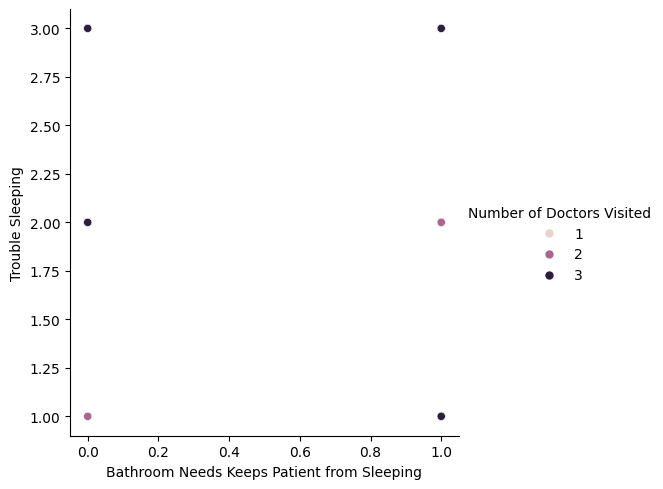

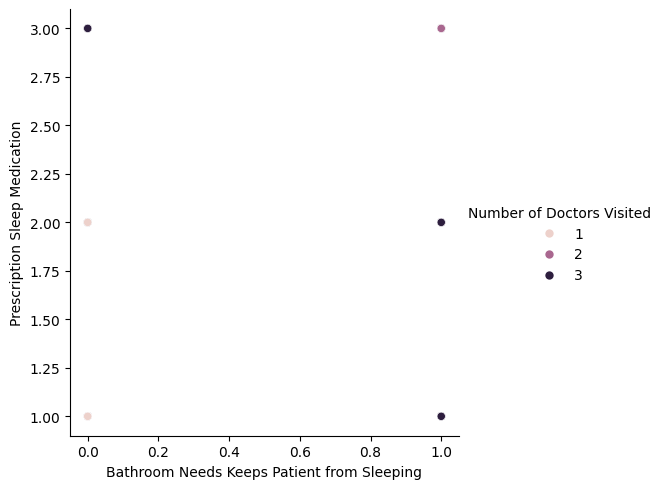

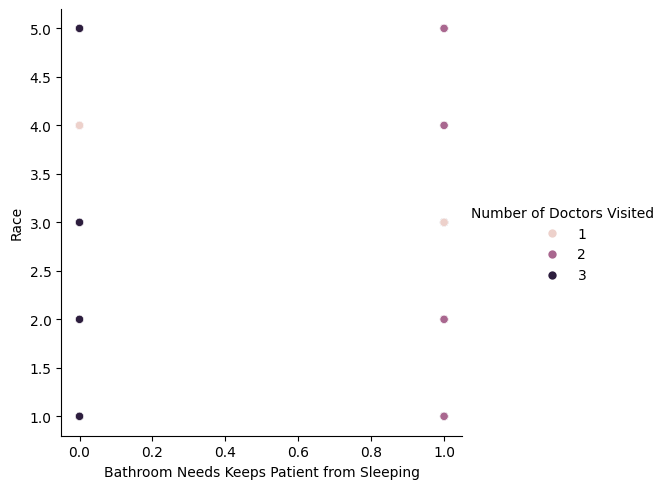

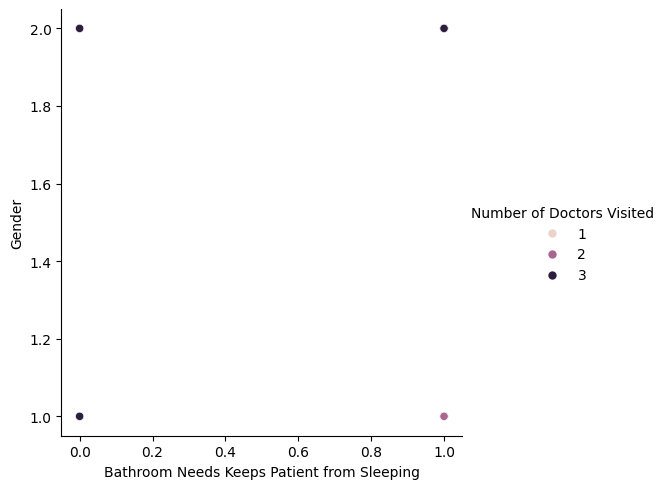

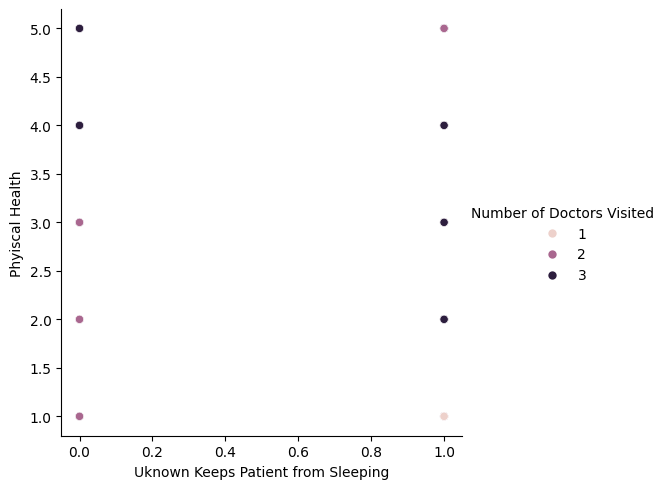

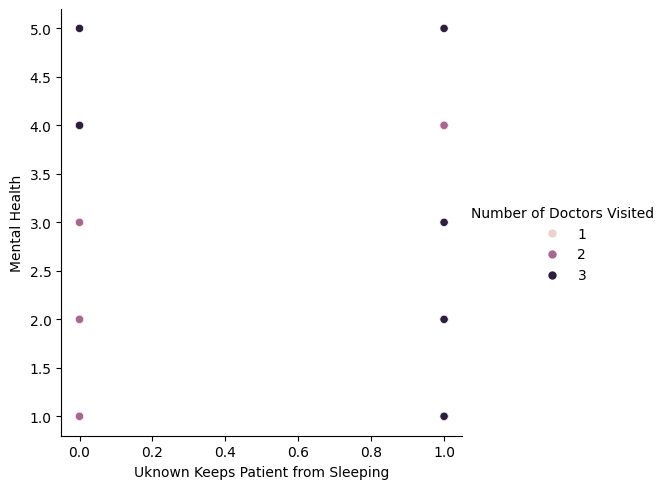

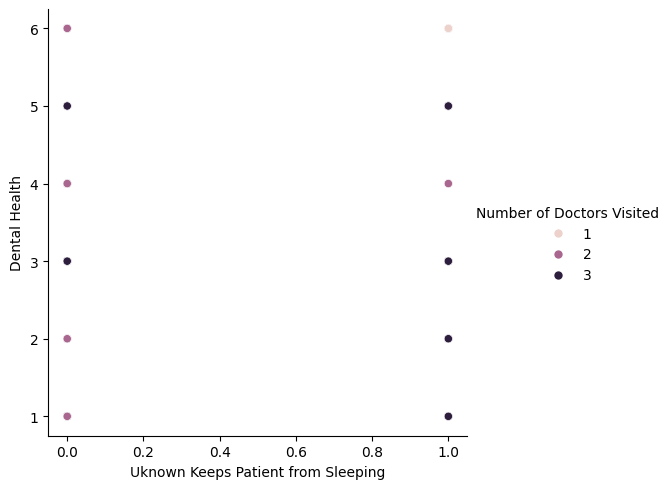

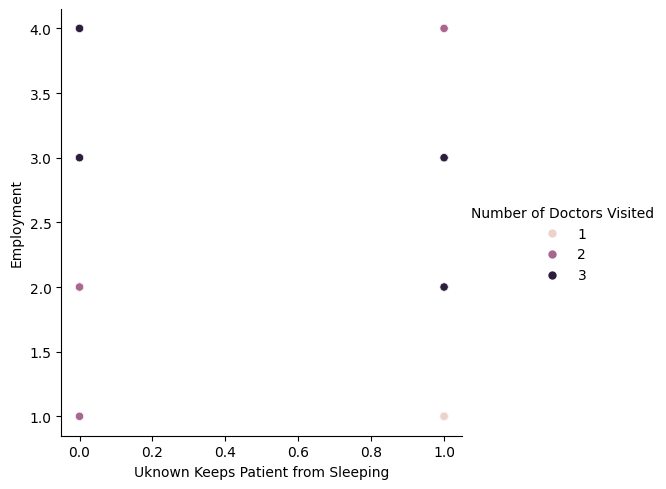

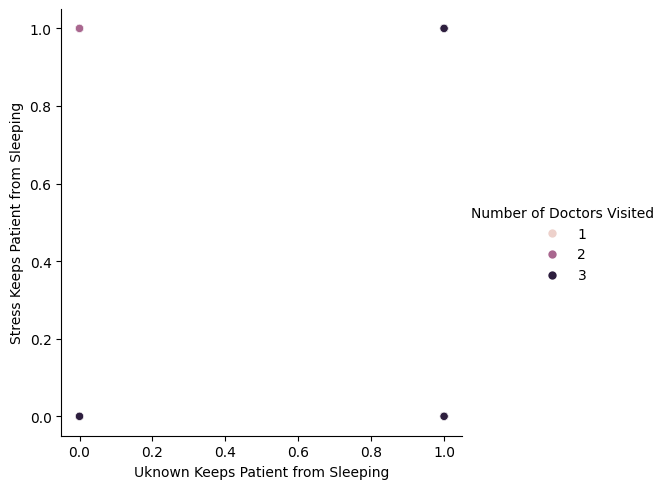

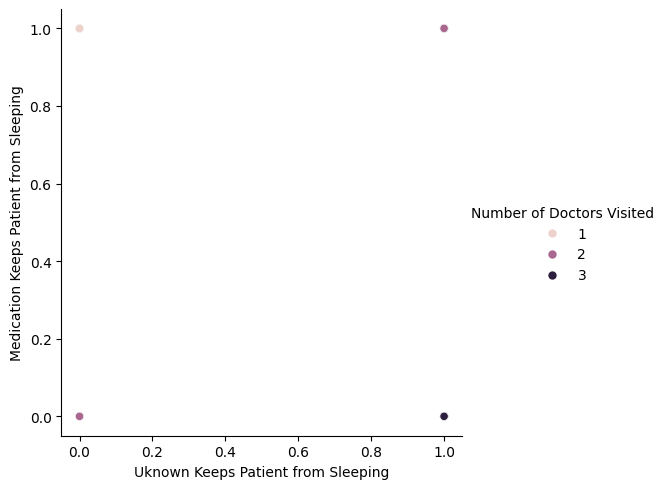

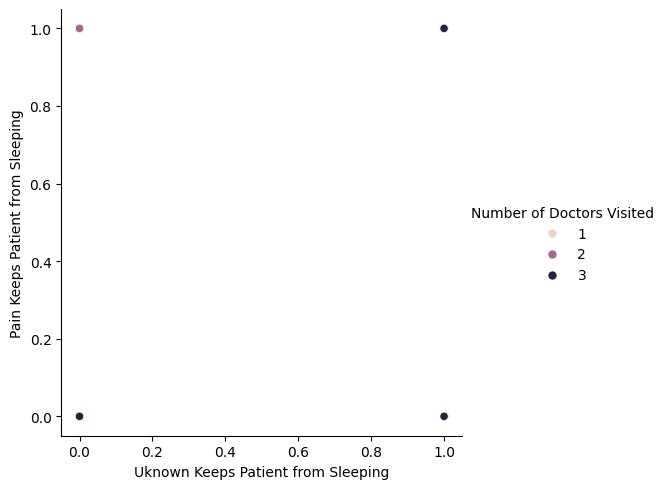

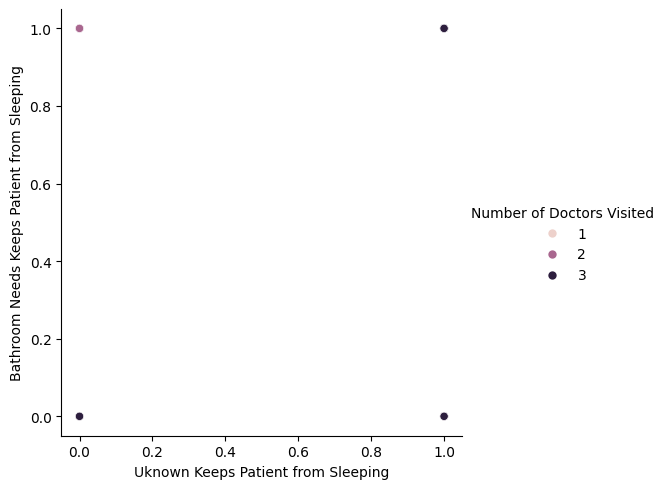

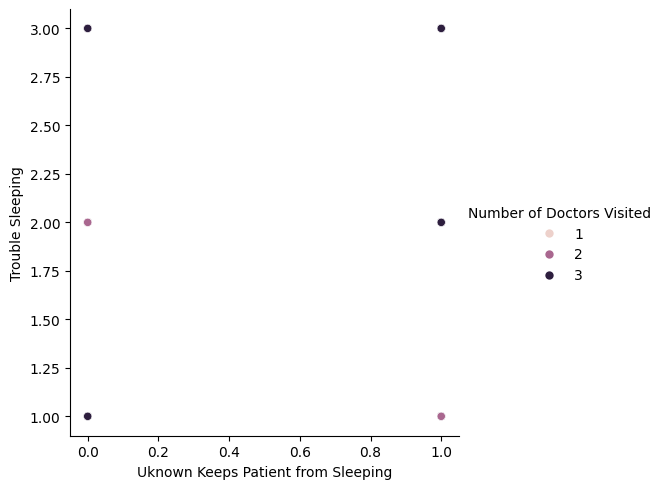

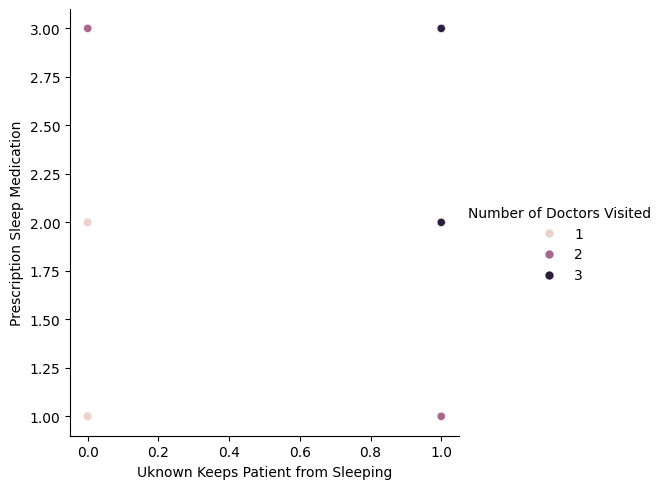

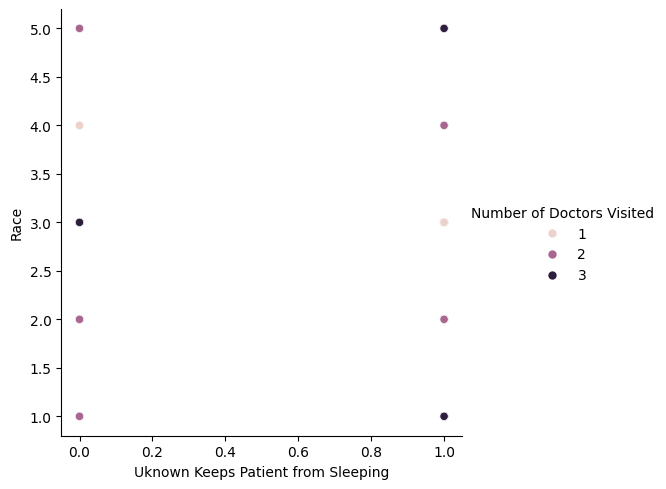

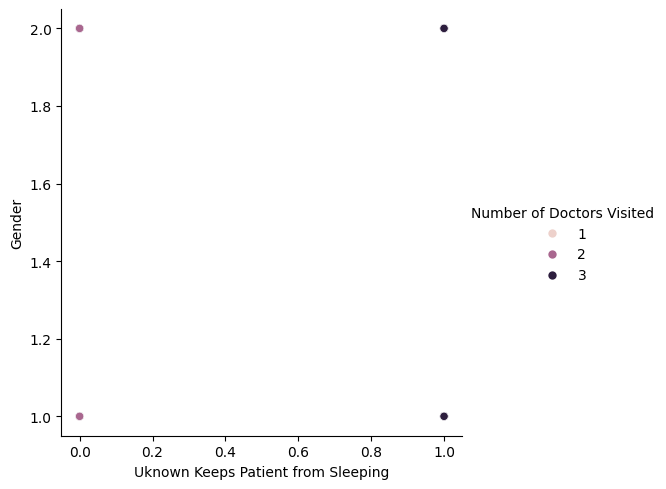

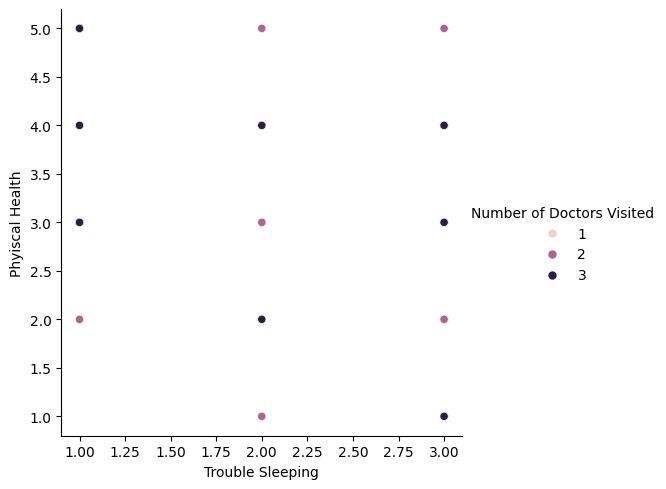

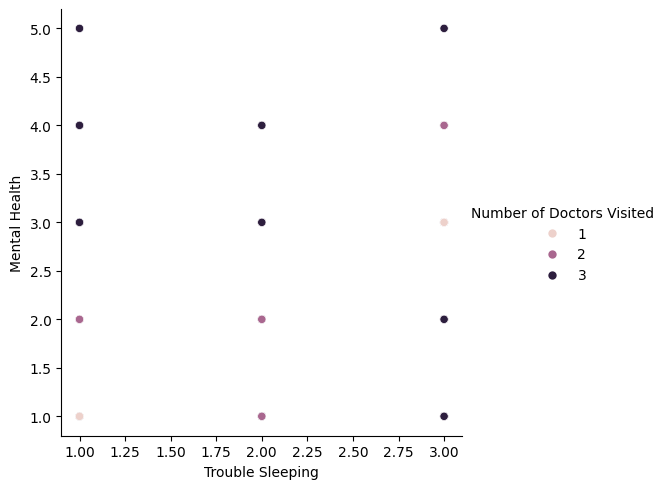

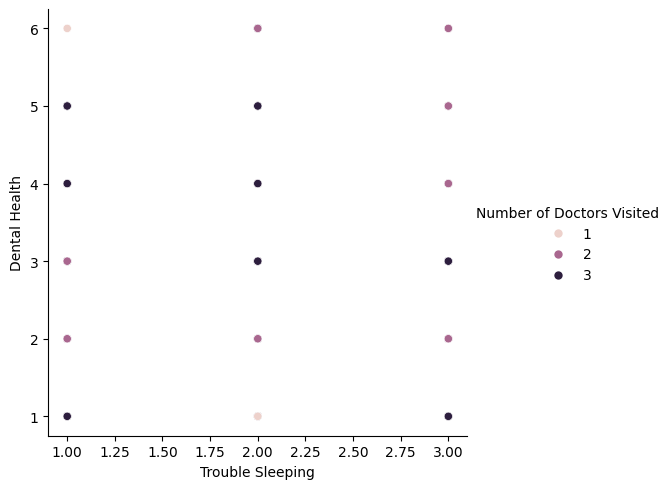

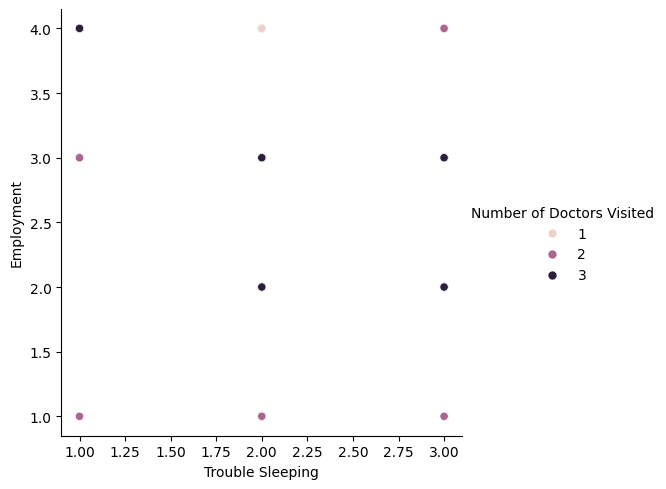

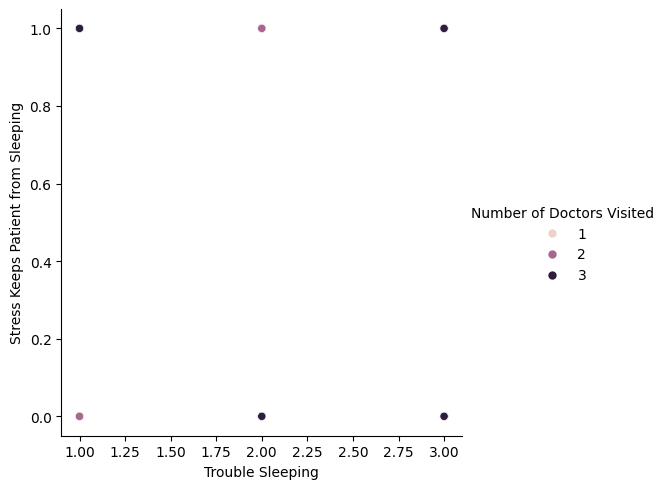

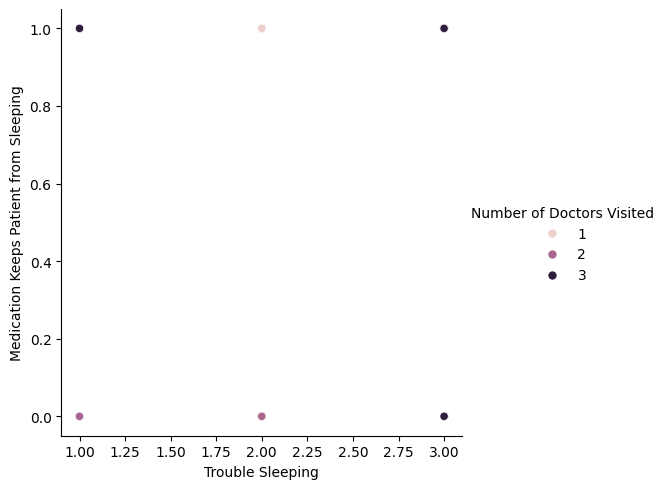

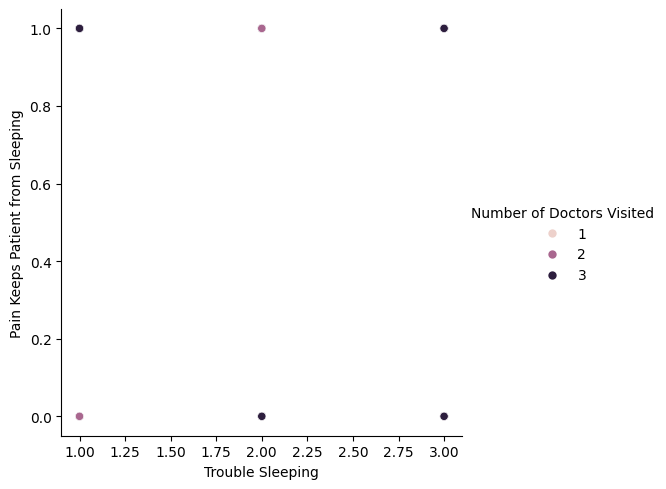

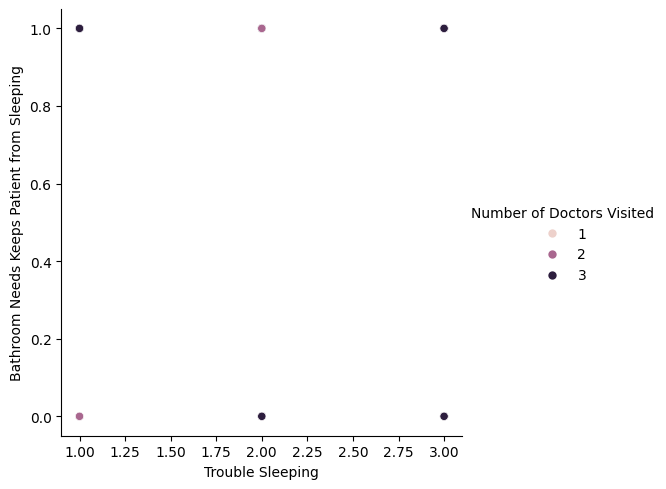

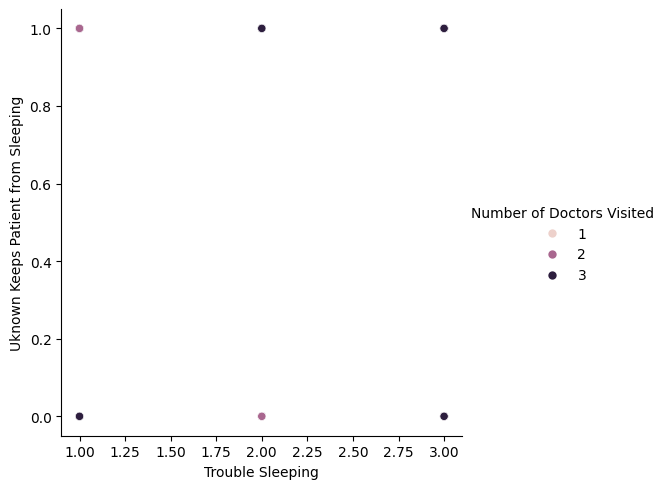

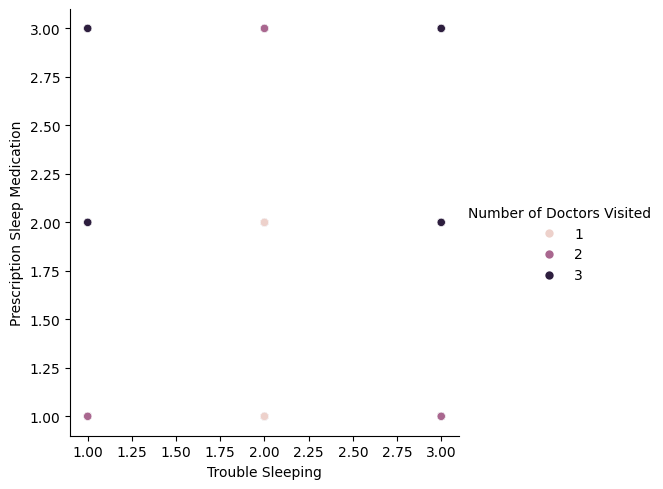

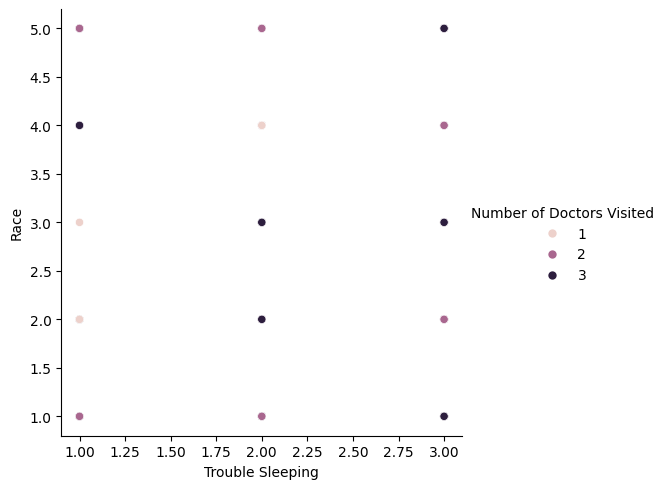

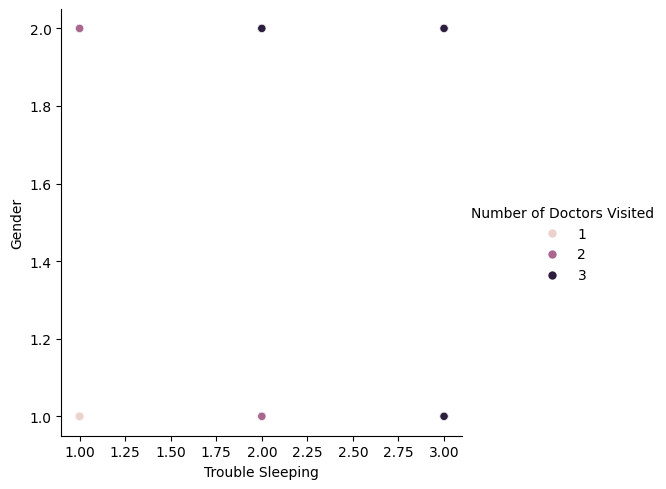

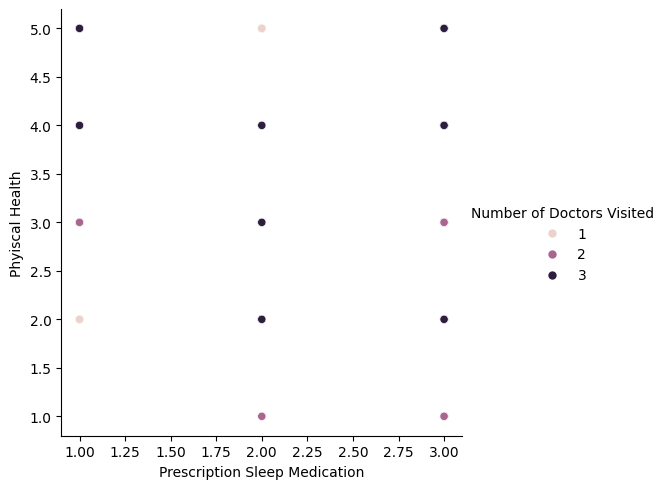

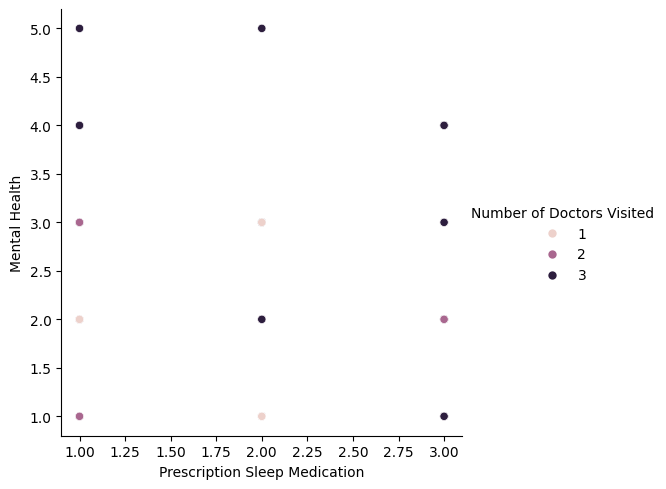

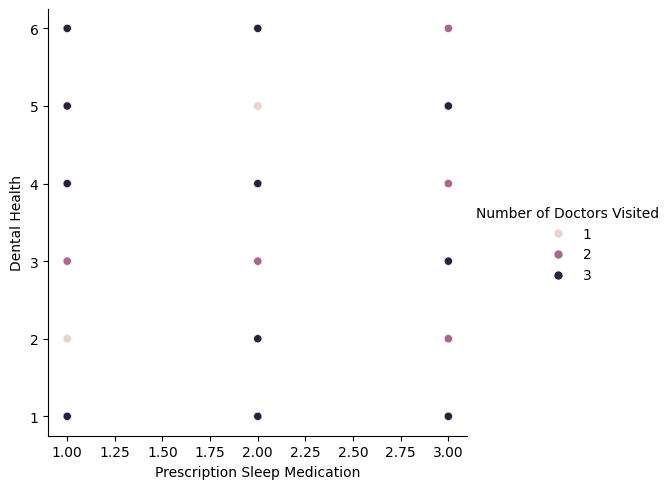

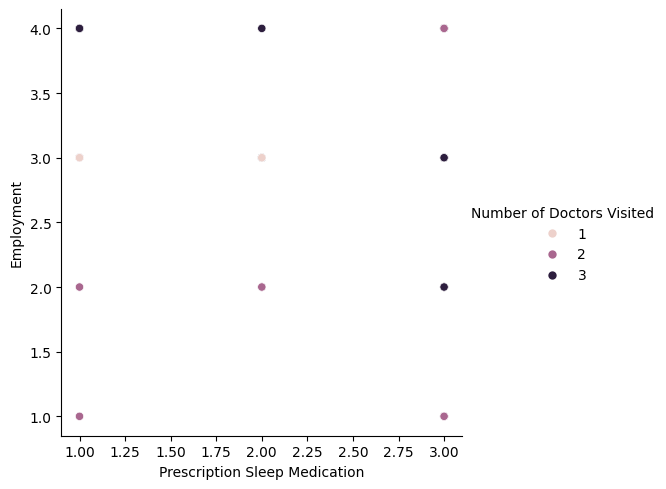

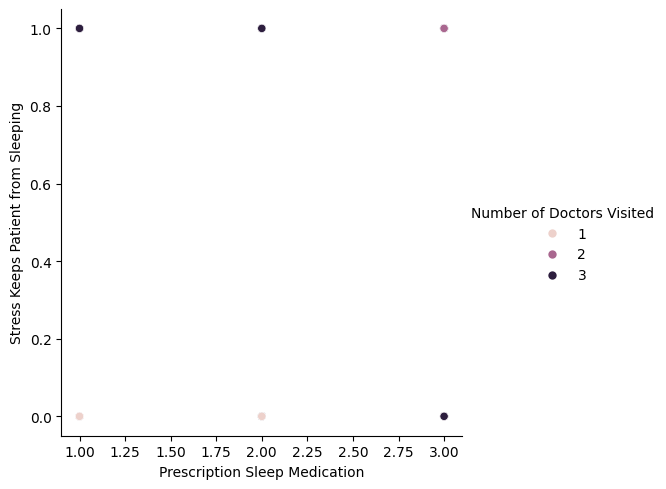

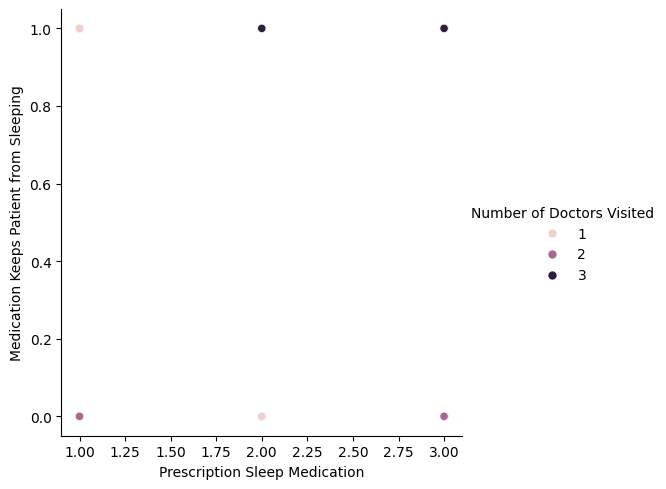

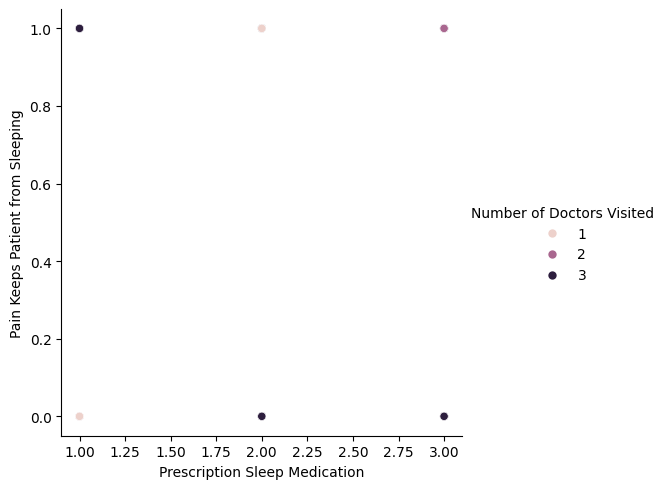

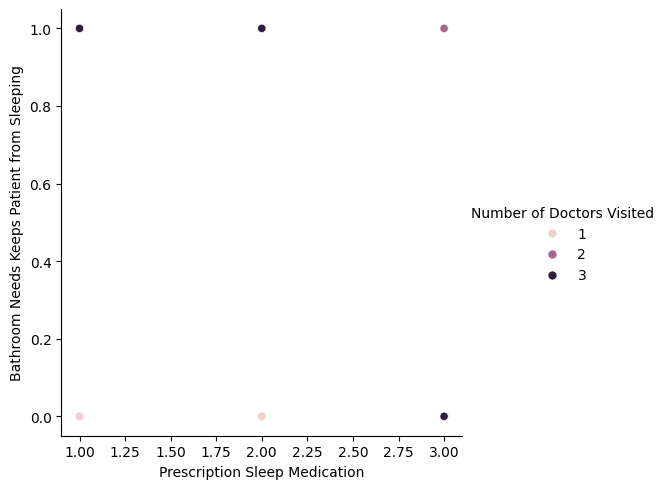

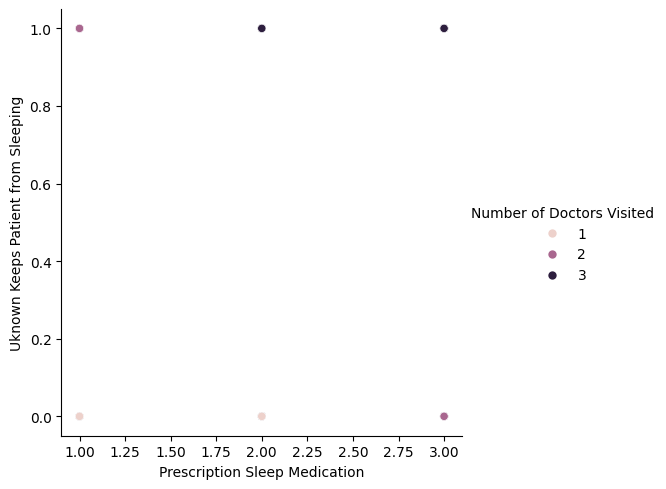

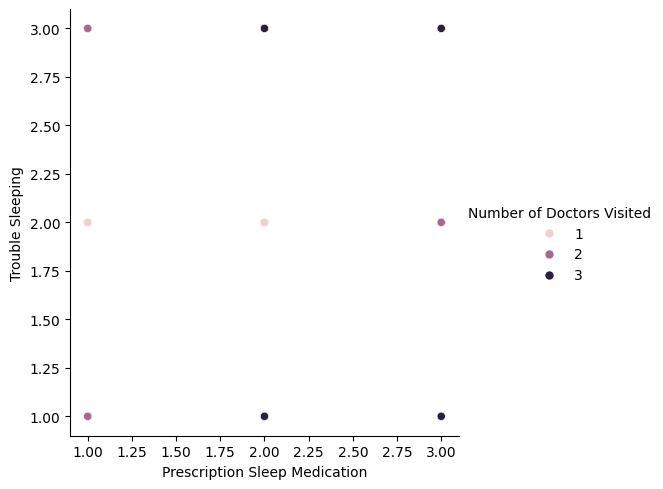

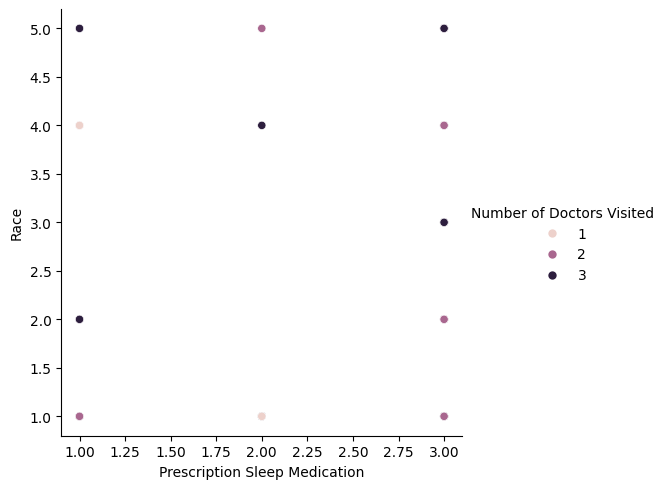

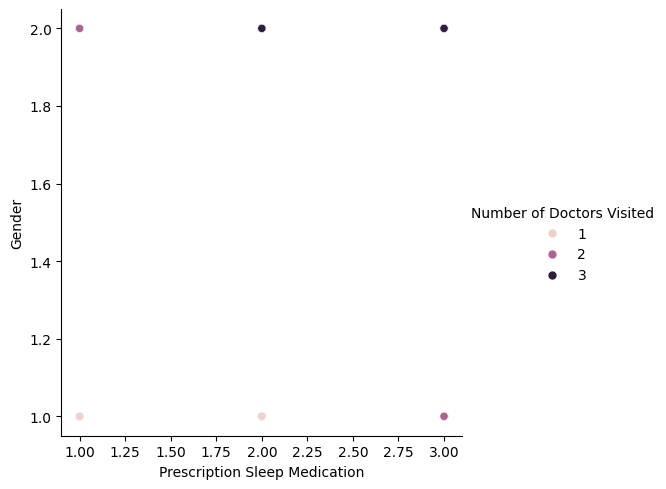

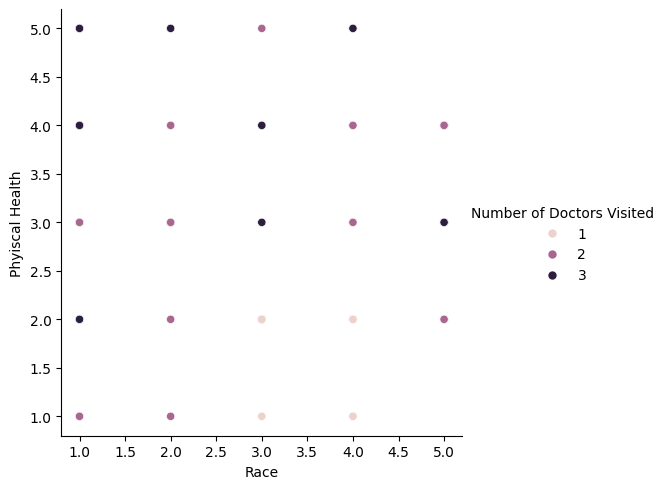

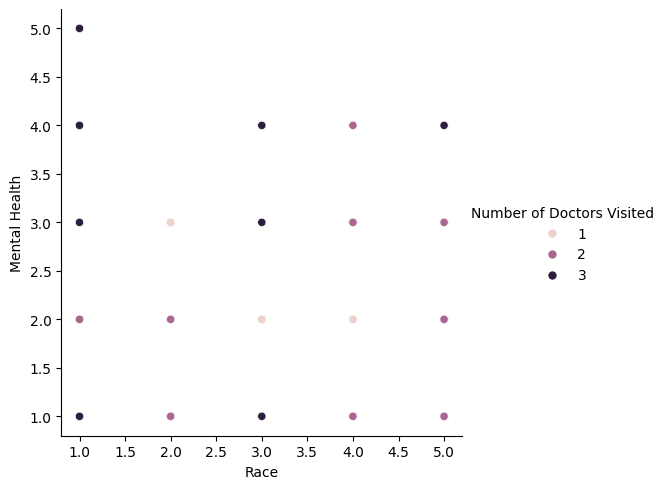

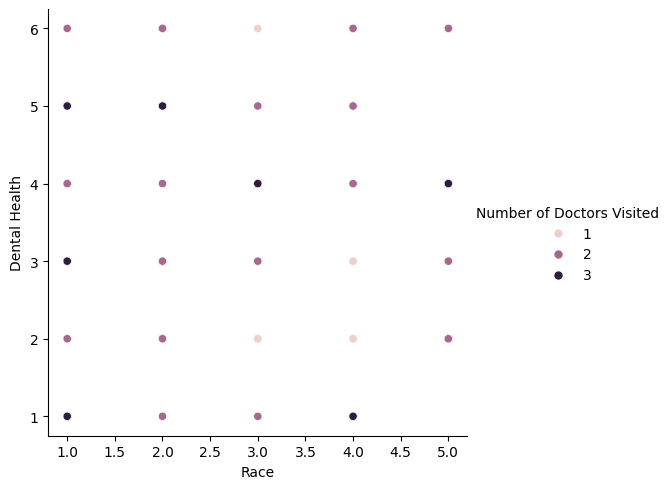

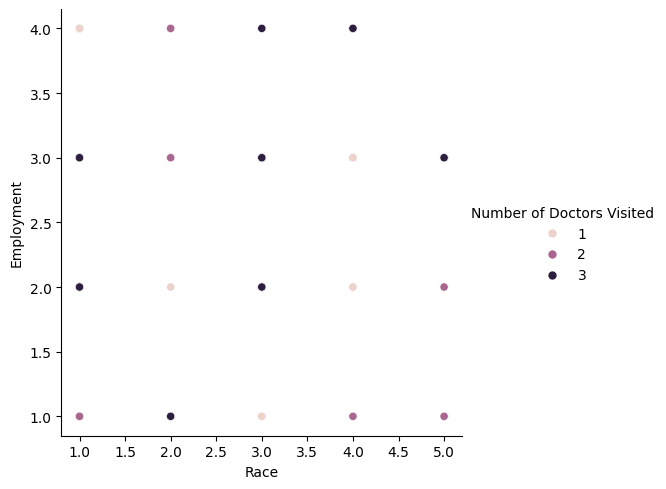

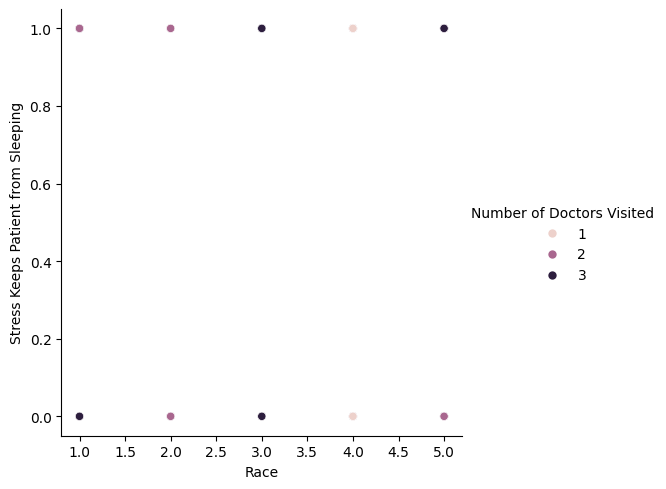

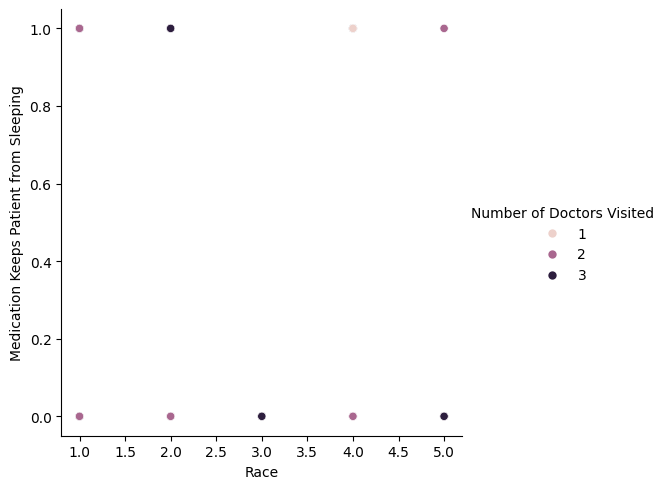

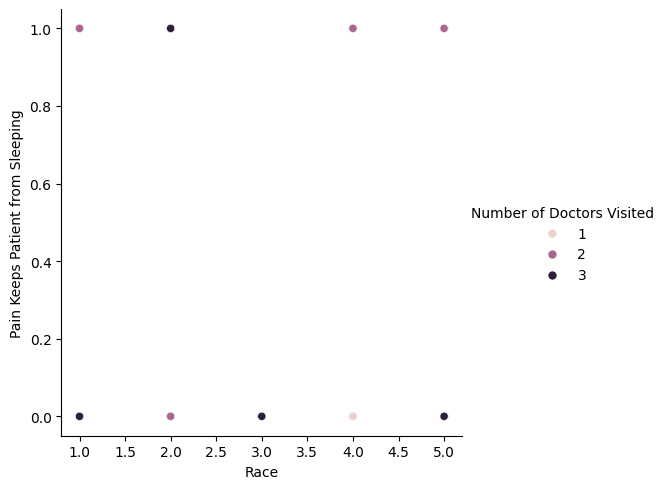

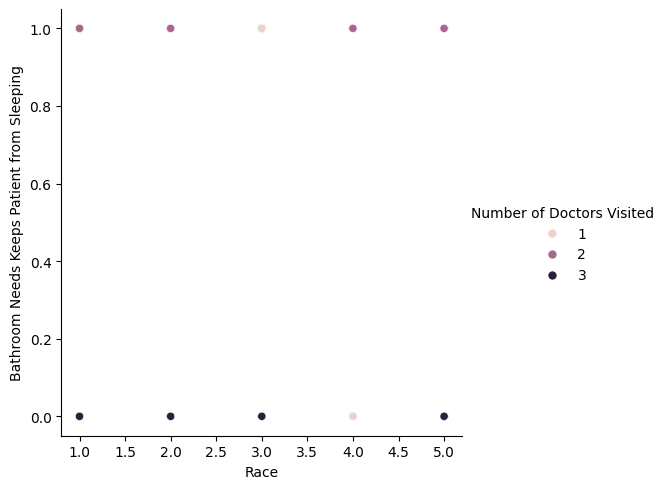

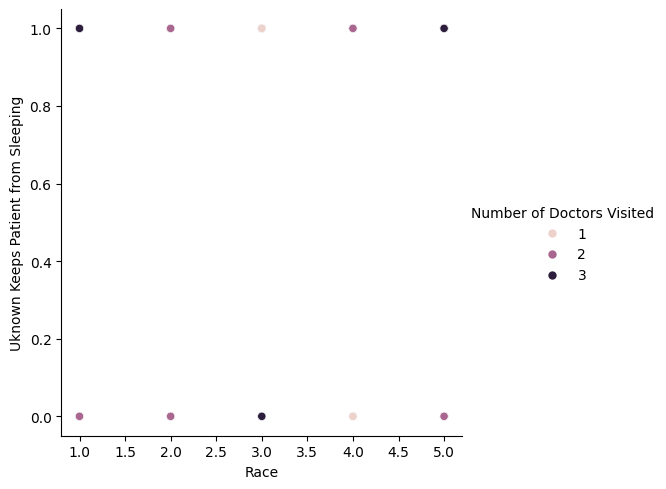

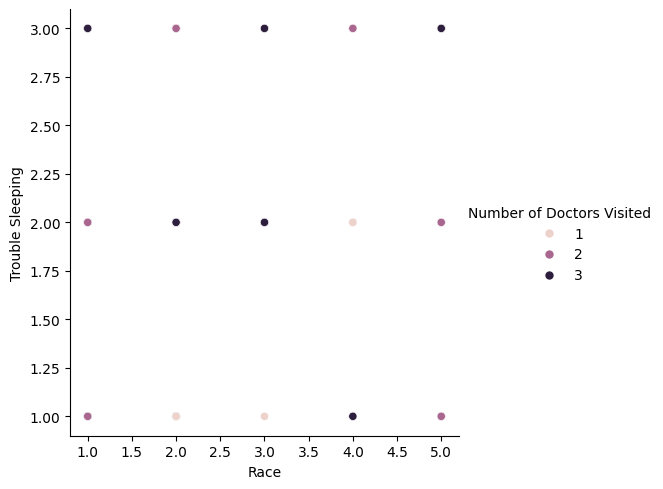

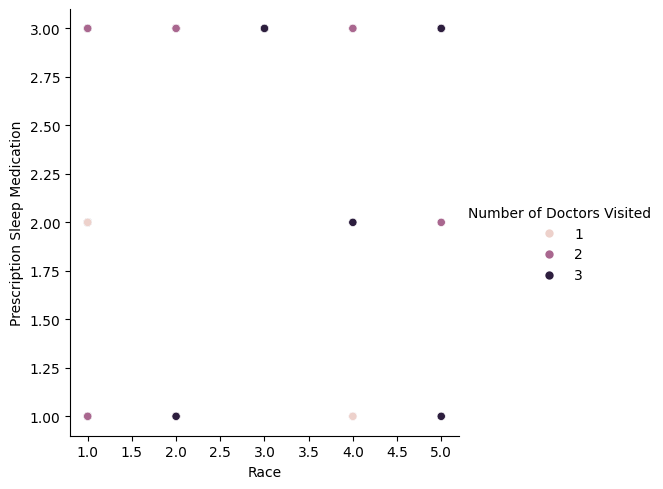

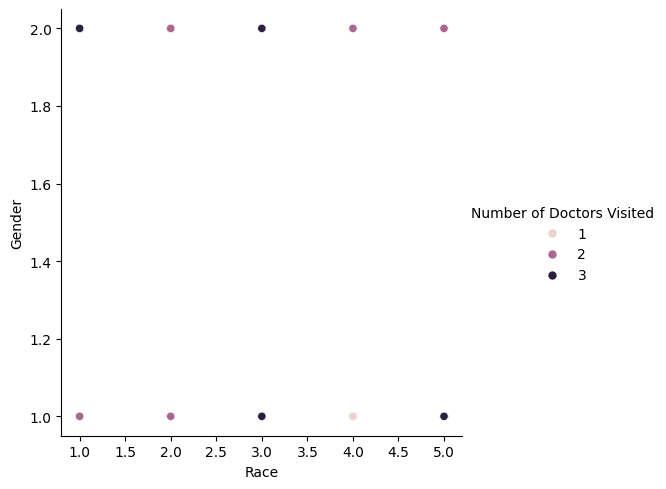

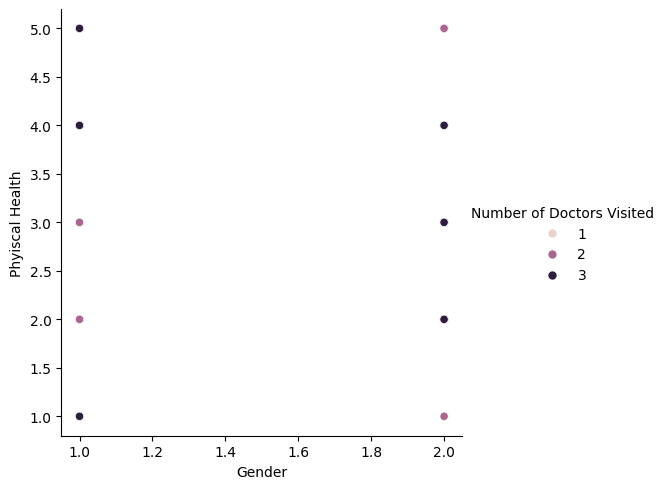

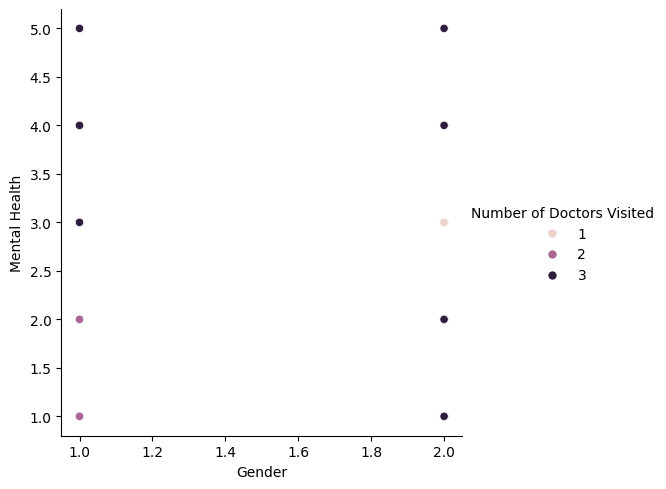

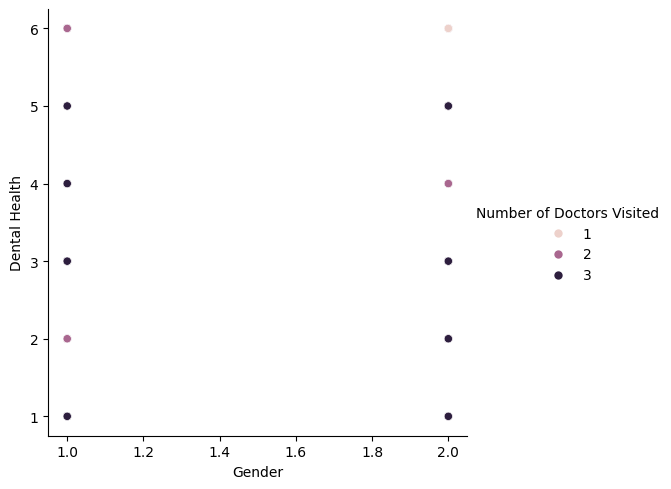

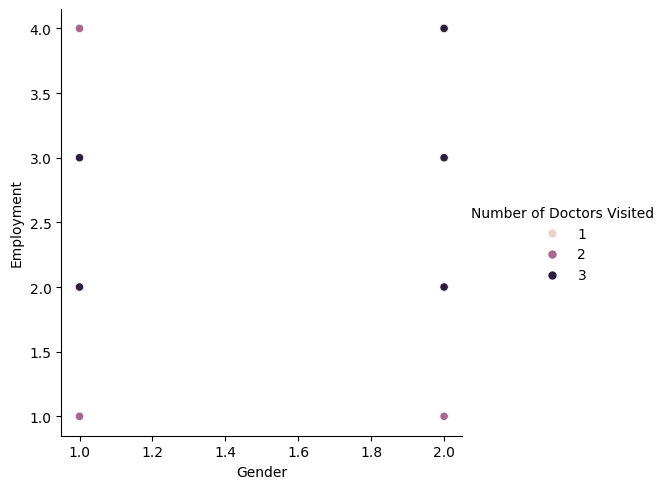

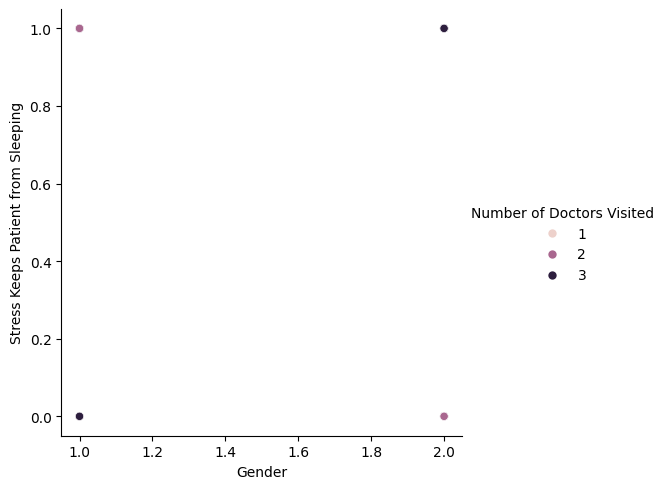

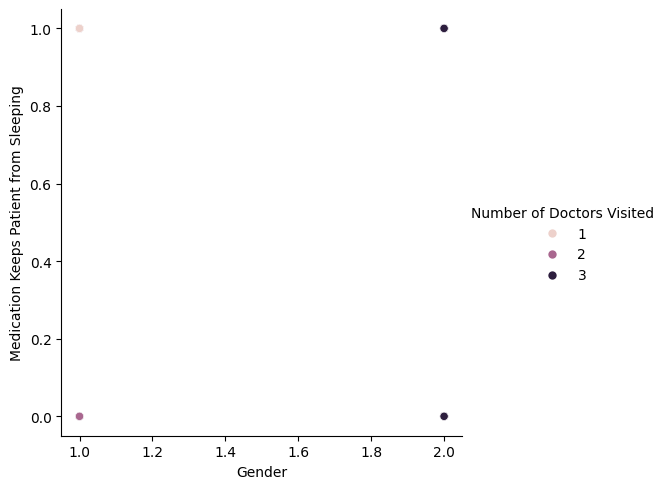

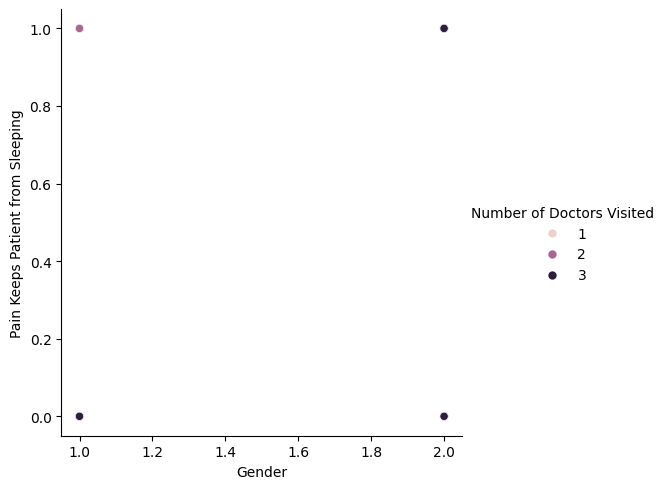

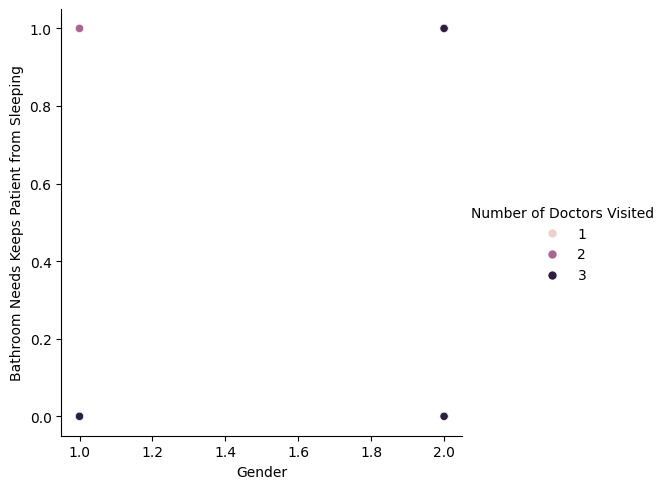

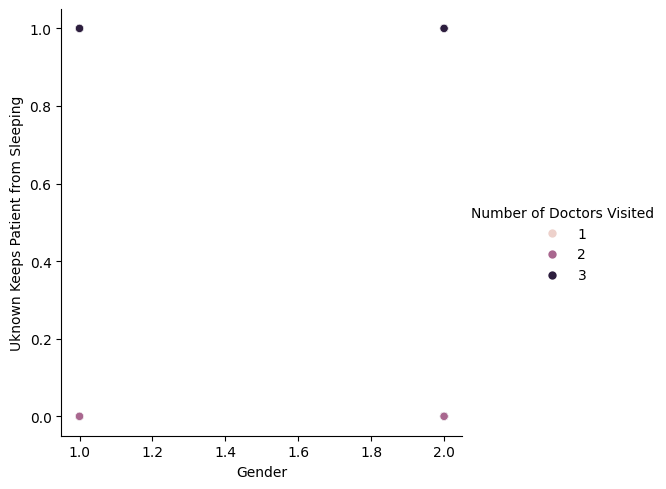

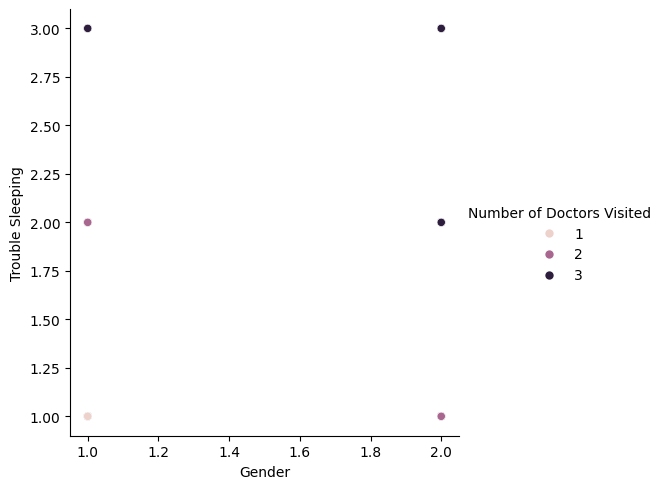

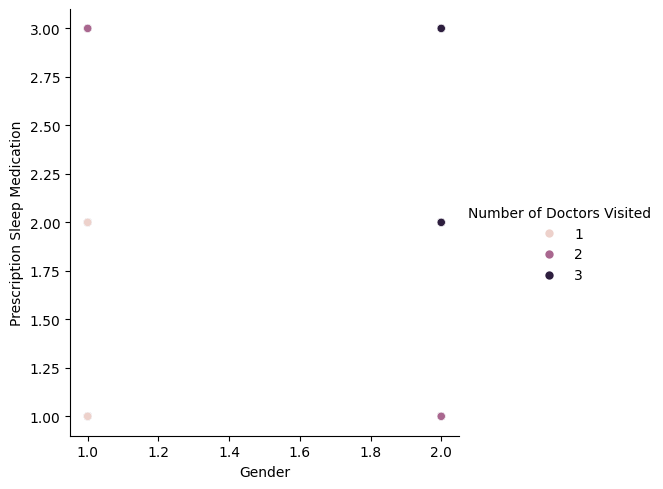

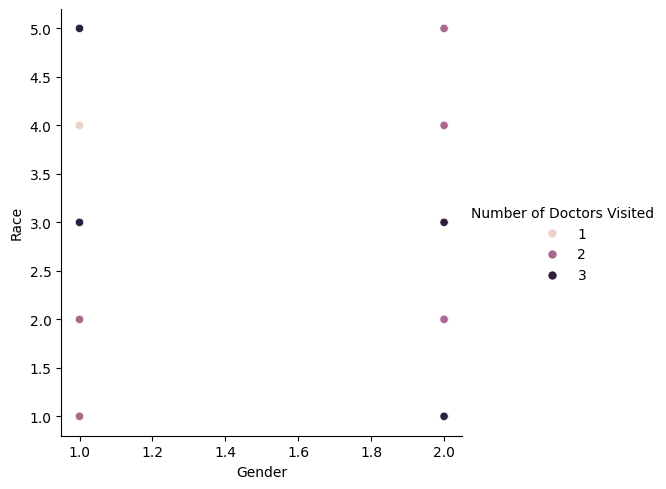

In [22]:
import seaborn as sns
#用散佈圖方式顯示資料
column_names = data.columns.tolist()
column_names.remove('Number of Doctors Visited')
column_names.remove('group')
column_names.remove('group_test_centers')


for i, column_i in enumerate(column_names):
    for j, column_j in enumerate(column_names):
        if column_i==column_j:
            continue;
        # plt.subplot(85,2,i*11+j+1)
        # plt.figure(figsize=(4,2))
        # plt.scatter(x=data[column_i], y=data[column_j],c=data['Number of Doctors Visited'])
        # plt.xlabel(column_i)
        # plt.ylabel(column_j)
        # plt.show()
        sns.relplot(x=data[column_i], y=data[column_j],data=data,hue="Number of Doctors Visited")

## k = 4

In [20]:
import seaborn as sns
#用散佈圖方式顯示資料
# for index, column in enumerate(numeric):
for index, column in enumerate(numeric):
    for i in range(index+1,len(numeric)):
        sns.relplot(x=data[column], y=data[numeric[i]],data=data,hue="group")

NameError: name 'numeric' is not defined

In [ ]:
import seaborn as sns
#用散佈圖方式顯示資料
# for index, column in enumerate(numeric):
for index, column in enumerate(numeric):
    for i in range(index+1,len(numeric)):
        sns.relplot(x=data[column], y=data[numeric[i]],data=data,hue="Chronic Kidney Disease: yes")

In [ ]:
len(numeric)

In [ ]:
tmp = data[data['group']==1]
sns.relplot(x=tmp['Blood Glucose Random (mgs/dL)'], y=tmp['Serum Creatinine (mgs/dL)'],data=tmp,hue="group")